In [18]:
rm(list = ls())
gc()

setwd("/mnt/data00/minghui/project_NMF/05_Test_cNMF_Program_0127/")
library(Seurat)
library(dplyr)
library(cowplot)
library(harmony)
library(readr) 
library(tidyr)
library(gplots)
library(reshape2)
library(paletteer)
library(AUCell)
library(pheatmap)
suppressPackageStartupMessages(library(NMF))
suppressMessages(library(ggplot2))
suppressMessages(library(tidyverse))
suppressMessages(library(scibet))
suppressMessages(library(viridis))
suppressMessages(library(ggsci))
 
d_palettes<- palettes_d_names
mycol<-paletteer_d( "ggsci::default_igv",n=51)

source('/mnt/data00/minghui/Fuctions/Markers_kno.R')
source('/mnt/data00/minghui/Fuctions/seurat_functions.R')

library(ComplexHeatmap)
library(circlize)

library(scater)


library(htmlwidgets)

library(GSVA)
library(ggplot2)
library(ggsignif)
library(ggbeeswarm)



library(ggpointdensity)


library(gridExtra)


used     (Mb)  gc trigger (Mb)    max used   (Mb)   
Ncells 12381180 661.3   20559641  1098.1   20559641  1098.1
Vcells 21553595 164.5 2983265064 22760.6 4661351630 35563.3

Error in library(MSigDB) : there is no package called ‘MSigDB’
Error in library(biomaRt) : there is no package called ‘biomaRt’
Error in library(visNetwork) : there is no package called ‘visNetwork’
Error in library(rjags) : there is no package called ‘rjags’
Error in library(infercnv) : there is no package called ‘infercnv’
Error in library(mHG) : there is no package called ‘mHG’
Error in library(VennDiagram) : there is no package called ‘VennDiagram’
Error in library(tsne) : there is no package called ‘tsne’
Error in library(nichenetr) : there is no package called ‘nichenetr’
Error in library(DiagrammeR) : there is no package called ‘DiagrammeR’
Error in library(SeuratWrappers) : 
  there is no package called ‘SeuratWrappers’
Error in library(nnls) : there is no package called ‘nnls’
Error in library(colormap) : there is no package called ‘colormap’
Error in library(genesorteR) : there is no package called ‘genesorteR’
Error in library(survminer) : there is no package called ‘survmin

In [19]:
load('./RData_Test_NMF.RData')

In [20]:
cluster_cols <- c(
  "#DC050C", "#FB8072", "#1965B0", "#7BAFDE", "#882E72",
  "#B17BA6", "#FF7F00", "#FDB462", "#E7298A", "#E78AC3",
  "#33A02C", "#B2DF8A", "#55A1B1", "#8DD3C7", "#A6761D",
  "#E6AB02", "#7570B3", "#BEAED4", "#666666", "#999999",
  "#aa8282", "#d4b7b7", "#8600bf", "#ba5ce3", "#808000",
  "#aeae5c", "#1e90ff", "#00bfff", "#56ff0d", "#ffff00")


my36colors <- c('#53A85F', '#F1BB72', '#D6E7A3', '#57C3F3', '#476D87', '#E95C59', '#E59CC4', '#AB3282', '#23452F', '#BD956A', '#8C549C', '#585658', '#9FA3A8', '#5F3D69', '#C5DEBA', '#58A4C3', '#E4C755', '#F7F398', '#AA9A59', '#E63863', '#E39A35', '#C1E6F3', '#6778AE', '#91D0BE', '#B53E2B', '#712820', '#DCC1DD', '#CCE0F5', '#CCC9E6', '#625D9E', '#68A180', '#3A6963', '#968175', '#E5D2DD', '#E0D4CA', '#F3B1A0' )

col.list <- list(Tissuetype = c('BE-IM' = my36colors[1], 
                              'BSCJ' = my36colors[2], 
                              'CAG' = my36colors[3],
                              'CIM' = my36colors[4],
                              'Colon' = my36colors[5],
                              'E-GM' = my36colors[6],
                              'GIM' = my36colors[7],
                              'Ileum' = my36colors[8],
                              'NAG' = my36colors[9],
                              'ND' = my36colors[10],
                              'NGB' = my36colors[11],
                              'NGC' = my36colors[12],
                              'NSCJ' = my36colors[13],
                              'Rectum' = my36colors[14]
))

In [3]:
split_list <-readRDS('/mnt/data00/minghui/project_NMF/02_NMFAllTissue/01_split_list.rds')

NMF_Sample_Patient <- readRDS('/mnt/data00/minghui/project_NMF/02_NMFAllTissue/02_NMF_Sample_Patient.rds')

split_list_filter <- split_list[NMF_Sample_Patient]

In [4]:
rm(split_list)
lapply(split_list_filter,dim)

$GSM3954946
[1] 23867  2518

$GSM3954947
[1] 23867  1768

$GSM3954948
[1] 23867  1434

$GSM3954949
[1] 23867  3343

$GSM3954950
[1] 23867  6688

$GSM3954951
[1] 23867  5905

$GSM3954952
[1] 23867  1137

$GSM3954953
[1] 23867  1368

$GSM3954954
[1] 23867  2165

$GSM3954955
[1] 23867  2391

$GSM3954956
[1] 23867  1785

$GSM3954957
[1] 23867  2978

$P5846_normal
[1] 23867   179

$P5866_normal_rep2
[1] 23867   159

$P6207_normal
[1] 23867   472

$P6342_normal
[1] 23867   299

$P6592_normal
[1] 23867   712

$P6649_normal
[1] 23867   373

$Patient01_SIGAF2_NSCJ
[1] 23867   163

$Patient01_SIGAG2_NG
[1] 23867   199

$Patient02_SIGAD9_NSCJ
[1] 23867  1930

$Patient02_SIGAE9_NG
[1] 23867  1367

$Patient03_SIGAB5_BSCJ
[1] 23867   829

$Patient03_SIGAC5_BE
[1] 23867   715

$Patient03_SIGAD5_NG
[1] 23867   500

$Patient07_SIGAB4_BSCJ
[1] 23867   207

$Patient07_SIGAC4_BE
[1] 23867   731

$Patient07_SIGAD4_NG
[1] 23867   608

$Patient07_SIGAE4_ND
[1] 23867   457

$Patient08_SIGAE7_NSCJ
[1] 23867   164

$Patient08_SIGAF7_NG
[1] 23867   152

$Patient08_SIGAG7_ND
[1] 23867   735

$Patient09_SIGAE9_BSCJ
[1] 23867   184

$Patient09_SIGAF9_BE
[1] 23867   381

$Patient09_SIGAG9_NG
[1] 23867   243

$Patient09_SIGAH9_ND
[1] 23867   472

$Patient12_SIGAC3_GM
[1] 23867  1678

$Patient12_SIGAE3_ND
[1] 23867  1535

$Patient13_SIGAE8_NG
[1] 23867   970

$Patient14_SIGAE8_GIM
[1] 23867  1874

$Patient14_SIGAF8_NG
[1] 23867  1369

$Patient15_SIGAH11_NG
[1] 23867   267

$Patient16_SIGAA1_GIM
[1] 23867  2029

$Patient16_SIGAB1_CIM
[1] 23867  1146

$Patient16_SIGAC1_NG
[1] 23867   540

$Patient17_SIGAG7_CIM
[1] 23867   353

$Patient17_SIGAH1_GIM
[1] 23867   161

$Patient17_SIGAH7_NG
[1] 23867   835

$Patient18_SIGAA3_GM
[1] 23867   587

$Patient19_SIGAB3_BE
[1] 23867   371

$Patient20_SIGAC3_GM
[1] 23867   895

$Patient21_SIGAA1_GIM
[1] 23867   513

$Patient21_SIGAB1_CIM
[1] 23867   593

$Patient21_SIGAC1_NG
[1] 23867   612

$Patient22_SIGAE9_GIM
[1] 23867   310

$Patient22_SIGAF9_CIM
[1] 23867  1100

$Patient22_SIGAG9_NG
[1] 23867   946

$SRR8513794
[1] 23867  2855

$SRR8513795
[1] 23867  3882

$SRR8513796
[1] 23867  1479

$SRR8513797
[1] 23867  2741

$SRR8513798
[1] 23867  2331

$SRR8513799
[1] 23867   819

In [5]:
# names(split_list_filter)[1]

# if (!dir.exists(filtered_dir)) {
#   dir.create(filtered_dir, recursive = TRUE, showWarnings = FALSE)
# }

[1] "GSM3954946"

ERROR: Error: object 'filtered_dir' not found


In [36]:
# filtered_dir <- paste0("/mnt/data00/minghui/project_NMF/05_Test_cNMF_Program_0127/",names(split_list_filter)[1],"/output/")

# if (!dir.exists(filtered_dir)) {
#   dir.create(filtered_dir, recursive = TRUE, showWarnings = FALSE)
# }

# counts <- split_list_filter[[1]]@assays$RNA@counts

# # Output counts matrix
# writeMM(counts, paste0(filtered_dir, 'matrix.mtx'))

# barcodes <- colnames(counts)
# write.table(as.data.frame(barcodes), paste0(filtered_dir,'barcodes.tsv'),
#            col.names = FALSE, row.names = FALSE, sep = "\t")


# # Output feature names
# gene_names <- rownames(counts)
# features <- data.frame("gene_id" = gene_names,"gene_name" = gene_names,type = "Gene Expression")
# write.table(as.data.frame(features), sep = "\t", paste0(filtered_dir, 'genes.tsv'),
#            col.names = FALSE, row.names = FALSE)





for (name in names(split_list_filter)) {

    filtered_dir <- paste0("/mnt/data00/minghui/project_NMF/05_Test_cNMF_Program_0127/", name, "/output/")
  
  if (!dir.exists(filtered_dir)) {
    dir.create(filtered_dir, recursive = TRUE, showWarnings = FALSE)
  }
  
  counts <- split_list_filter[[name]]@assays$RNA@counts
  
  writeMM(counts, paste0(filtered_dir, 'matrix.mtx'))
  
  barcodes <- colnames(counts)
  write.table(as.data.frame(barcodes), paste0(filtered_dir, 'barcodes.tsv'),
              col.names = FALSE, row.names = FALSE, sep = "\t")
  
  gene_names <- rownames(counts)
  features <- data.frame("gene_id" = gene_names, "gene_name" = gene_names, type = "Gene Expression")
  write.table(features, paste0(filtered_dir, 'genes.tsv'),
              col.names = FALSE, row.names = FALSE, sep = "\t")
    
     print(name)
}

[1] "GSM3954946"
[1] "GSM3954947"
[1] "GSM3954948"
[1] "GSM3954949"
[1] "GSM3954950"
[1] "GSM3954951"
[1] "GSM3954952"
[1] "GSM3954953"
[1] "GSM3954954"
[1] "GSM3954955"
[1] "GSM3954956"
[1] "GSM3954957"
[1] "P5846_normal"
[1] "P5866_normal_rep2"
[1] "P6207_normal"
[1] "P6342_normal"
[1] "P6592_normal"
[1] "P6649_normal"
[1] "Patient01_SIGAF2_NSCJ"
[1] "Patient01_SIGAG2_NG"
[1] "Patient02_SIGAD9_NSCJ"
[1] "Patient02_SIGAE9_NG"
[1] "Patient03_SIGAB5_BSCJ"
[1] "Patient03_SIGAC5_BE"
[1] "Patient03_SIGAD5_NG"
[1] "Patient07_SIGAB4_BSCJ"
[1] "Patient07_SIGAC4_BE"
[1] "Patient07_SIGAD4_NG"
[1] "Patient07_SIGAE4_ND"
[1] "Patient08_SIGAE7_NSCJ"
[1] "Patient08_SIGAF7_NG"
[1] "Patient08_SIGAG7_ND"
[1] "Patient09_SIGAE9_BSCJ"
[1] "Patient09_SIGAF9_BE"
[1] "Patient09_SIGAG9_NG"
[1] "Patient09_SIGAH9_ND"
[1] "Patient12_SIGAC3_GM"
[1] "Patient12_SIGAE3_ND"
[1] "Patient13_SIGAE8_NG"
[1] "Patient14_SIGAE8_GIM"
[1] "Patient14_SIGAF8_NG"
[1] "Patient15_SIGAH11_NG"
[1] "Patient16_SIGAA1_GIM"
[1] "Patient

In [15]:
# runname = names(split_list_filter)[1]

# cmd = paste("cnmf prepare --output-dir", data_dir,
#             "--name ", runname,
#             "-c", paste0(filtered_dir, 'matrix.mtx'),
#             "--max-nmf-iter 2000", 
#             "-k 5 6 7 8 9 10 --n-iter 20", sep=" ")
# print(cmd)

# 初始化一个空向量来存储命令
cmd_list <- c()

# 遍历 split_list_filter 中的所有名称
for (name in names(split_list_filter)) {
  # 构建输出目录路径
  filtered_dir <- paste0("/mnt/data00/minghui/project_NMF/05_Test_cNMF_Program_0127/", name, "/output/")
  
  # 构建命令
  cmd <- paste("cnmf prepare --output-dir", data_dir,
               "--name", name,
               "-c", paste0(filtered_dir, 'matrix.mtx'),
               "--max-nmf-iter 2000", 
               "-k 5 6 7 8 9 10 --n-iter 20", sep = " ")
  
  # 将命令添加到 cmd_list 中
  cmd_list <- c(cmd_list, cmd)
  
  # 打印当前命令（可选）
#   print(cmd)
}

In [22]:
# 输出所有命令（可选）
print(cmd_list[1:4])

[1] "cnmf prepare --output-dir /mnt/data00/minghui/project_NMF/05_Test_cNMF_Program_0127/GSM3954946/output/ --name GSM3954946 -c /mnt/data00/minghui/project_NMF/05_Test_cNMF_Program_0127/GSM3954946/output/matrix.mtx --max-nmf-iter 2000 -k 5 6 7 8 9 10 --n-iter 20"
[2] "cnmf prepare --output-dir /mnt/data00/minghui/project_NMF/05_Test_cNMF_Program_0127/GSM3954946/output/ --name GSM3954947 -c /mnt/data00/minghui/project_NMF/05_Test_cNMF_Program_0127/GSM3954947/output/matrix.mtx --max-nmf-iter 2000 -k 5 6 7 8 9 10 --n-iter 20"
[3] "cnmf prepare --output-dir /mnt/data00/minghui/project_NMF/05_Test_cNMF_Program_0127/GSM3954946/output/ --name GSM3954948 -c /mnt/data00/minghui/project_NMF/05_Test_cNMF_Program_0127/GSM3954948/output/matrix.mtx --max-nmf-iter 2000 -k 5 6 7 8 9 10 --n-iter 20"
[4] "cnmf prepare --output-dir /mnt/data00/minghui/project_NMF/05_Test_cNMF_Program_0127/GSM3954946/output/ --name GSM3954949 -c /mnt/data00/minghui/project_NMF/05_Test_cNMF_Program_0127/GSM3954949/output/

In [21]:
# save the command  
writeLines(cmd_list, "cnmf_commands.txt")



In [23]:

# cmd = paste0("cnmf factorize --output-dir ", data_dir,
#             " --name ", runname,
#             " --worker-index 0 --total-workers 1", sep=" ")
# print(cmd)

# system(cmd)


cmd_list <- c()

for (runname in names(split_list_filter)) {

    cmd <- paste0("cnmf factorize --output-dir ", data_dir,
                " --name ", runname,
                " --worker-index 0 --total-workers 1")
  

    cmd_list <- c(cmd_list, cmd)
  
  print(cmd)
}

writeLines(cmd_list, "cnmf_factorize_commands.txt")

print(cmd_list[1:5])

[1] "cnmf factorize --output-dir /mnt/data00/minghui/project_NMF/05_Test_cNMF_Program_0127/GSM3954946/output/ --name GSM3954946 --worker-index 0 --total-workers 1"
[1] "cnmf factorize --output-dir /mnt/data00/minghui/project_NMF/05_Test_cNMF_Program_0127/GSM3954946/output/ --name GSM3954947 --worker-index 0 --total-workers 1"
[1] "cnmf factorize --output-dir /mnt/data00/minghui/project_NMF/05_Test_cNMF_Program_0127/GSM3954946/output/ --name GSM3954948 --worker-index 0 --total-workers 1"
[1] "cnmf factorize --output-dir /mnt/data00/minghui/project_NMF/05_Test_cNMF_Program_0127/GSM3954946/output/ --name GSM3954949 --worker-index 0 --total-workers 1"
[1] "cnmf factorize --output-dir /mnt/data00/minghui/project_NMF/05_Test_cNMF_Program_0127/GSM3954946/output/ --name GSM3954950 --worker-index 0 --total-workers 1"
[1] "cnmf factorize --output-dir /mnt/data00/minghui/project_NMF/05_Test_cNMF_Program_0127/GSM3954946/output/ --name GSM3954951 --worker-index 0 --total-workers 1"
[1] "cnmf factor

[1] "cnmf factorize --output-dir /mnt/data00/minghui/project_NMF/05_Test_cNMF_Program_0127/GSM3954946/output/ --name GSM3954946 --worker-index 0 --total-workers 1"
[2] "cnmf factorize --output-dir /mnt/data00/minghui/project_NMF/05_Test_cNMF_Program_0127/GSM3954946/output/ --name GSM3954947 --worker-index 0 --total-workers 1"
[3] "cnmf factorize --output-dir /mnt/data00/minghui/project_NMF/05_Test_cNMF_Program_0127/GSM3954946/output/ --name GSM3954948 --worker-index 0 --total-workers 1"
[4] "cnmf factorize --output-dir /mnt/data00/minghui/project_NMF/05_Test_cNMF_Program_0127/GSM3954946/output/ --name GSM3954949 --worker-index 0 --total-workers 1"
[5] "cnmf factorize --output-dir /mnt/data00/minghui/project_NMF/05_Test_cNMF_Program_0127/GSM3954946/output/ --name GSM3954950 --worker-index 0 --total-workers 1"


In [25]:
# cmd = paste("cnmf combine --output-dir ", data_dir,
#             "--name ", runname, sep=" ")
# print(cmd)

# system(cmd)


cmd_list <- c()

for (runname in names(split_list_filter)) {

    cmd <- paste("cnmf combine --output-dir ", data_dir,
               "--name ", runname, sep = "")
  

    cmd_list <- c(cmd_list, cmd)
  

}


writeLines(cmd_list, "cnmf_combine_commands.txt")

In [12]:
cmd = paste("cnmf k_selection_plot --output-dir ", data_dir,
            "--name ", runname, sep=" ")
print(cmd)

system(cmd)


[1] "cnmf k_selection_plot --output-dir  /mnt/data00/minghui/project_NMF/05_Test_cNMF_Program_0127/GSM3954946/output/ --name  GSM3954946"


In [28]:
# 初始化一个空向量来存储所有命令
cmd_list <- c()

# 遍历 split_list_filter 中的所有名称
for (runname in names(split_list_filter)) {
  # 构建 filtered_dir
  filtered_dir <- paste0("/mnt/data00/minghui/project_NMF/05_Test_cNMF_Program_0127/", runname, "/output/")
  
  # 1. cnmf prepare 命令
  cmd_prepare <- paste("cnmf prepare --output-dir", data_dir,
                       "--name", runname,
                       "-c", paste0(filtered_dir, 'matrix.mtx'),
                       "--max-nmf-iter 2000", 
                       "-k 5 6 7 8 9 10 --n-iter 20", sep = " ")
  cmd_list <- c(cmd_list, cmd_prepare)
#   print(cmd_prepare)  # 打印命令
  
  # 2. cnmf factorize 命令
  cmd_factorize <- paste0("cnmf factorize --output-dir ", data_dir,
                          " --name ", runname,
                          " --worker-index 0 --total-workers 1", sep = " ")
  cmd_list <- c(cmd_list, cmd_factorize)
#   print(cmd_factorize)  # 打印命令
  
  # 3. cnmf combine 命令
  cmd_combine <- paste("cnmf combine --output-dir ", data_dir,
                       "--name ", runname, sep = " ")
  cmd_list <- c(cmd_list, cmd_combine)
#   print(cmd_combine)  # 打印命令
  
  # 4. cnmf k_selection_plot 命令
  cmd_k_selection <- paste("cnmf k_selection_plot --output-dir ", data_dir,
                           "--name ", runname, sep = " ")
  cmd_list <- c(cmd_list, cmd_k_selection)
#   print(cmd_k_selection)  # 打印命令
}

# 将所有命令保存到文件
writeLines(cmd_list, "cnmf_all_commands.txt")

# 输出所有命令（可选）
print(cmd_list)

  [1] "cnmf prepare --output-dir /mnt/data00/minghui/project_NMF/05_Test_cNMF_Program_0127/GSM3954946/output/ --name GSM3954946 -c /mnt/data00/minghui/project_NMF/05_Test_cNMF_Program_0127/GSM3954946/output/matrix.mtx --max-nmf-iter 2000 -k 5 6 7 8 9 10 --n-iter 20"                      
  [2] "cnmf factorize --output-dir /mnt/data00/minghui/project_NMF/05_Test_cNMF_Program_0127/GSM3954946/output/ --name GSM3954946 --worker-index 0 --total-workers 1 "                                                                                                                          
  [3] "cnmf combine --output-dir  /mnt/data00/minghui/project_NMF/05_Test_cNMF_Program_0127/GSM3954946/output/ --name  GSM3954946"                                                                                                                                                              
  [4] "cnmf k_selection_plot --output-dir  /mnt/data00/minghui/project_NMF/05_Test_cNMF_Program_0127/GSM3954946/output/ --name  GSM39

In [32]:
 names(split_list_filter)

[1] "GSM3954946"            "GSM3954947"            "GSM3954948"           
 [4] "GSM3954949"            "GSM3954950"            "GSM3954951"           
 [7] "GSM3954952"            "GSM3954953"            "GSM3954954"           
[10] "GSM3954955"            "GSM3954956"            "GSM3954957"           
[13] "P5846_normal"          "P5866_normal_rep2"     "P6207_normal"         
[16] "P6342_normal"          "P6592_normal"          "P6649_normal"         
[19] "Patient01_SIGAF2_NSCJ" "Patient01_SIGAG2_NG"   "Patient02_SIGAD9_NSCJ"
[22] "Patient02_SIGAE9_NG"   "Patient03_SIGAB5_BSCJ" "Patient03_SIGAC5_BE"  
[25] "Patient03_SIGAD5_NG"   "Patient07_SIGAB4_BSCJ" "Patient07_SIGAC4_BE"  
[28] "Patient07_SIGAD4_NG"   "Patient07_SIGAE4_ND"   "Patient08_SIGAE7_NSCJ"
[31] "Patient08_SIGAF7_NG"   "Patient08_SIGAG7_ND"   "Patient09_SIGAE9_BSCJ"
[34] "Patient09_SIGAF9_BE"   "Patient09_SIGAG9_NG"   "Patient09_SIGAH9_ND"  
[37] "Patient12_SIGAC3_GM"   "Patient12_SIGAE3_ND"   "Patient13_SIGAE8_NG"  
[40] "Patient14_SIGAE8_GIM"  "Patient14_SIGAF8_NG"   "Patient15_SIGAH11_NG" 
[43] "Patient16_SIGAA1_GIM"  "Patient16_SIGAB1_CIM"  "Patient16_SIGAC1_NG"  
[46] "Patient17_SIGAG7_CIM"  "Patient17_SIGAH1_GIM"  "Patient17_SIGAH7_NG"  
[49] "Patient18_SIGAA3_GM"   "Patient19_SIGAB3_BE"   "Patient20_SIGAC3_GM"  
[52] "Patient21_SIGAA1_GIM"  "Patient21_SIGAB1_CIM"  "Patient21_SIGAC1_NG"  
[55] "Patient22_SIGAE9_GIM"  "Patient22_SIGAF9_CIM"  "Patient22_SIGAG9_NG"  
[58] "SRR8513794"            "SRR8513795"            "SRR8513796"           
[61] "SRR8513797"            "SRR8513798"            "SRR8513799"

In [33]:
data_dir

[1] "/mnt/data00/minghui/project_NMF/05_Test_cNMF_Program_0127/GSM3954946/output/"

In [37]:

total_workers <- 20 


cmd_list <- c()


for (runname in names(split_list_filter)) {

    filtered_dir <- paste0("/mnt/data00/minghui/project_NMF/05_Test_cNMF_Program_0127/", runname, "/output/")
  

    cmd_prepare <- paste("cnmf prepare --output-dir", filtered_dir,
                       "--name", runname,
                       "-c", paste0(filtered_dir, 'matrix.mtx'),
                       "--max-nmf-iter 2000", 
                       "-k 5 6 7 8 9 10 --n-iter 20", sep = " ")
  cmd_list <- c(cmd_list, cmd_prepare)
  

    for (worker_index in 0:(total_workers - 1)) {
    cmd_factorize <- paste0("cnmf factorize --output-dir ", filtered_dir,
                            " --name ", runname,
                            " --worker-index ", worker_index,
                            " --total-workers ", total_workers, sep = " ")
    cmd_list <- c(cmd_list, cmd_factorize)
  }
  

    cmd_combine <- paste("cnmf combine --output-dir ", filtered_dir,
                       "--name ", runname, sep = " ")
  cmd_list <- c(cmd_list, cmd_combine)
  
  cmd_k_selection <- paste("cnmf k_selection_plot --output-dir ", filtered_dir,
                           "--name ", runname, sep = " ")
  cmd_list <- c(cmd_list, cmd_k_selection)
}

writeLines(cmd_list, "cnmf_all_commands.txt")

# 输出所有命令（可选）
# print(cmd_list)

In [ ]:
'/mnt/data00/minghui/project_NMF/05_Test_cNMF_Program_0127/Patient22_SIGAF9_CIM/output/Patient22_SIGAF9_CIM/Patient22_SIGAF9_CIM.k_selection.png'

In [8]:
for (runname in  names(split_list_filter)) {

    image_path <- paste0("/mnt/data00/minghui/project_NMF/05_Test_cNMF_Program_0127/", runname, "/output/", runname, ".png")
  
  if (file.exists(image_path)) {

      im <- load.image(image_path)
    
    plot(im)
    
    title(runname)  
    
    Sys.sleep(2) 
  } else {
    warning(paste("image dosen't exist:", image_path))
  }
}

Warning message:
“image dosen't exist: /mnt/data00/minghui/project_NMF/05_Test_cNMF_Program_0127/GSM3954946/output/GSM3954946.png”
Warning message:
“image dosen't exist: /mnt/data00/minghui/project_NMF/05_Test_cNMF_Program_0127/GSM3954947/output/GSM3954947.png”
Warning message:
“image dosen't exist: /mnt/data00/minghui/project_NMF/05_Test_cNMF_Program_0127/GSM3954948/output/GSM3954948.png”
Warning message:
“image dosen't exist: /mnt/data00/minghui/project_NMF/05_Test_cNMF_Program_0127/GSM3954949/output/GSM3954949.png”
Warning message:
“image dosen't exist: /mnt/data00/minghui/project_NMF/05_Test_cNMF_Program_0127/GSM3954950/output/GSM3954950.png”
Warning message:
“image dosen't exist: /mnt/data00/minghui/project_NMF/05_Test_cNMF_Program_0127/GSM3954951/output/GSM3954951.png”
Warning message:
“image dosen't exist: /mnt/data00/minghui/project_NMF/05_Test_cNMF_Program_0127/GSM3954952/output/GSM3954952.png”
Warning message:
“image dosen't exist: /mnt/data00/minghui/project_NMF/05_Test_cNMF

Warning message:
“image dosen't exist: /mnt/data00/minghui/project_NMF/05_Test_cNMF_Program_0127/SRR8513794/output/SRR8513794.png”
Warning message:
“image dosen't exist: /mnt/data00/minghui/project_NMF/05_Test_cNMF_Program_0127/SRR8513795/output/SRR8513795.png”
Warning message:
“image dosen't exist: /mnt/data00/minghui/project_NMF/05_Test_cNMF_Program_0127/SRR8513796/output/SRR8513796.png”
Warning message:
“image dosen't exist: /mnt/data00/minghui/project_NMF/05_Test_cNMF_Program_0127/SRR8513797/output/SRR8513797.png”
Warning message:
“image dosen't exist: /mnt/data00/minghui/project_NMF/05_Test_cNMF_Program_0127/SRR8513798/output/SRR8513798.png”
Warning message:
“image dosen't exist: /mnt/data00/minghui/project_NMF/05_Test_cNMF_Program_0127/SRR8513799/output/SRR8513799.png”


In [5]:
parent_dir <- "/mnt/data00/minghui/project_NMF/05_Test_cNMF_Program_0127/"

runname_list <- list.dirs(parent_dir, full.names = FALSE, recursive = FALSE)

In [6]:
length(split_list_filter)

[1] 63

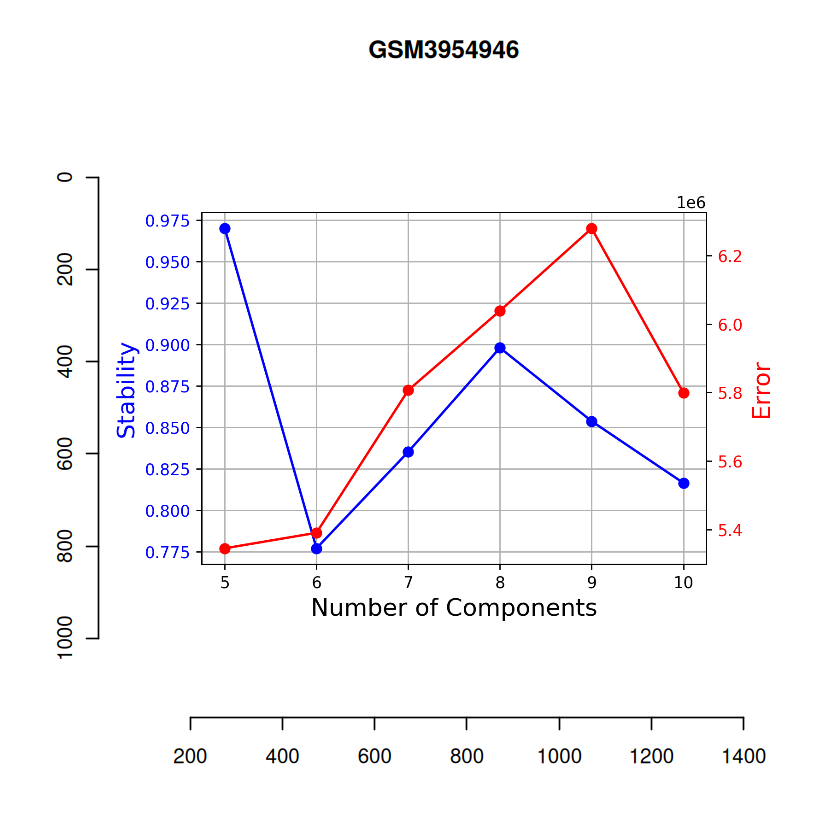

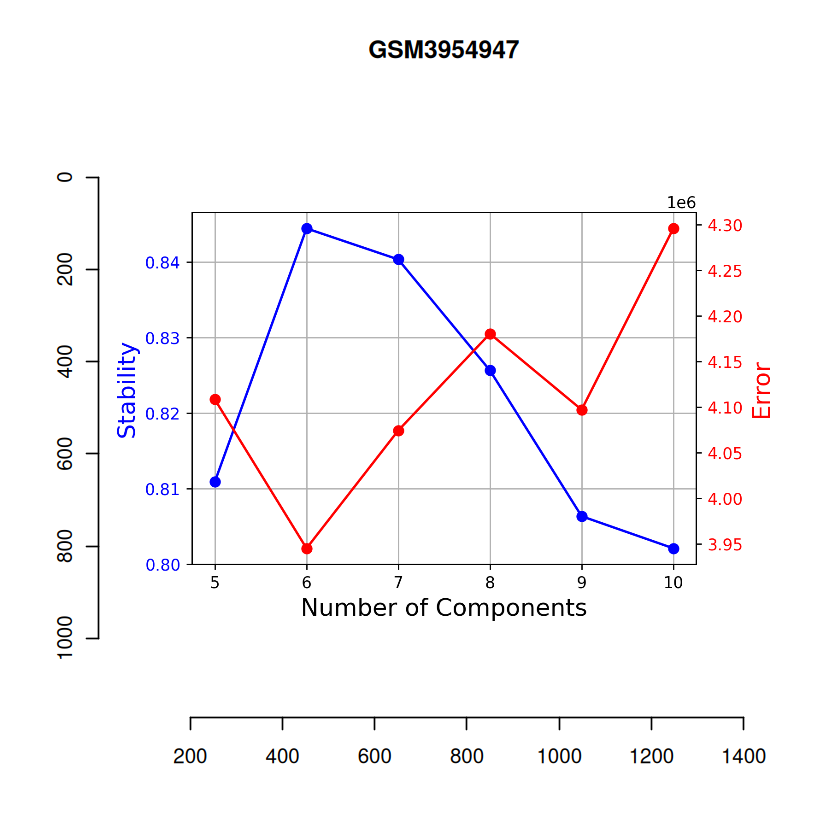

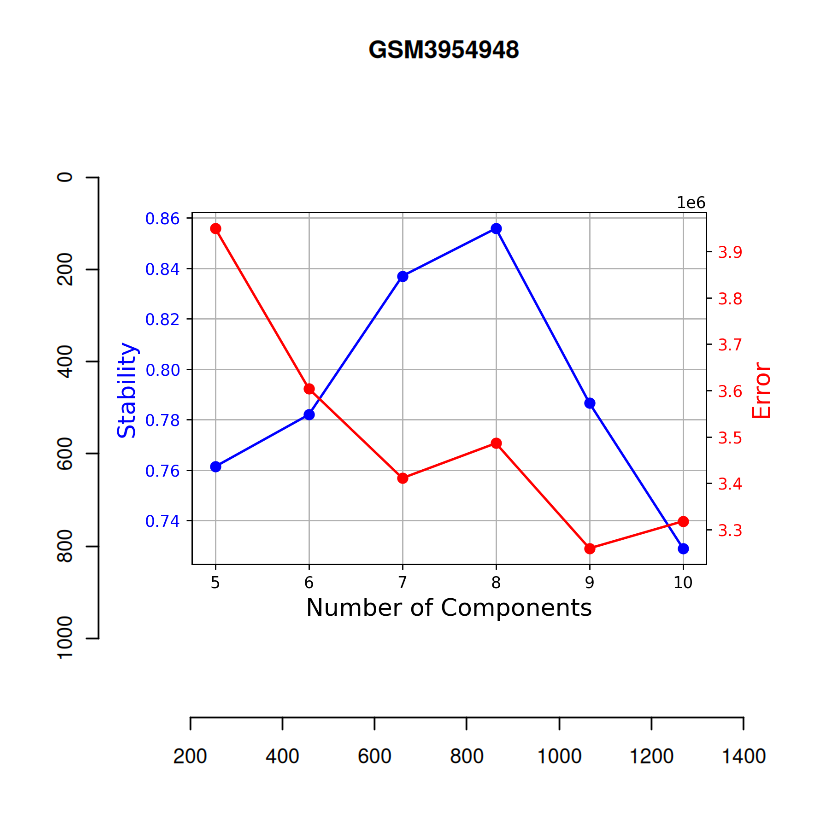

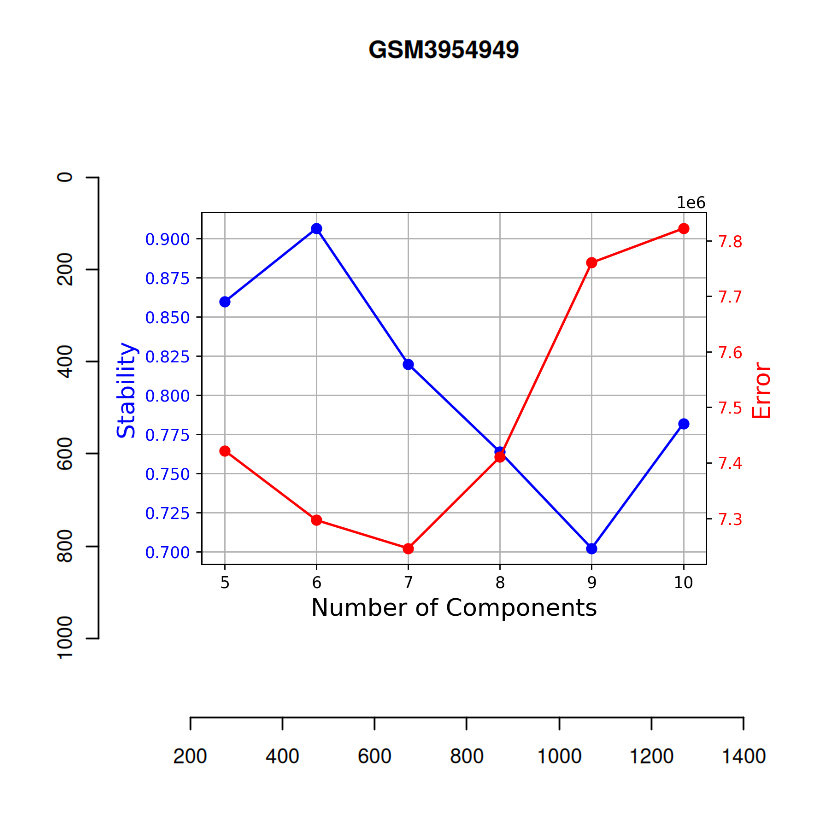

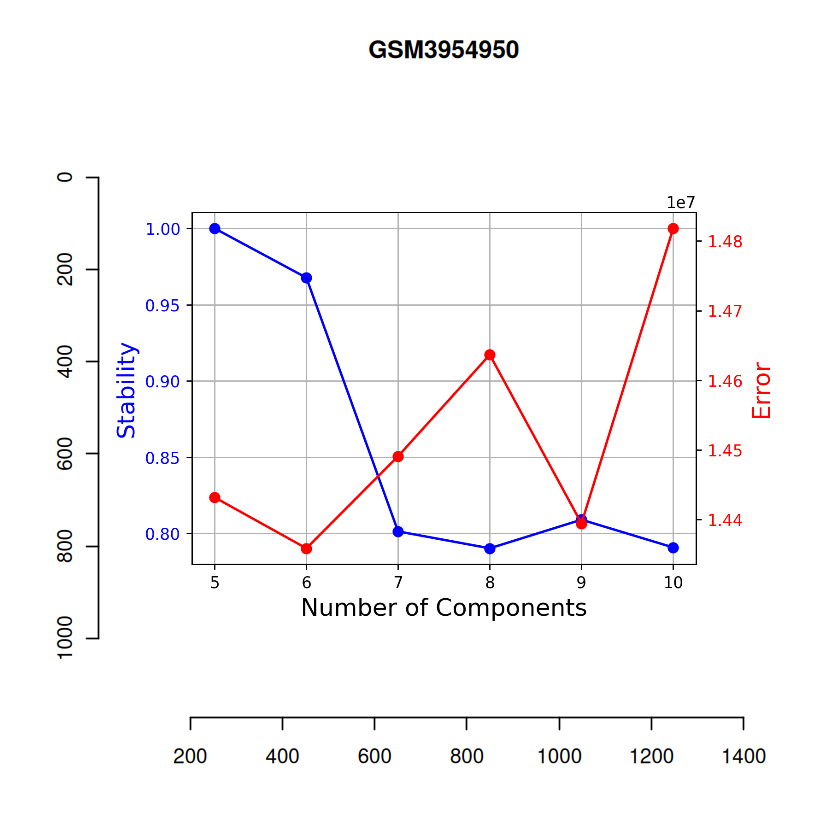

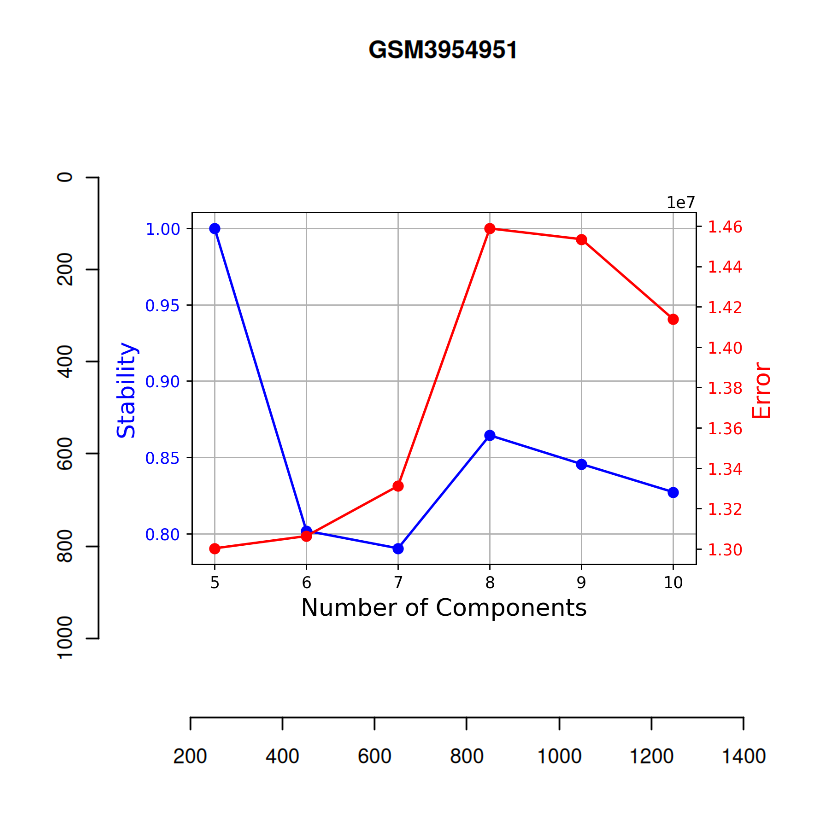

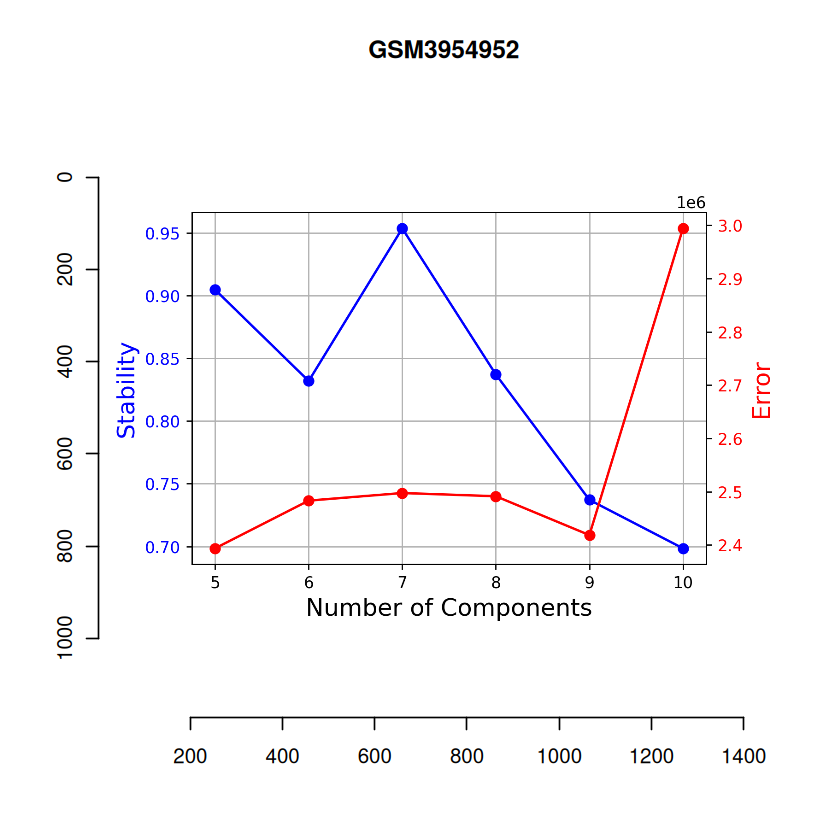

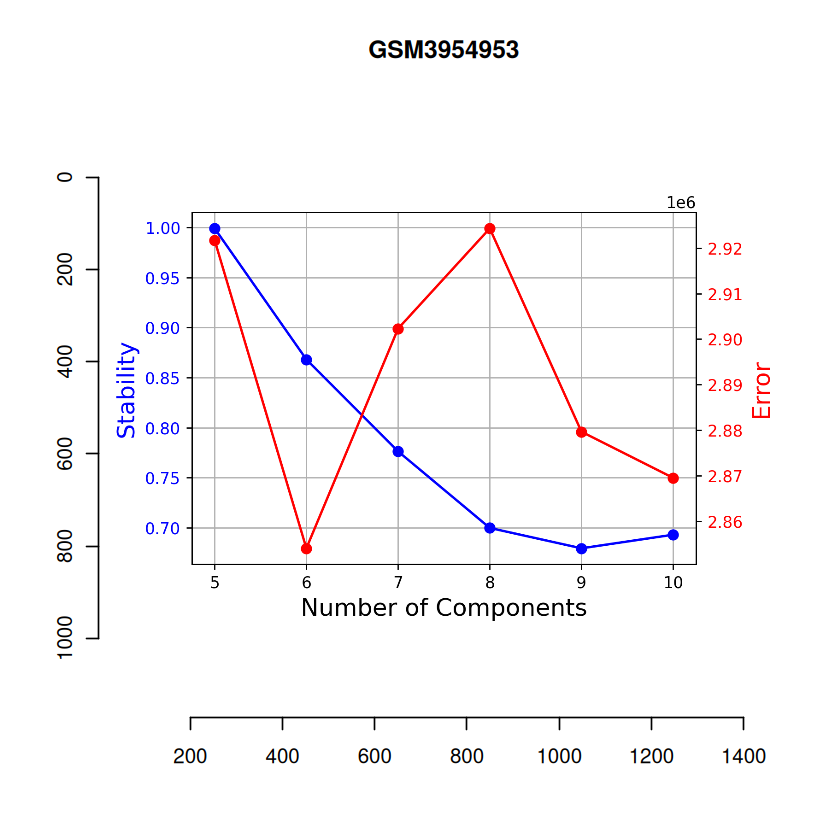

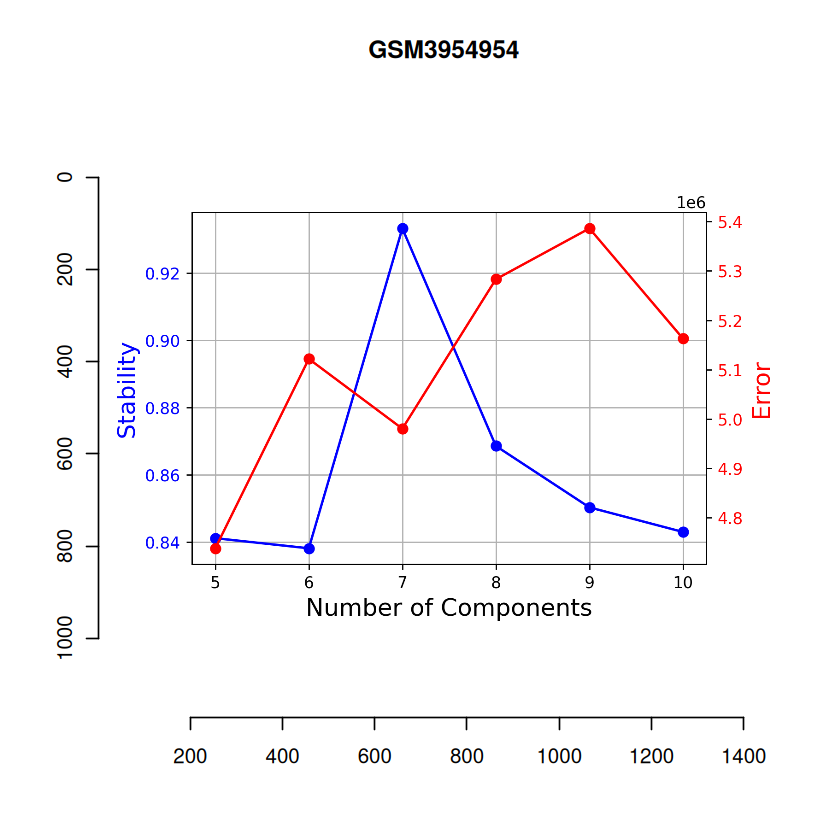

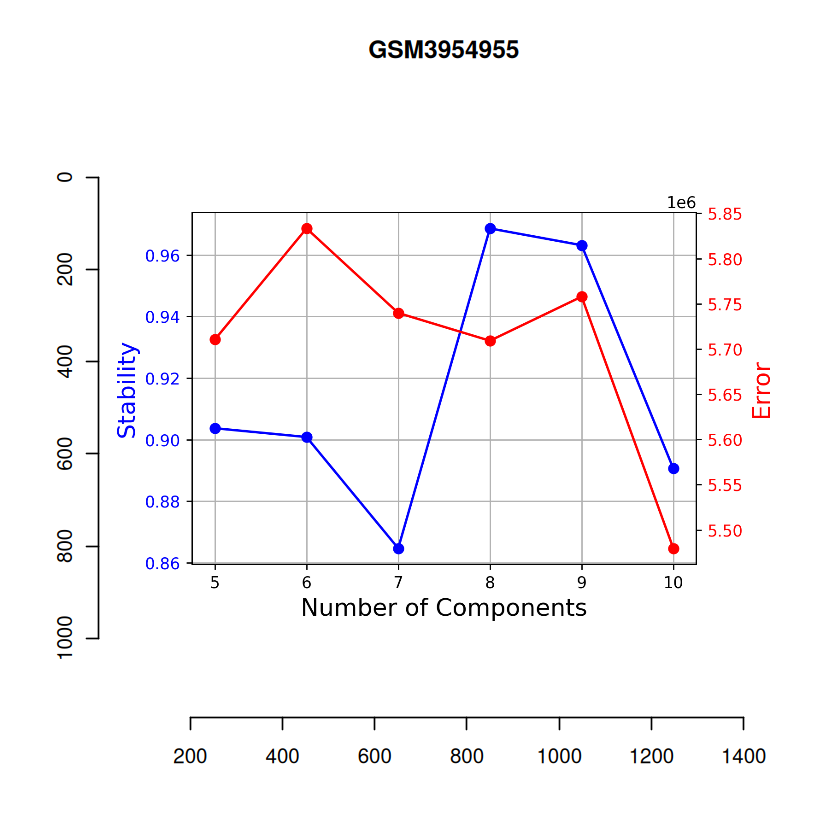

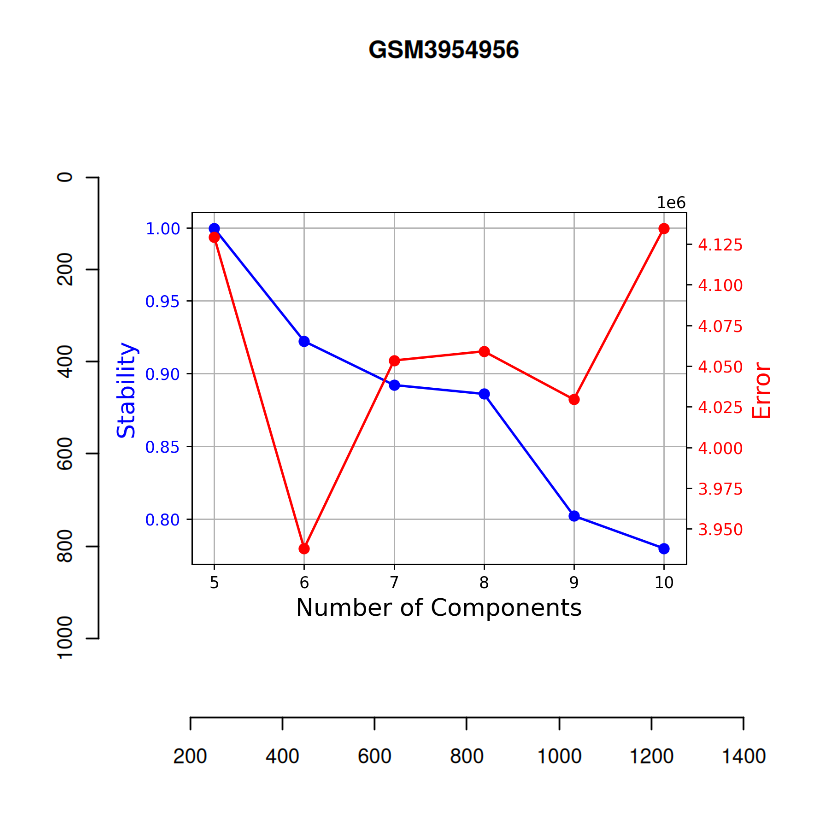

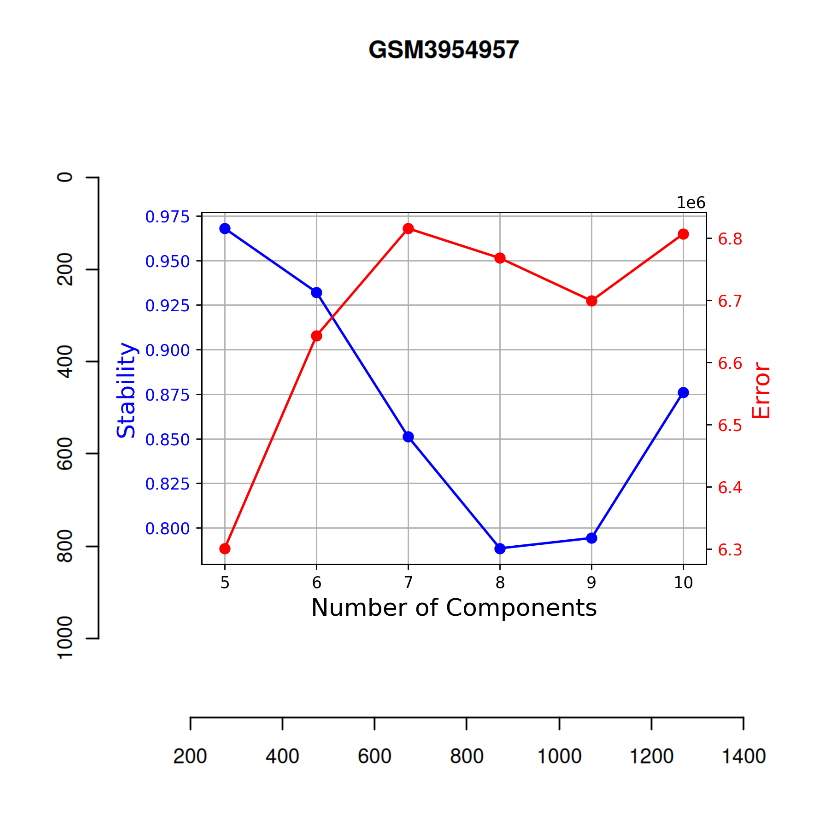

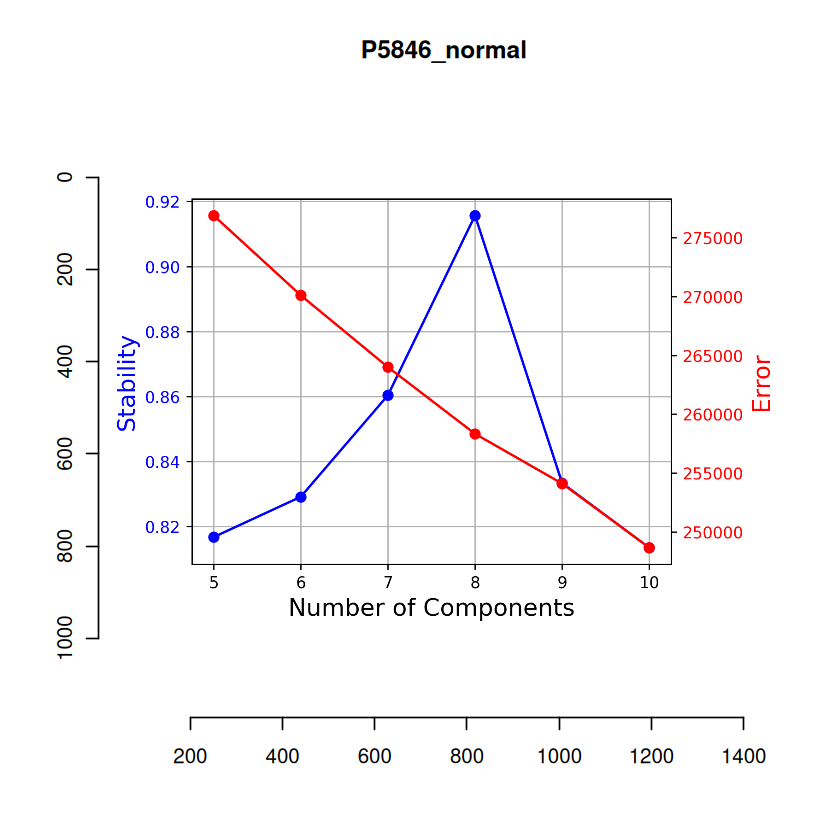

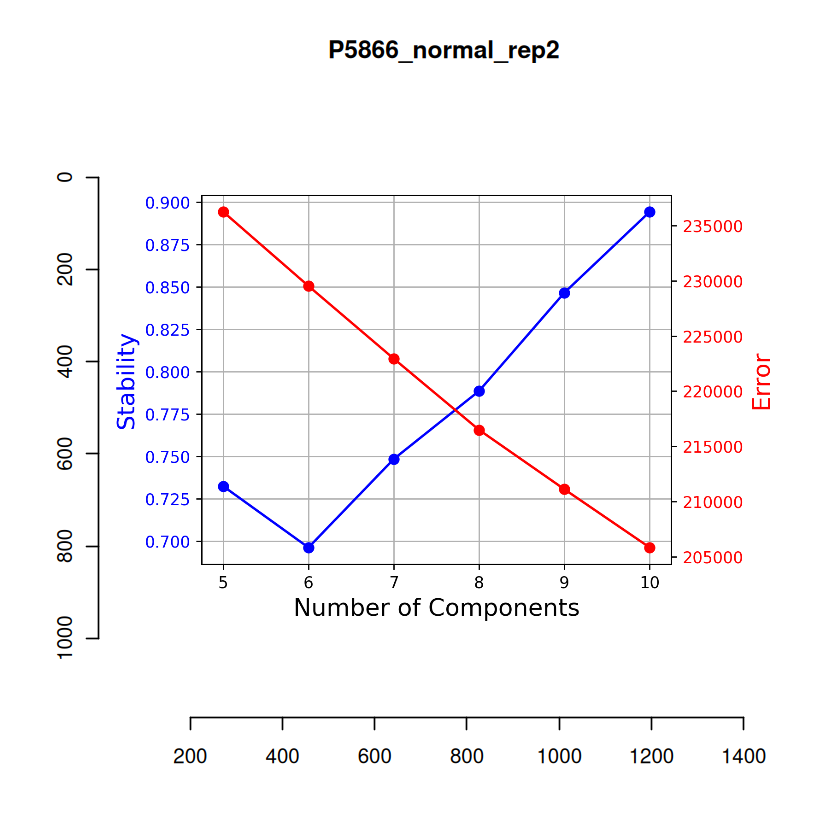

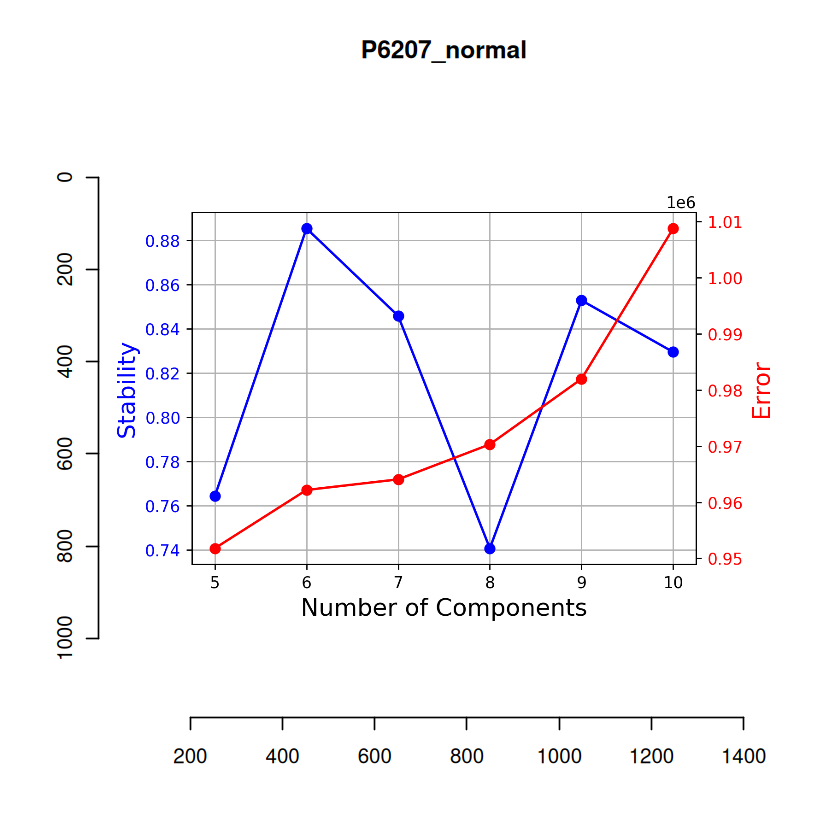

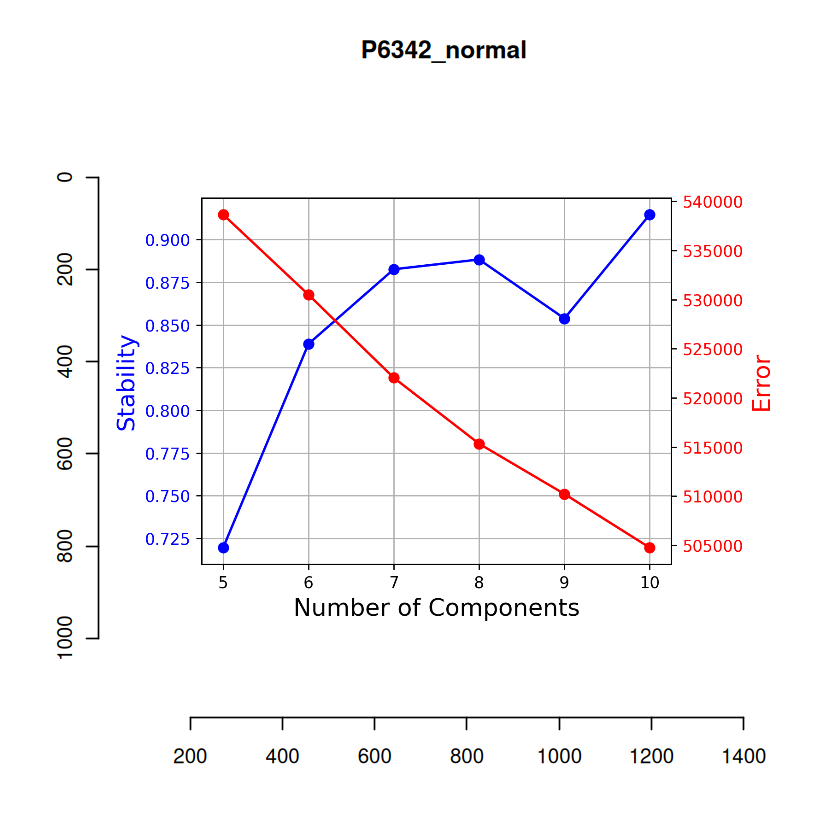

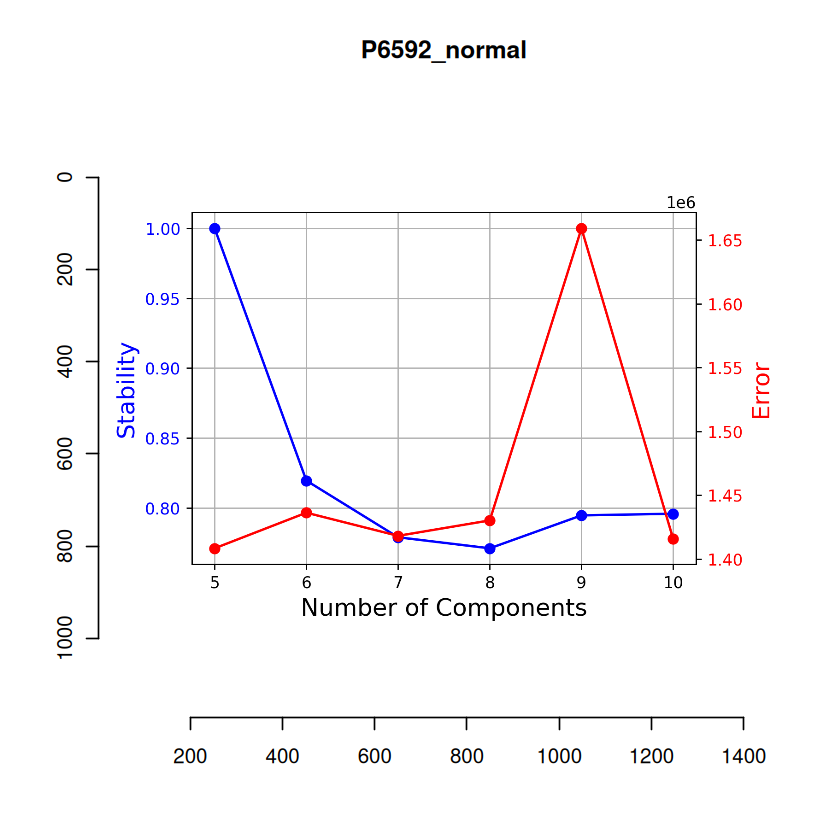

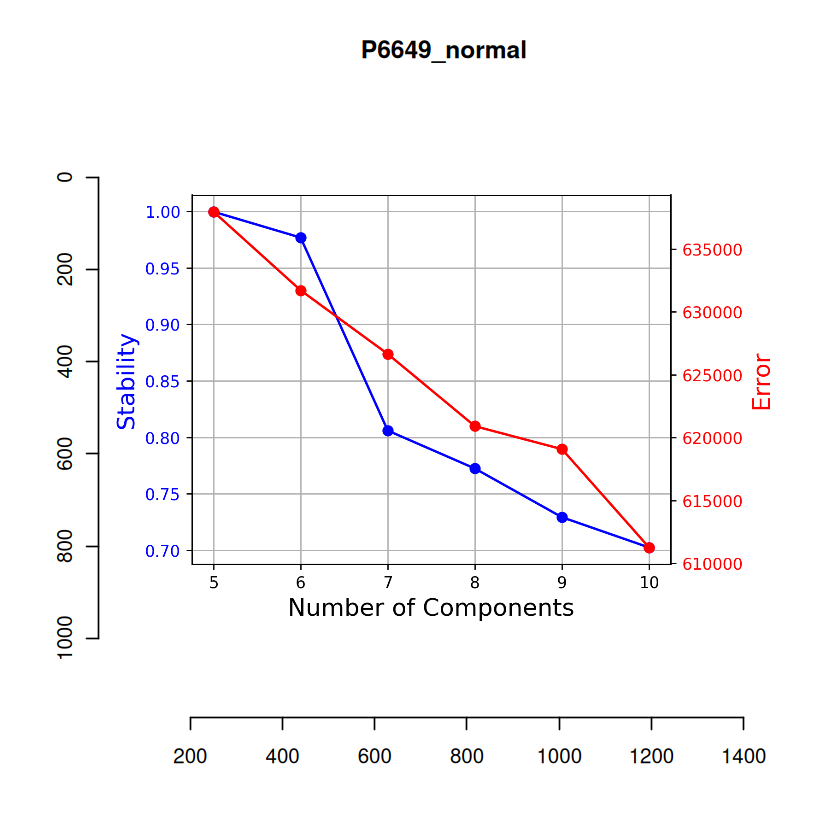

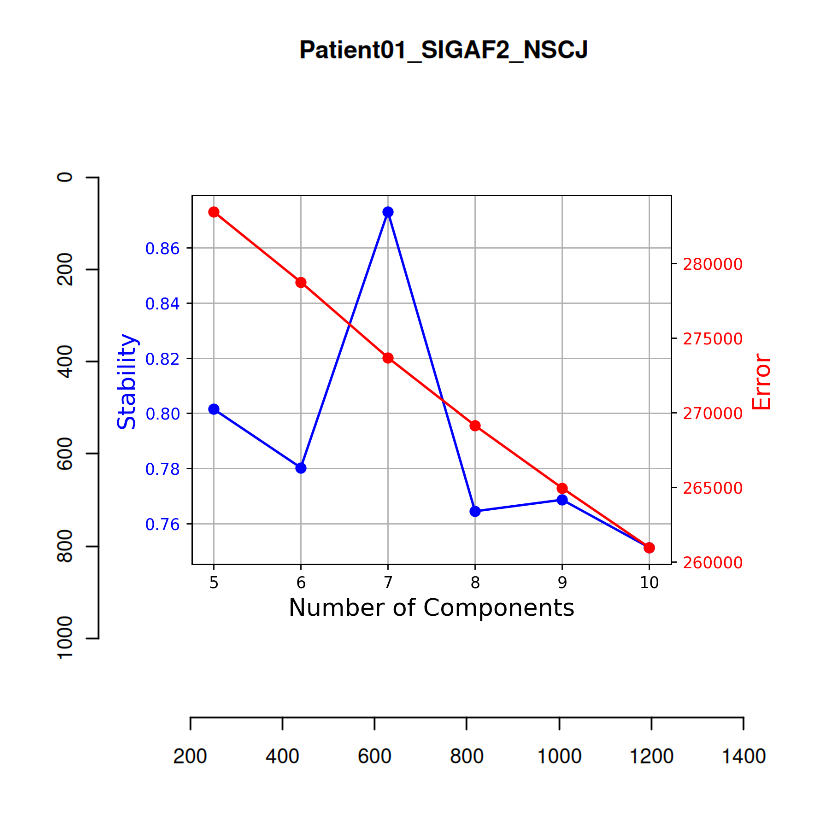

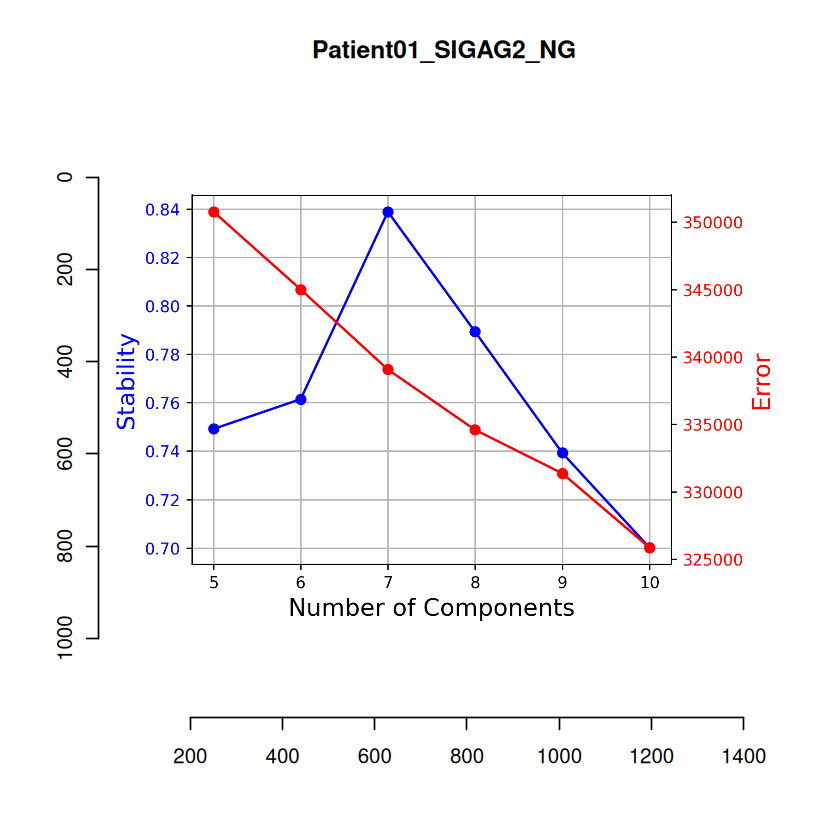

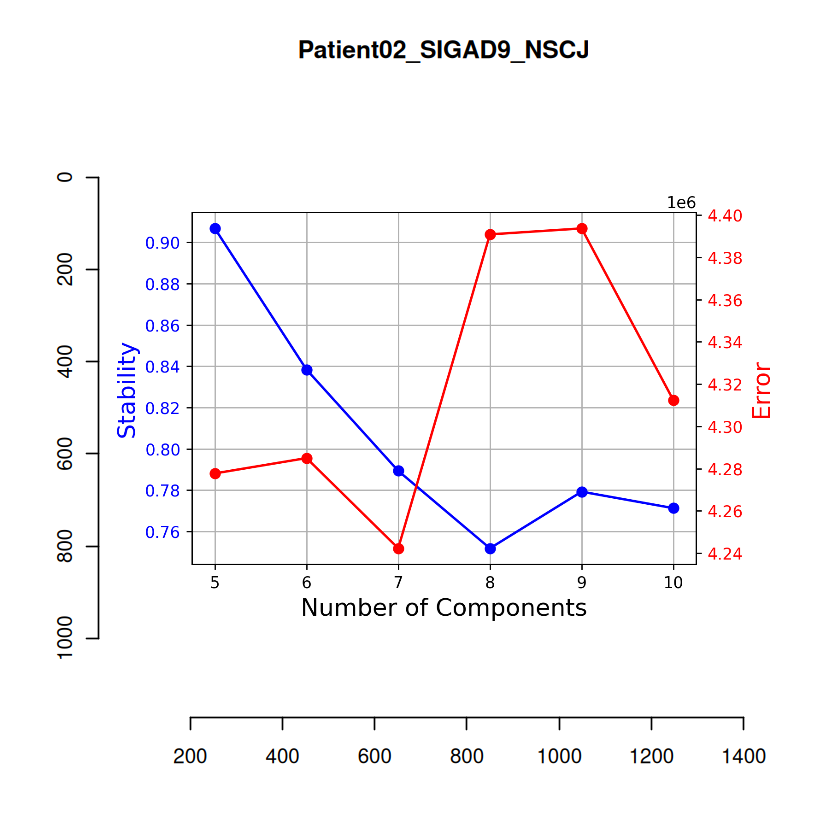

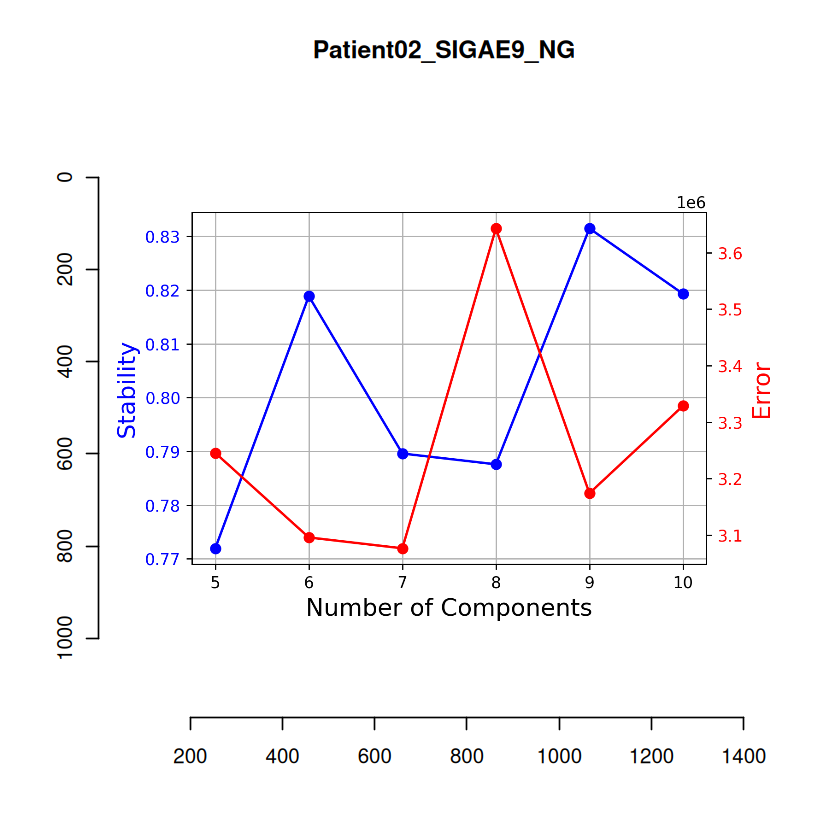

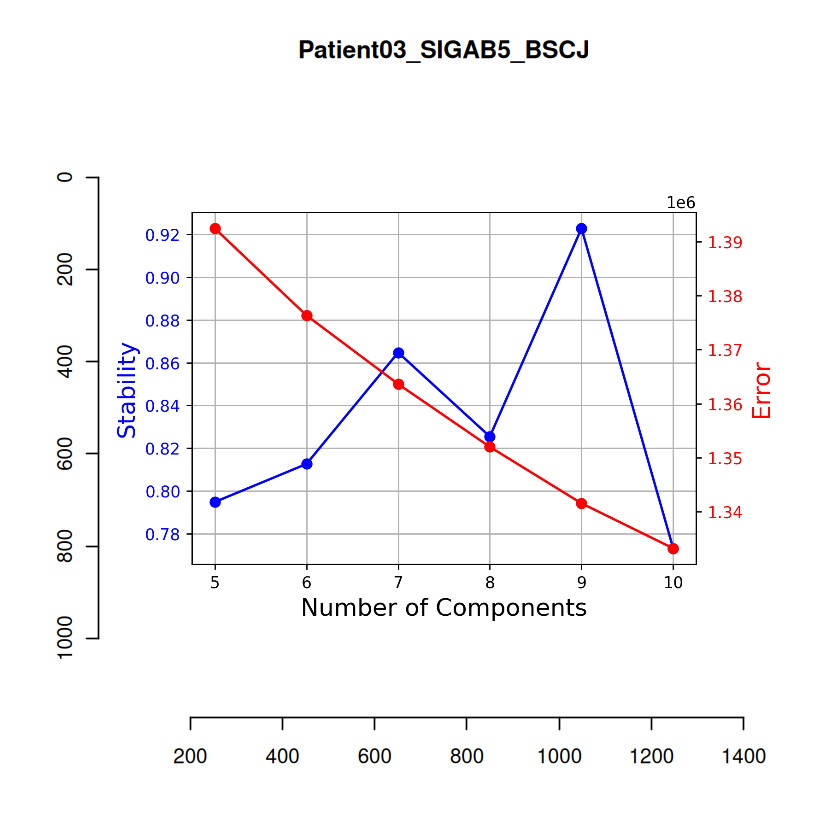

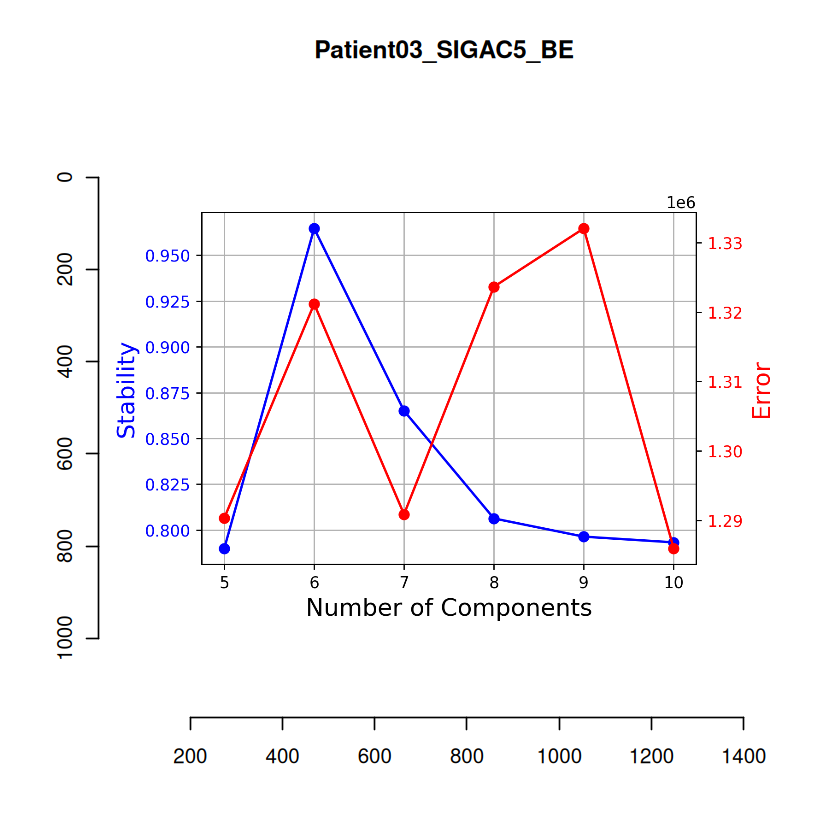

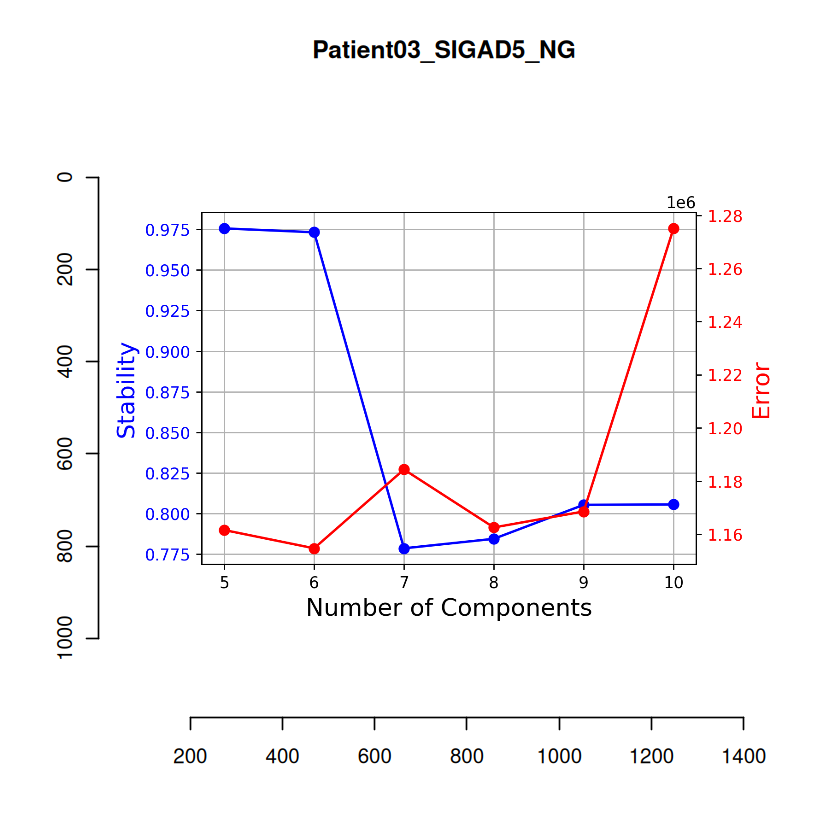

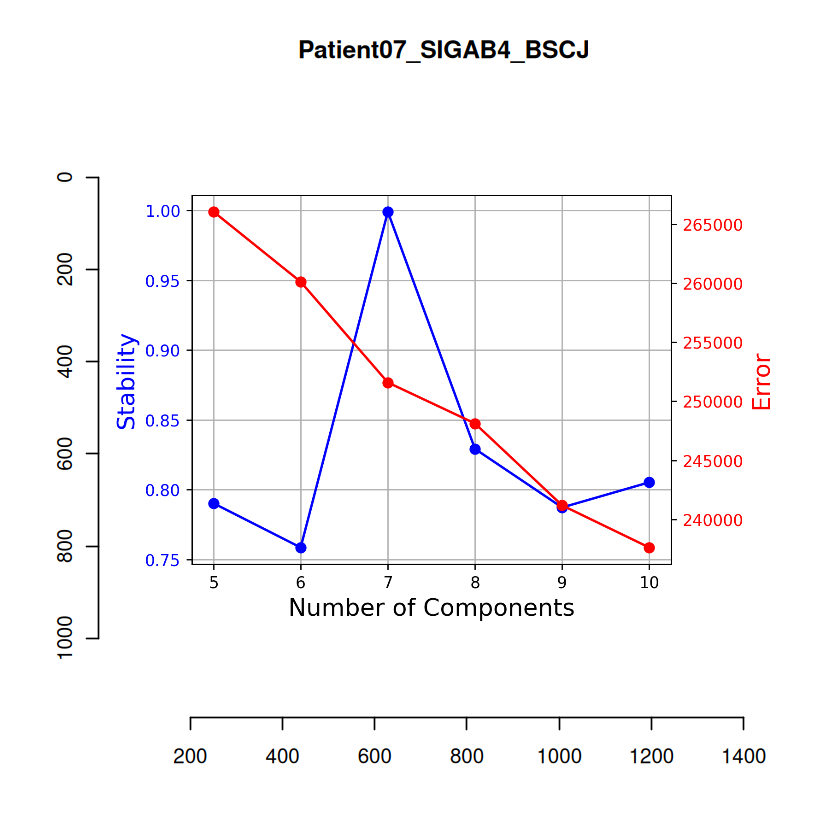

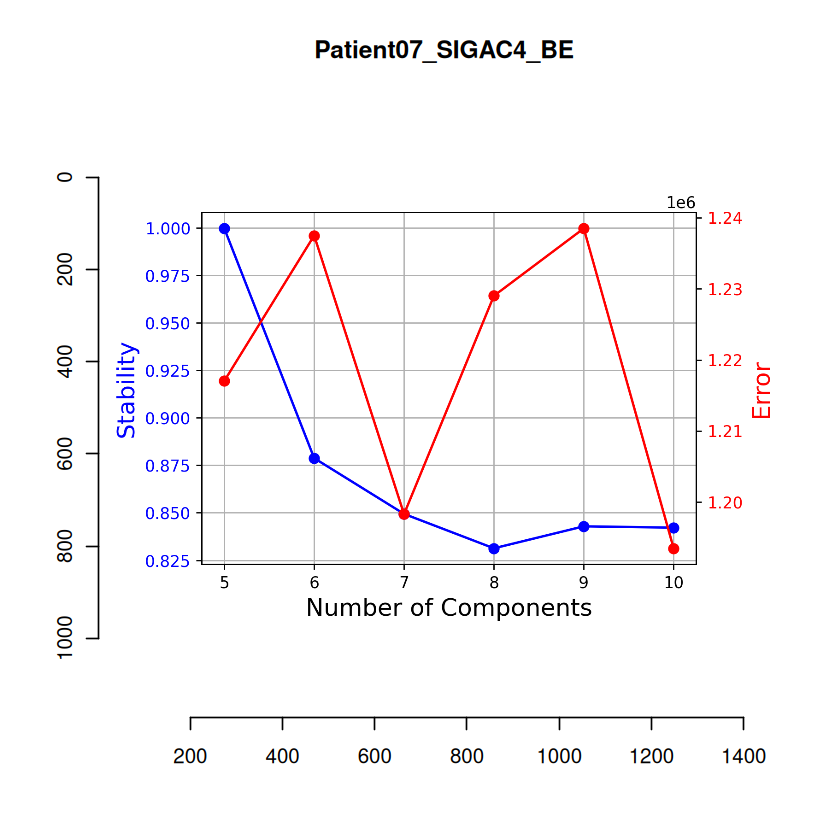

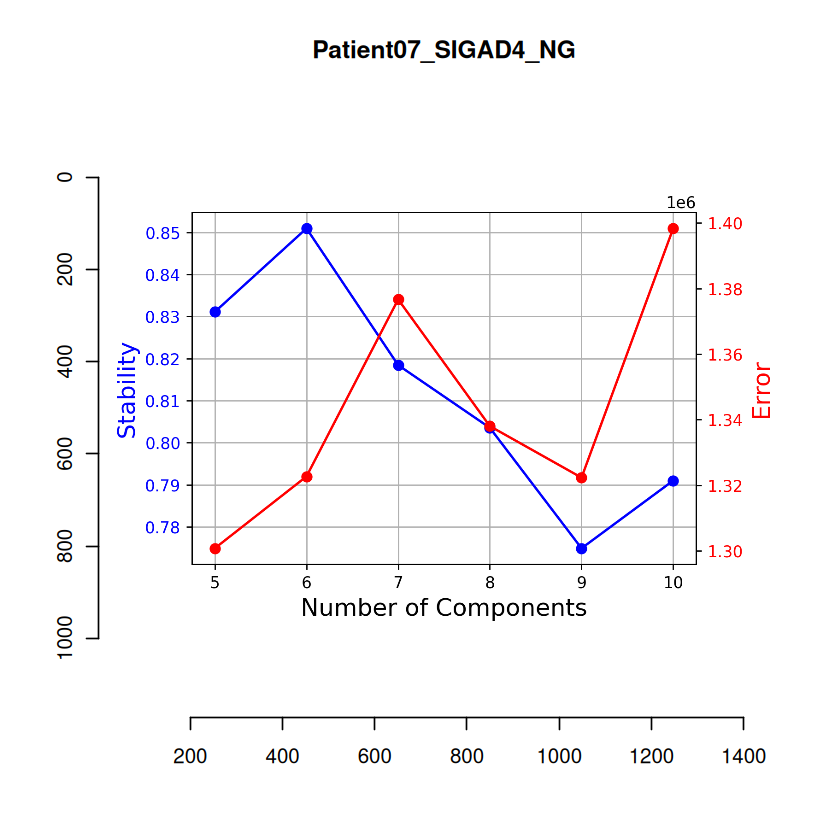

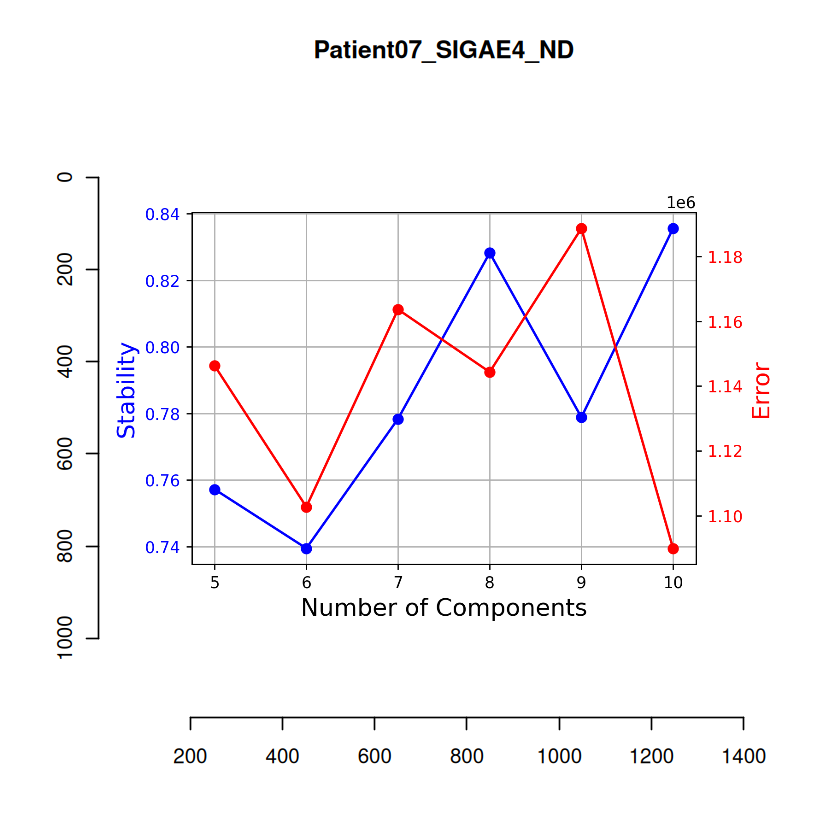

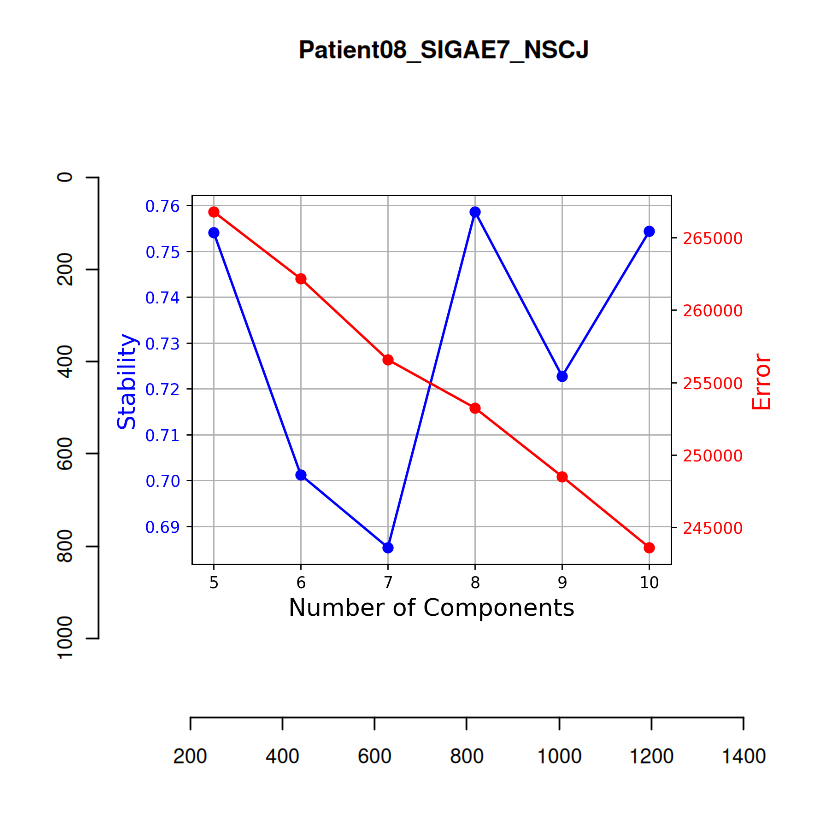

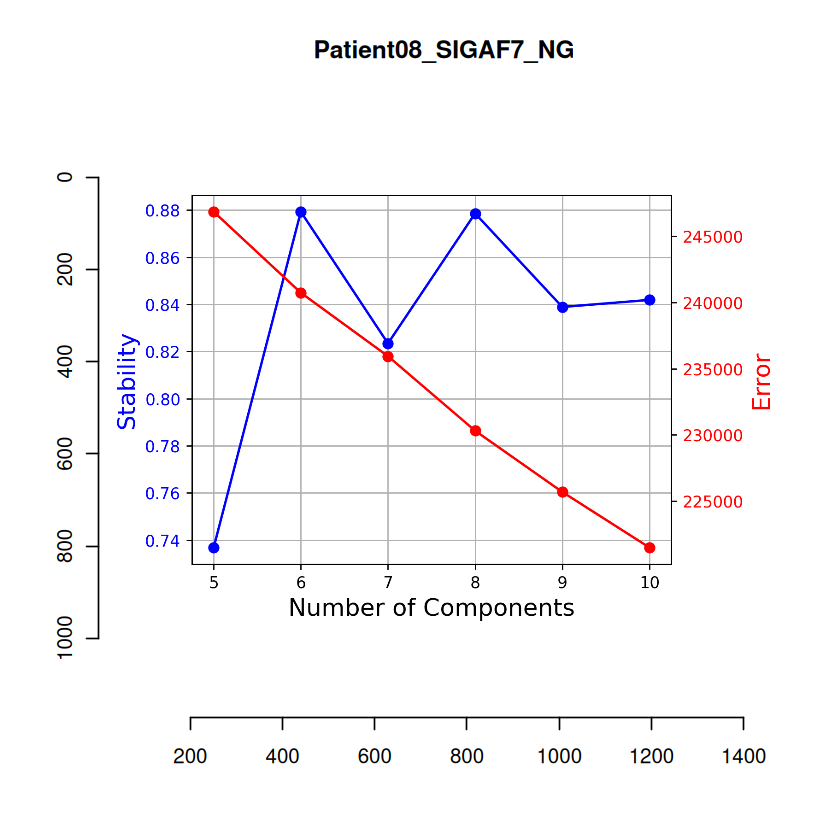

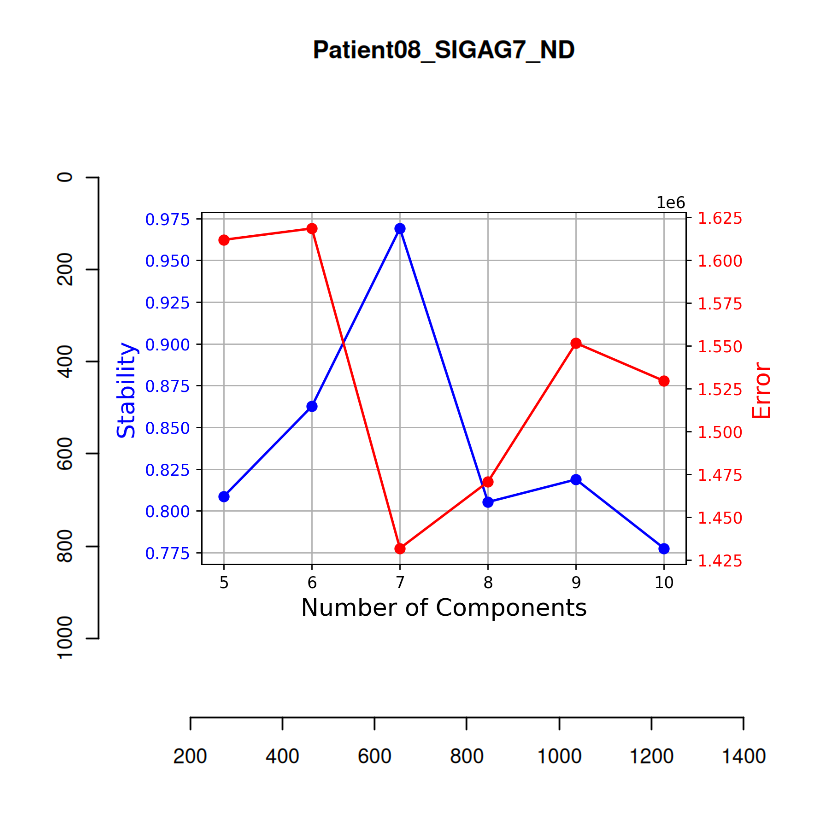

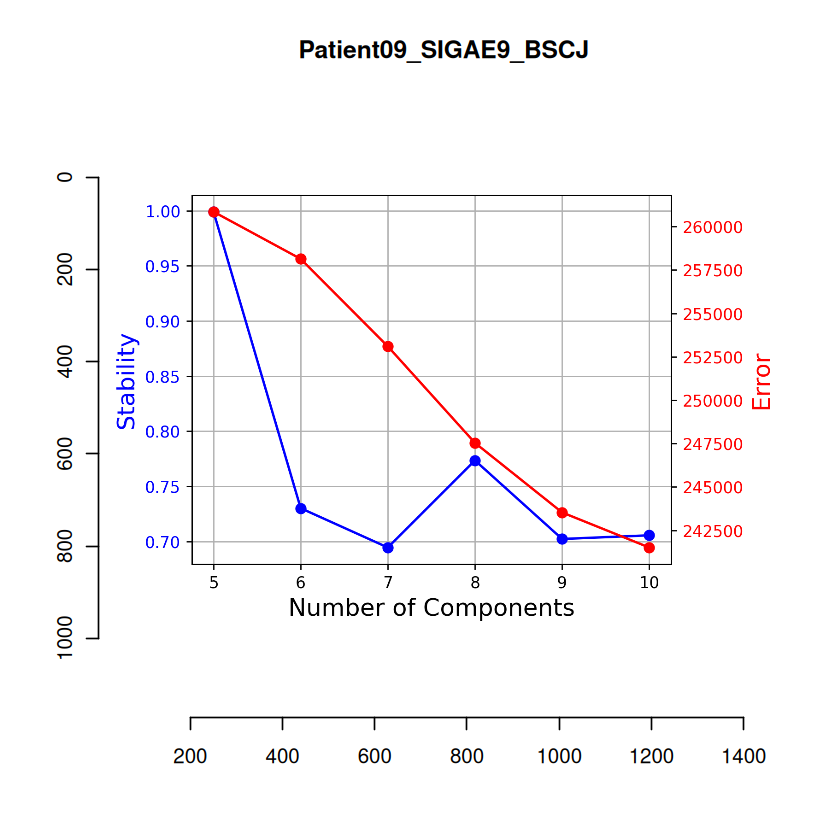

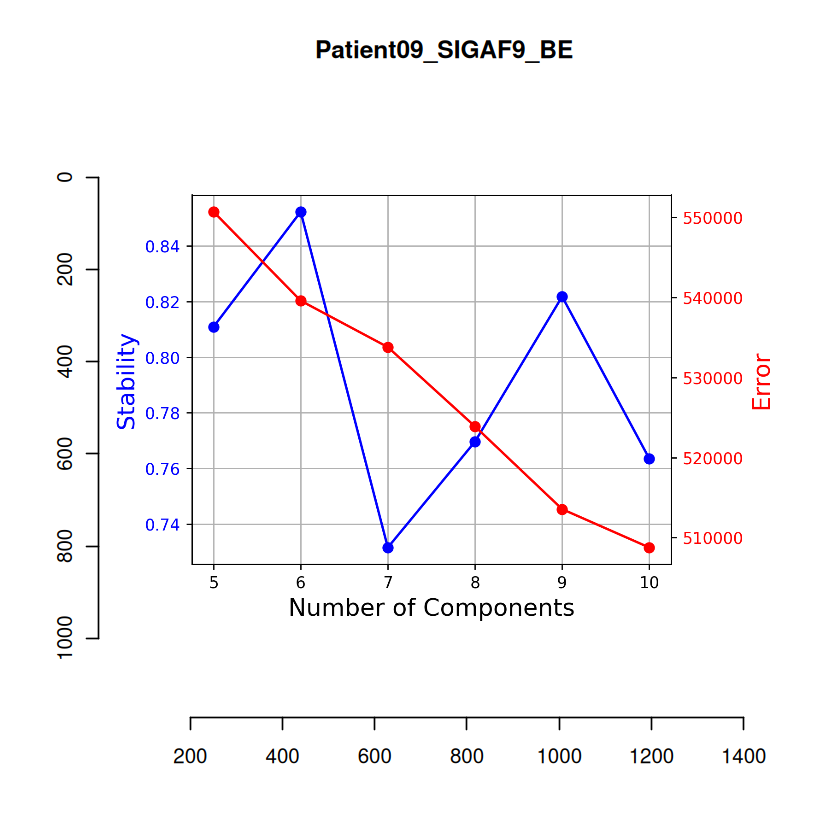

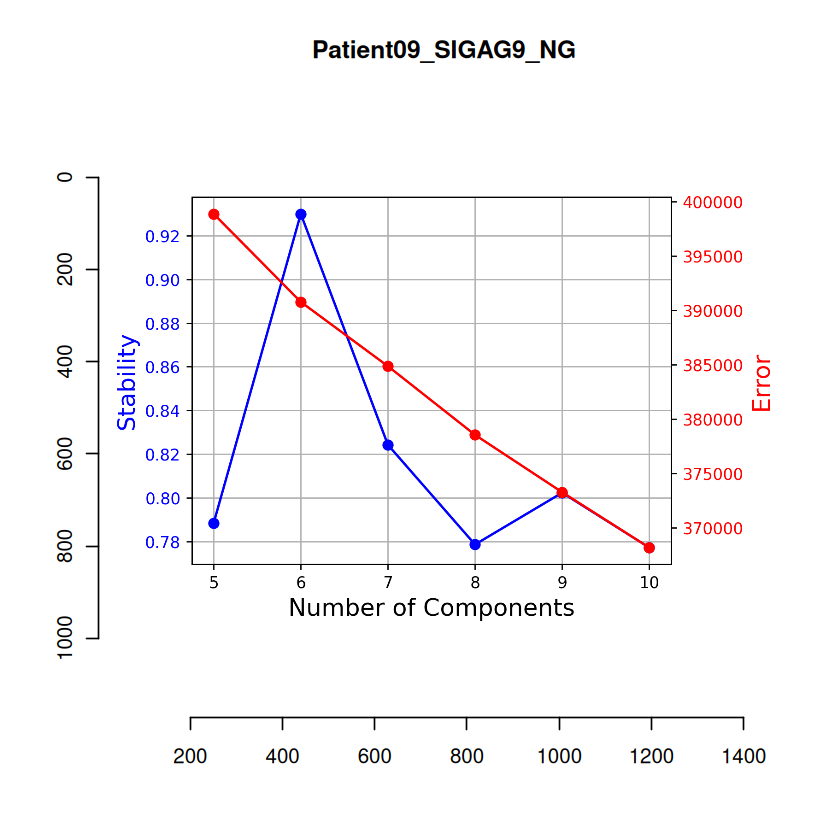

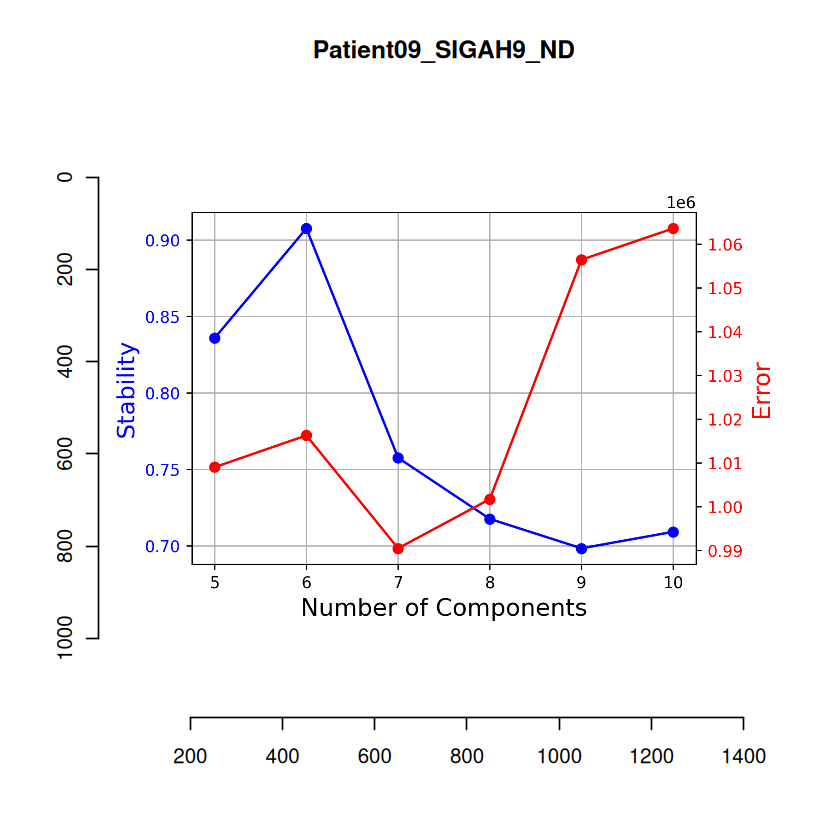

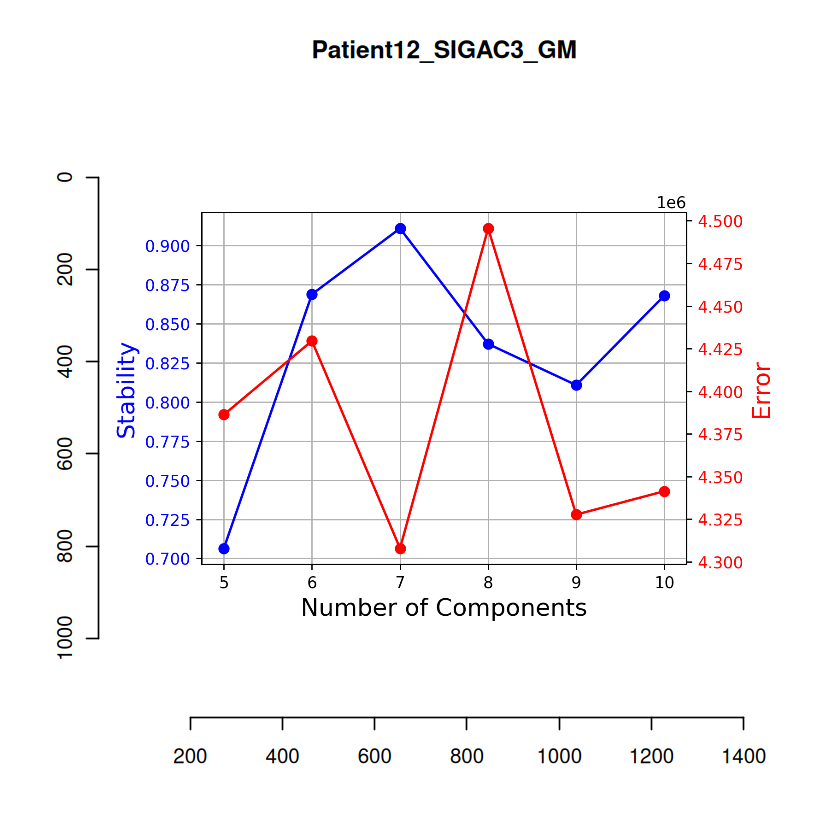

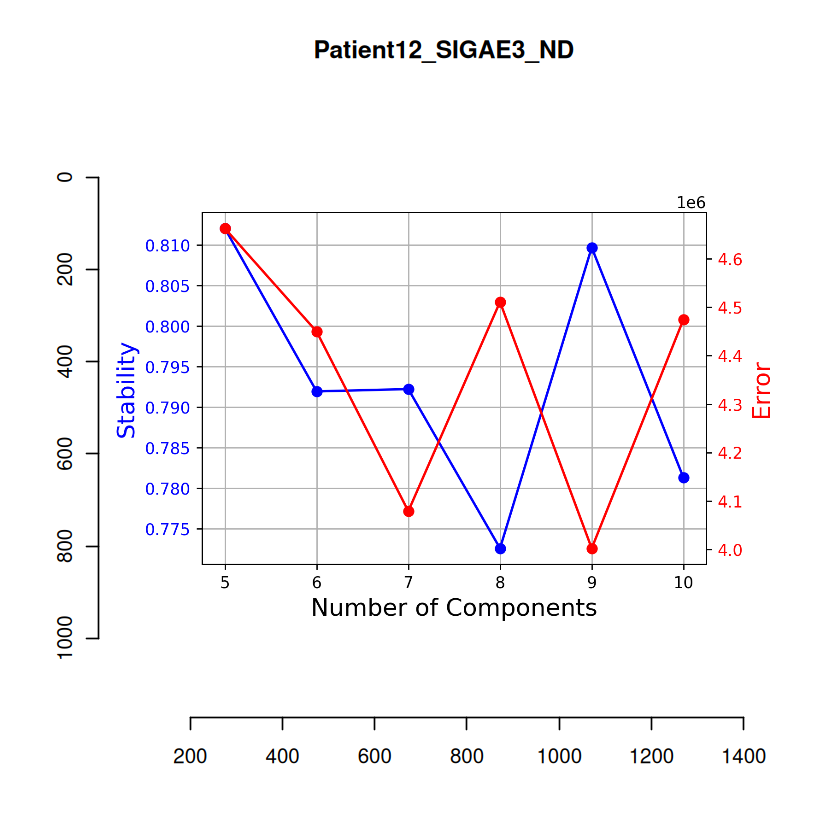

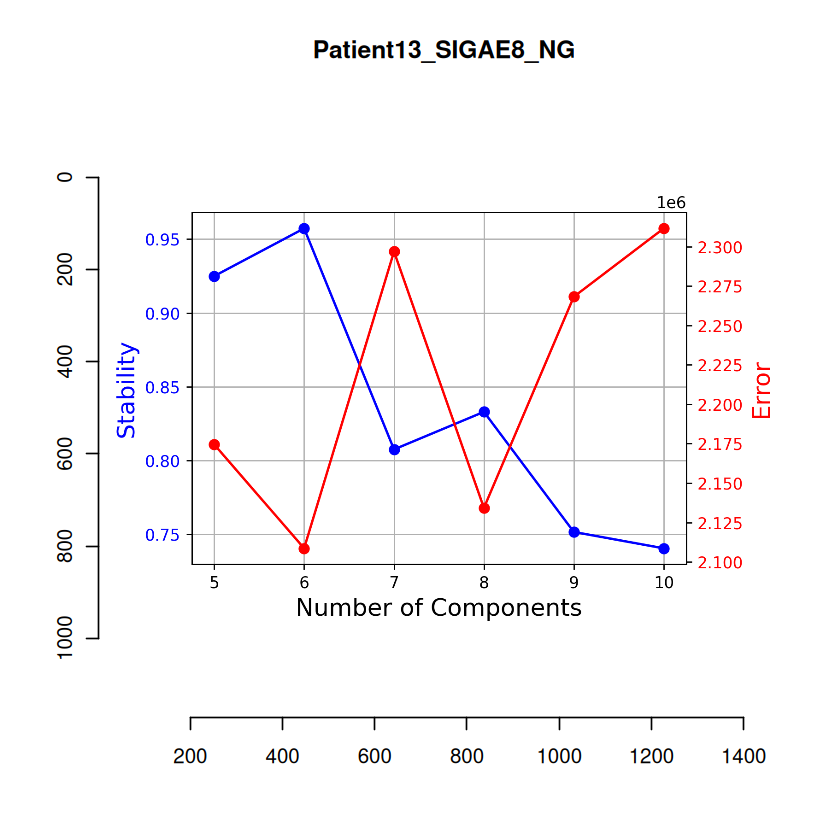

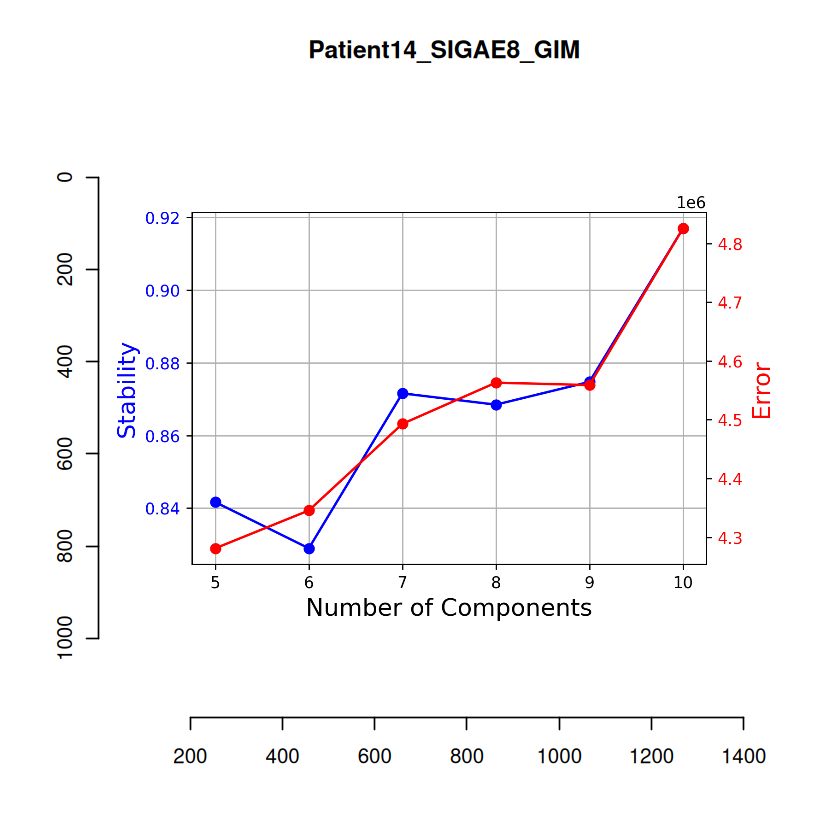

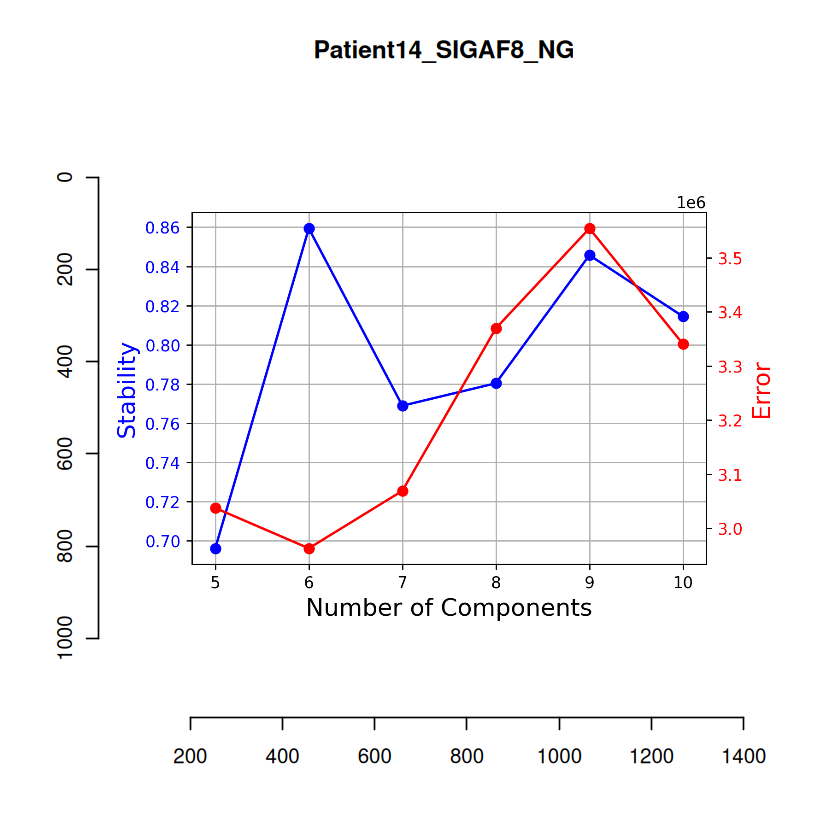

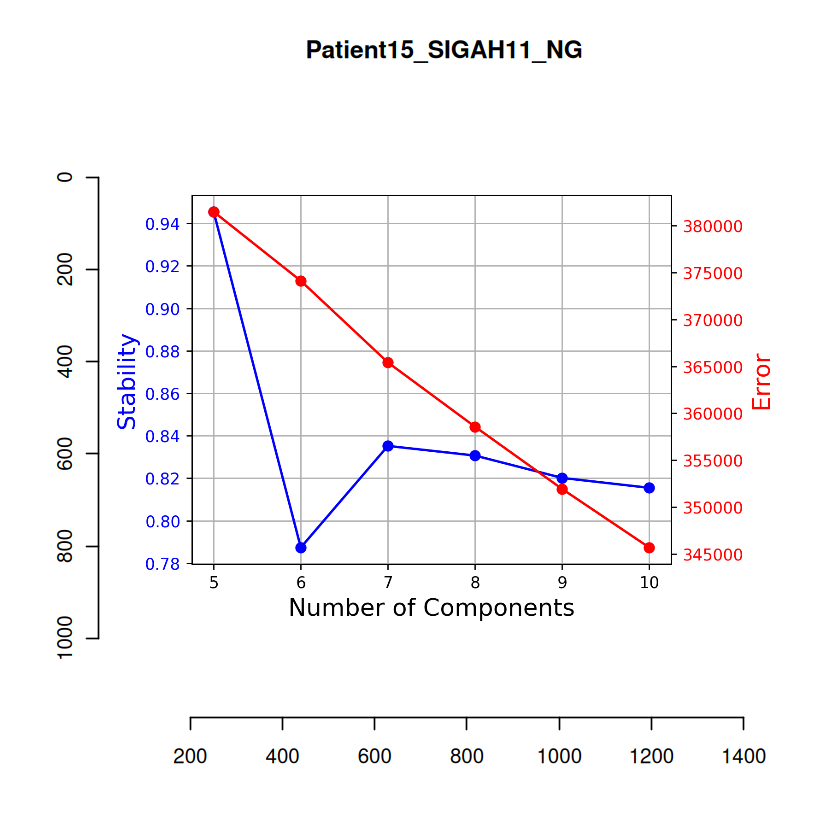

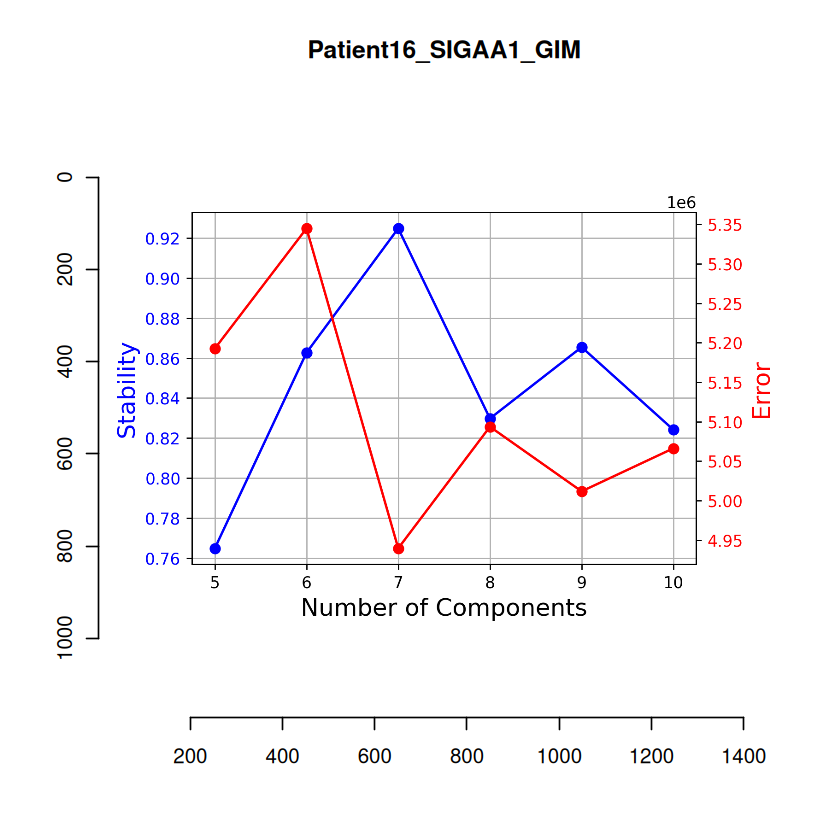

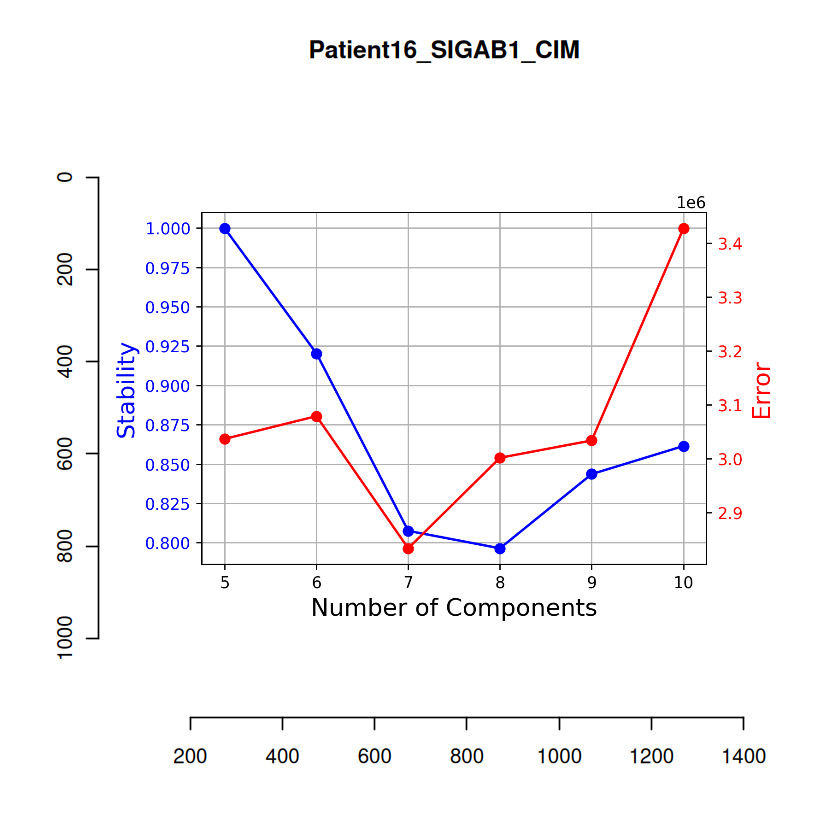

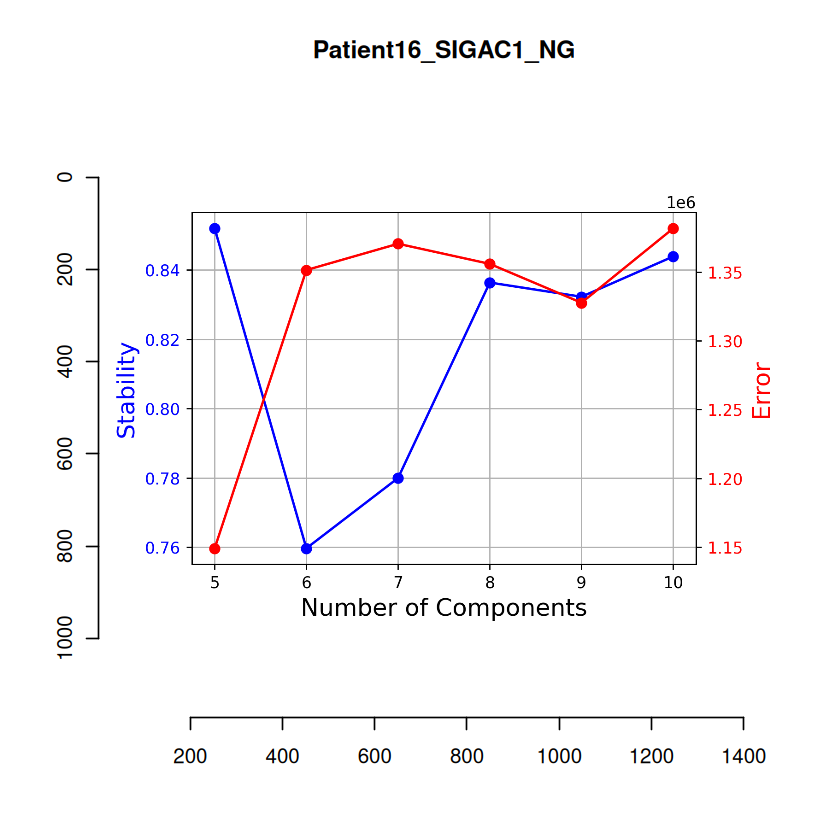

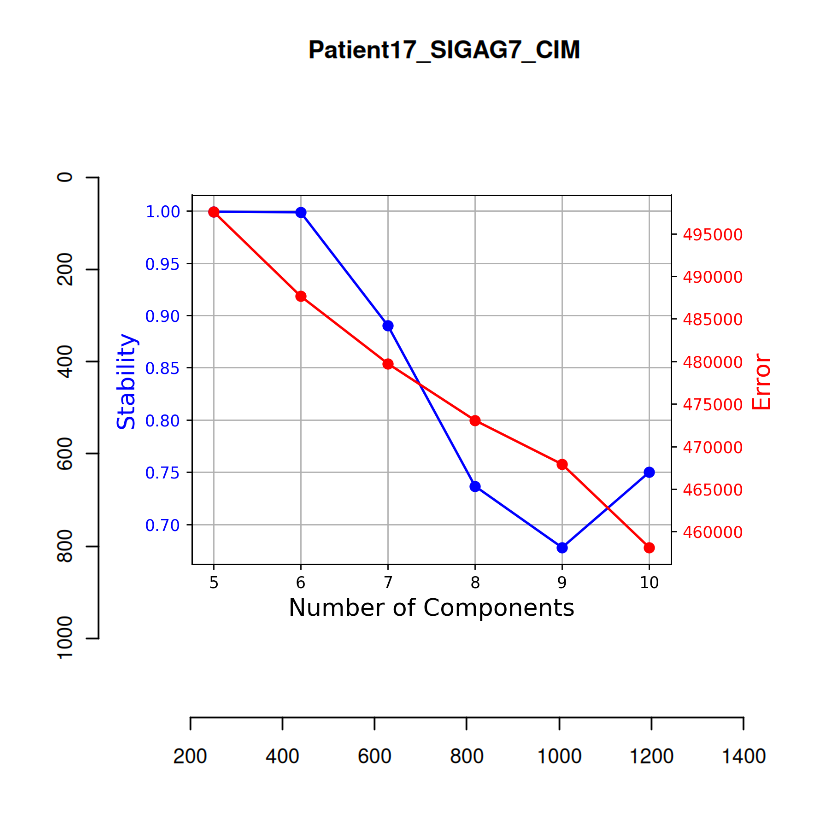

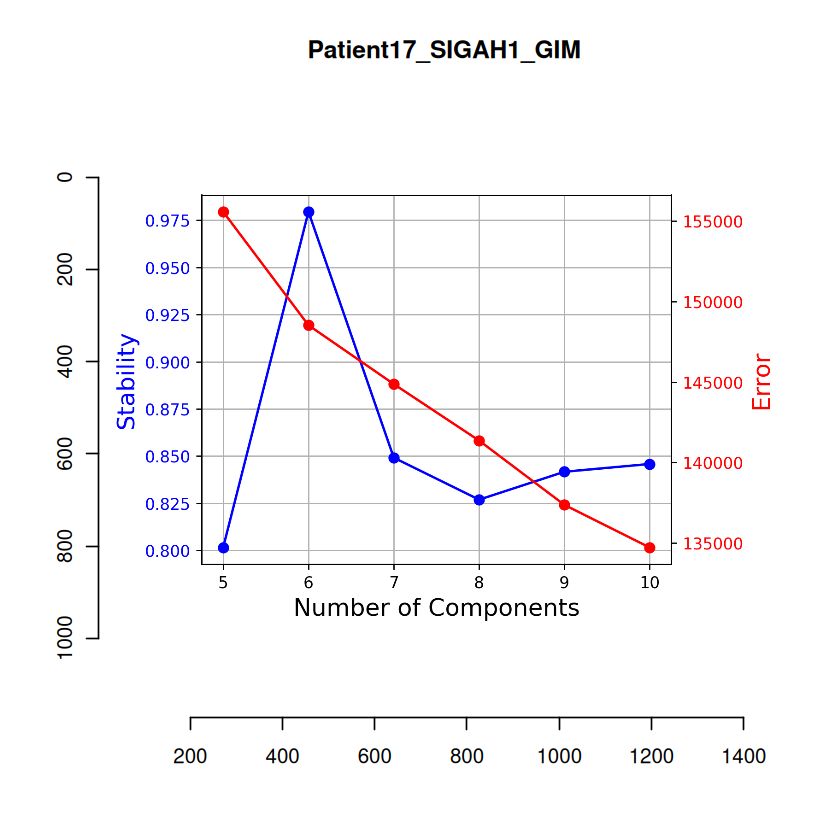

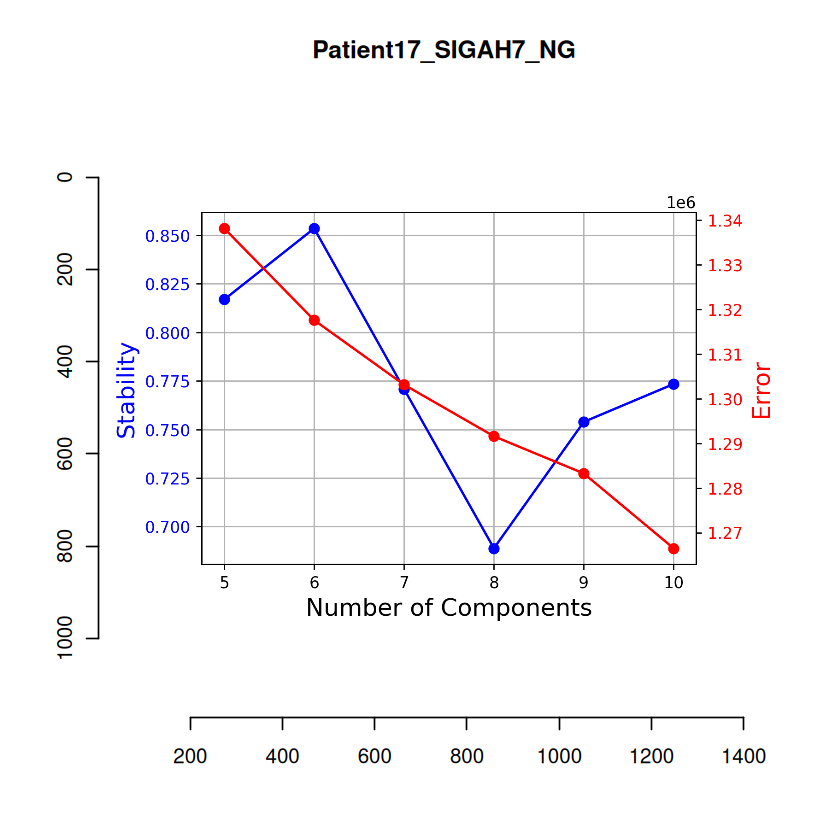

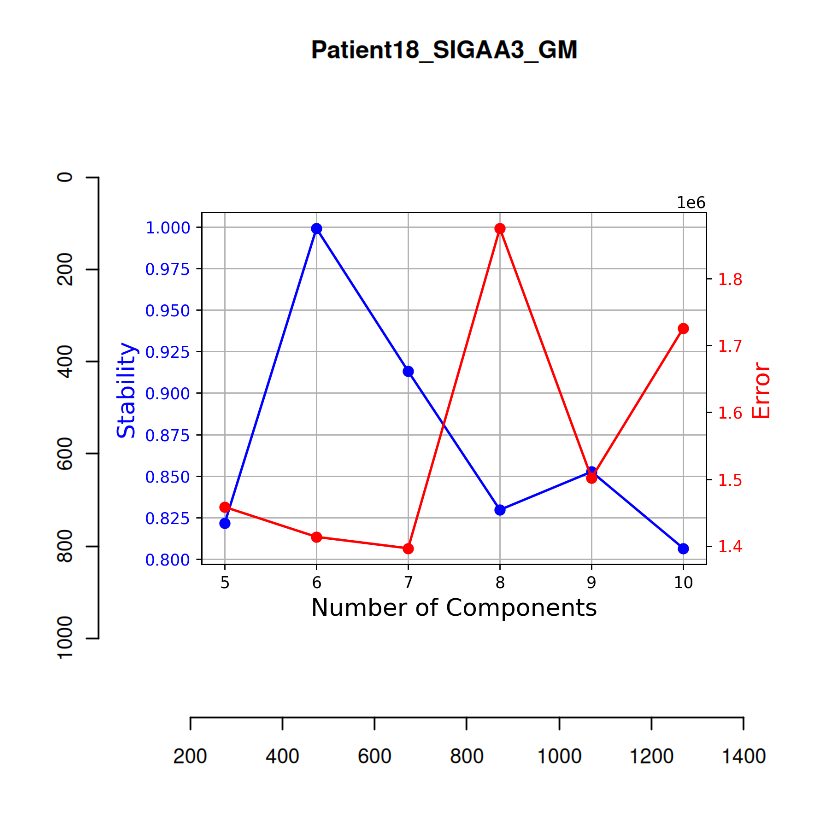

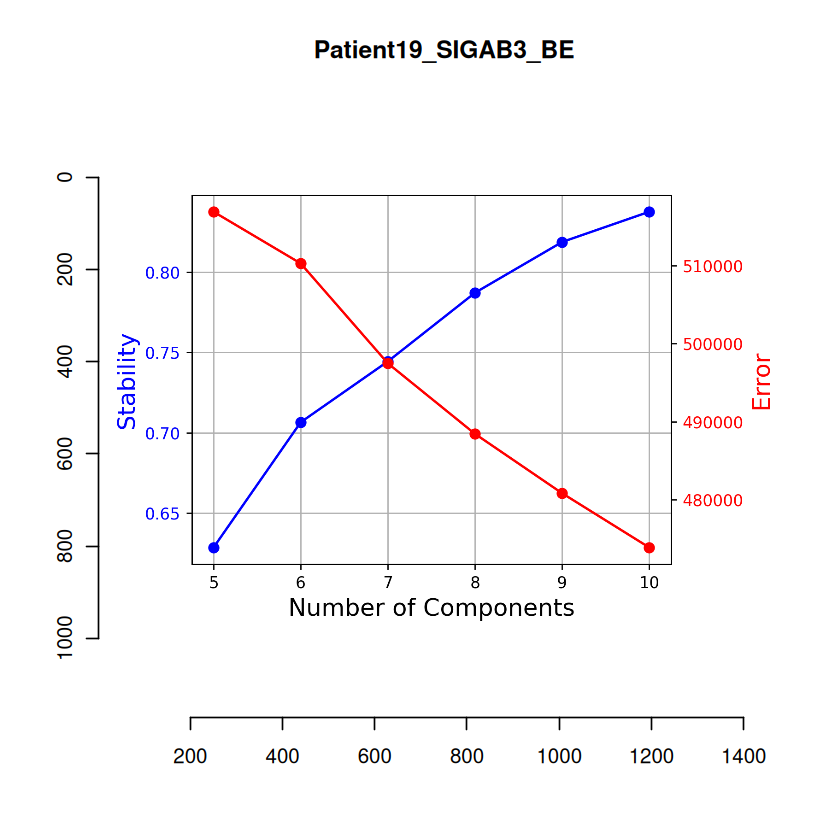

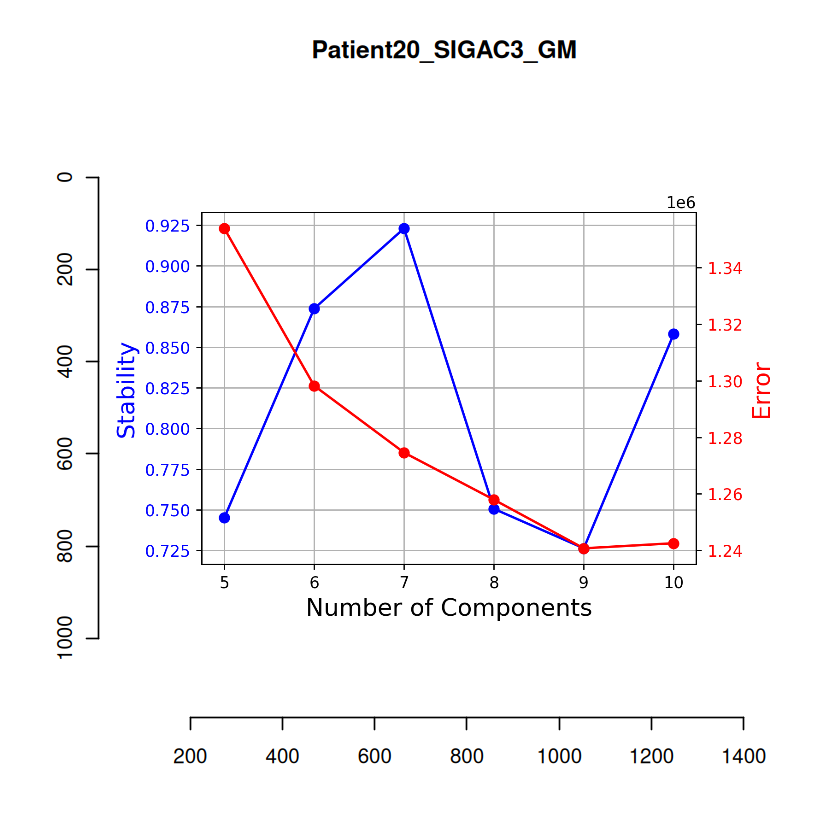

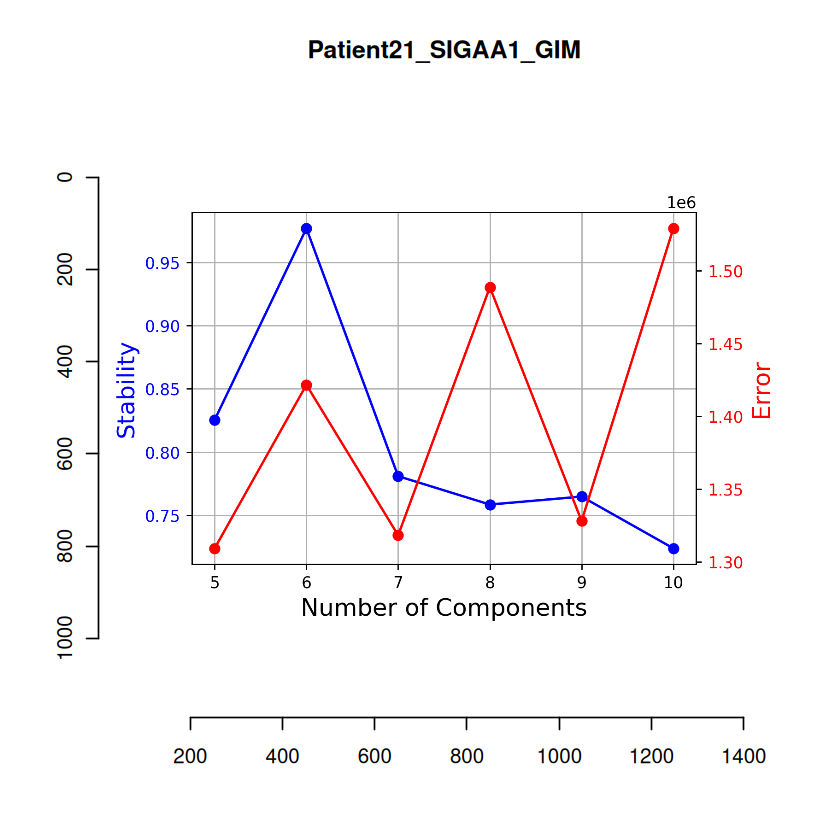

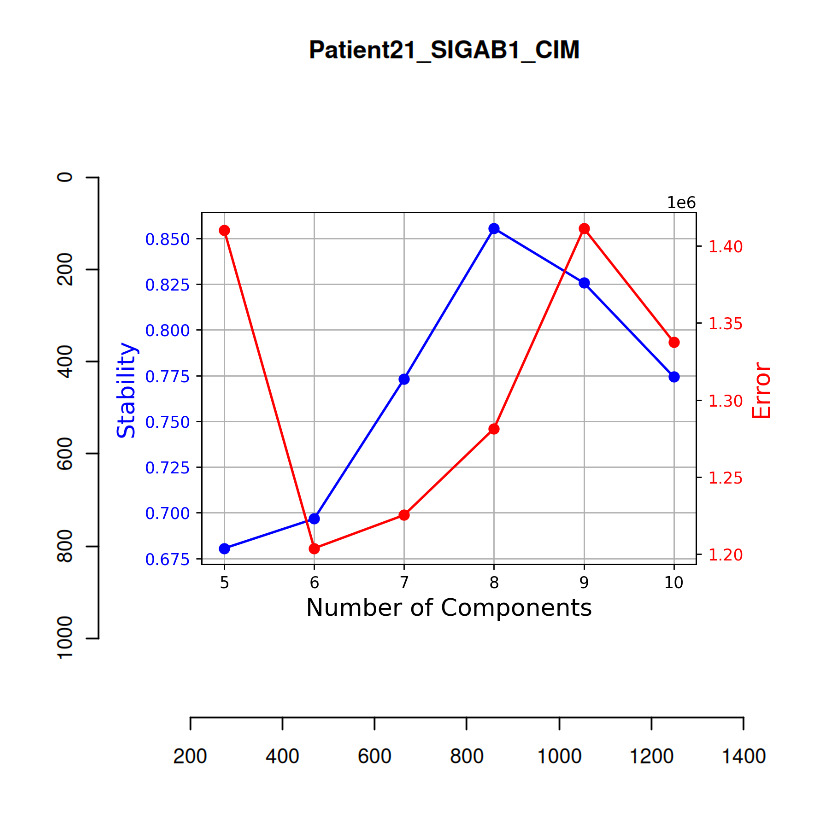

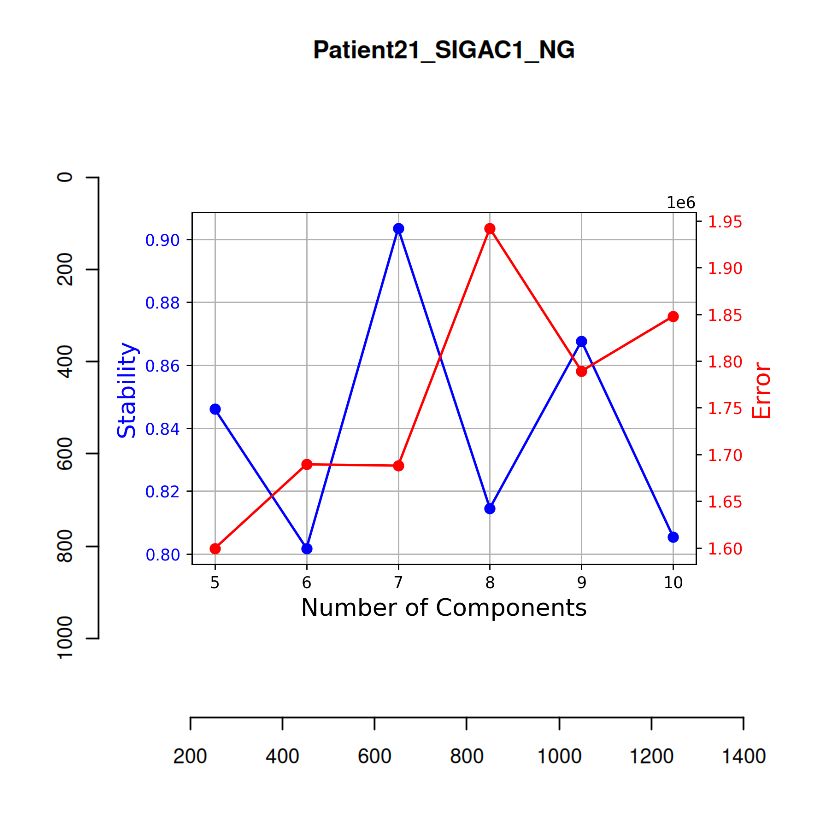

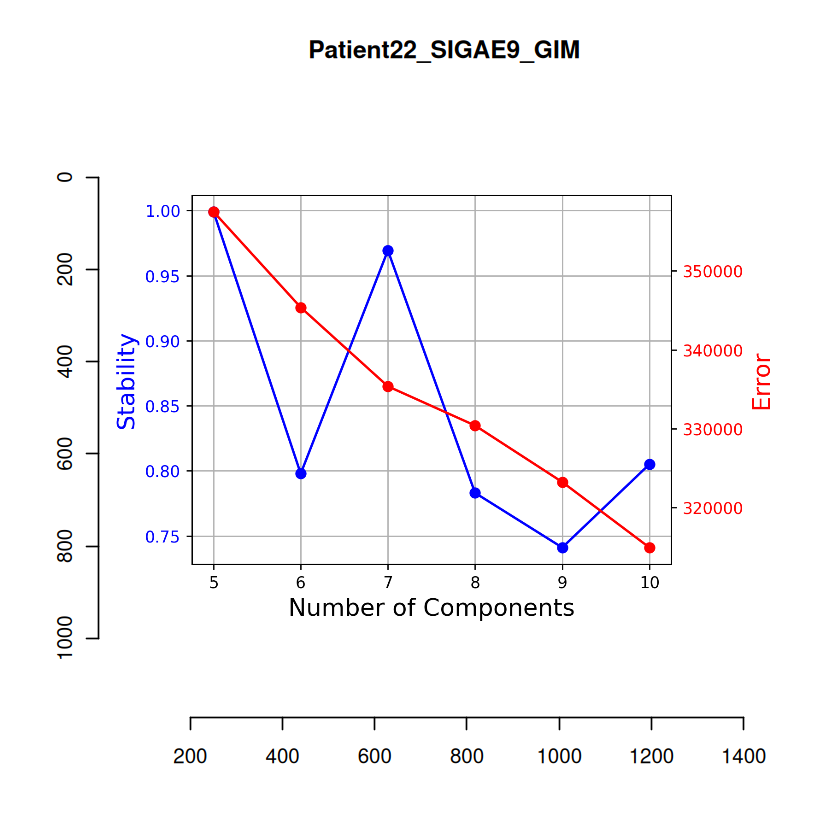

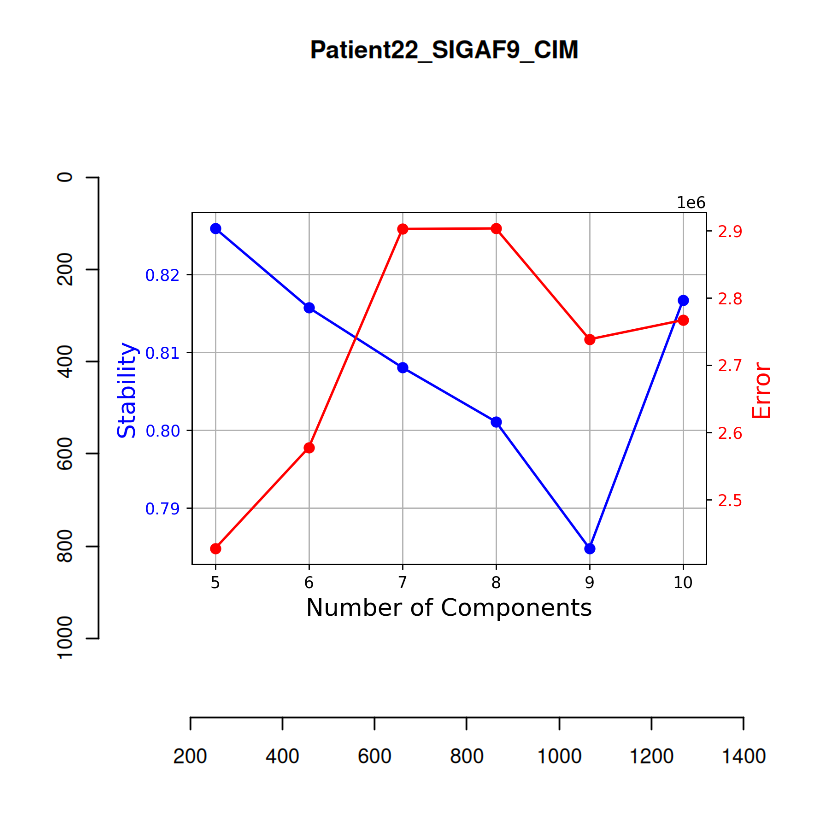

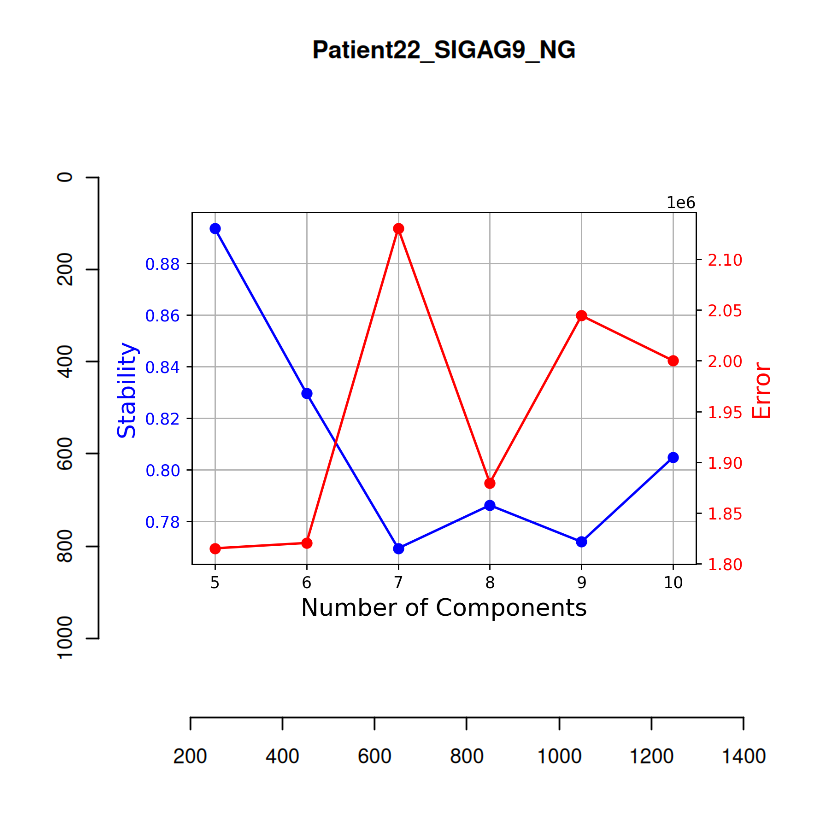

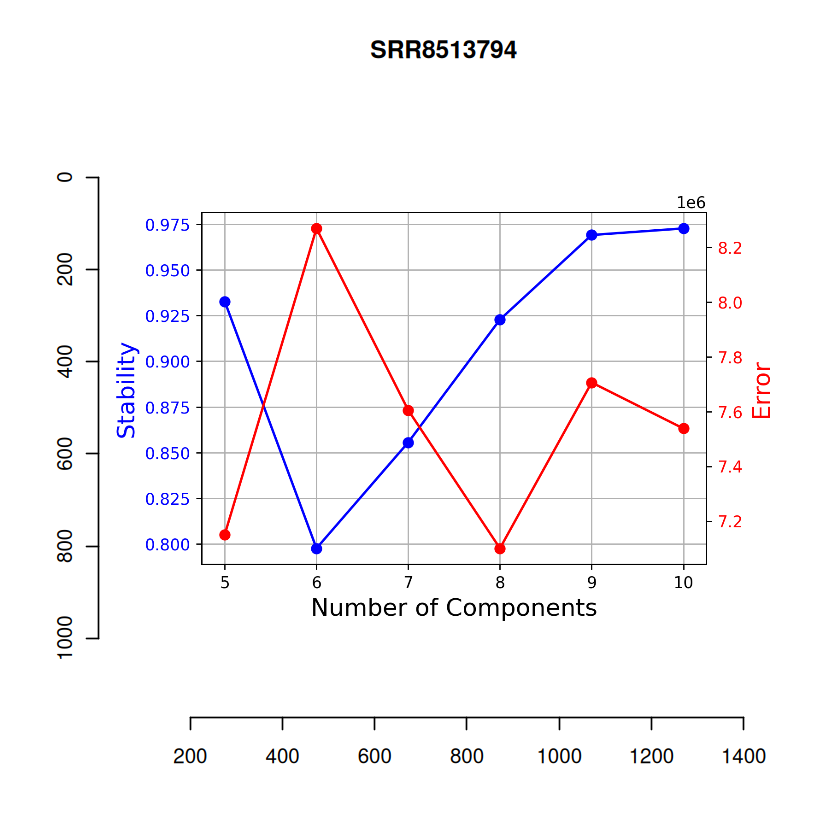

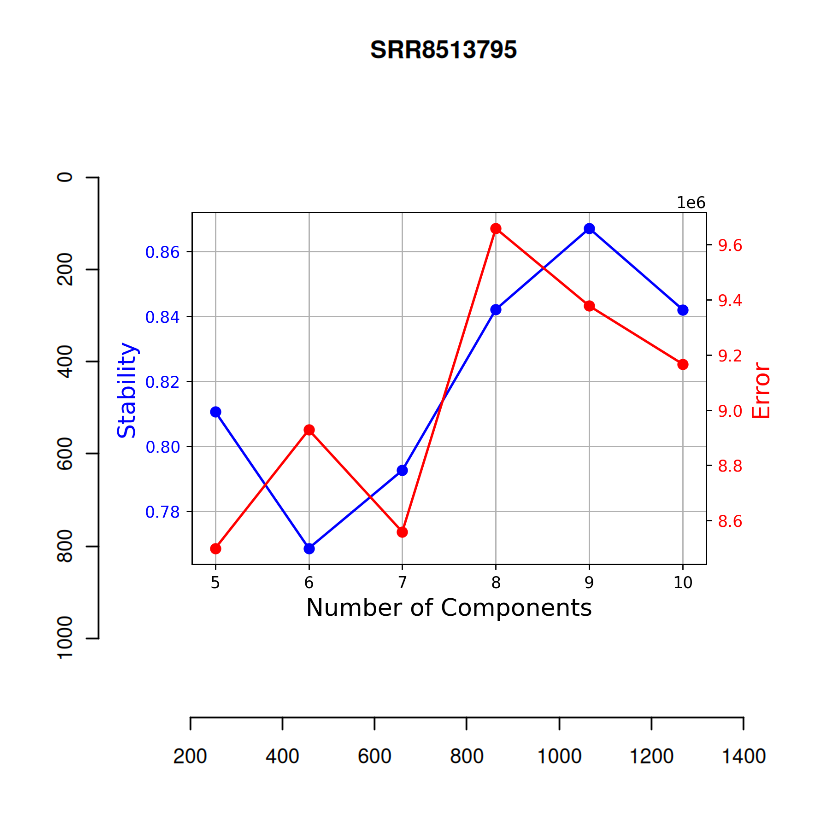

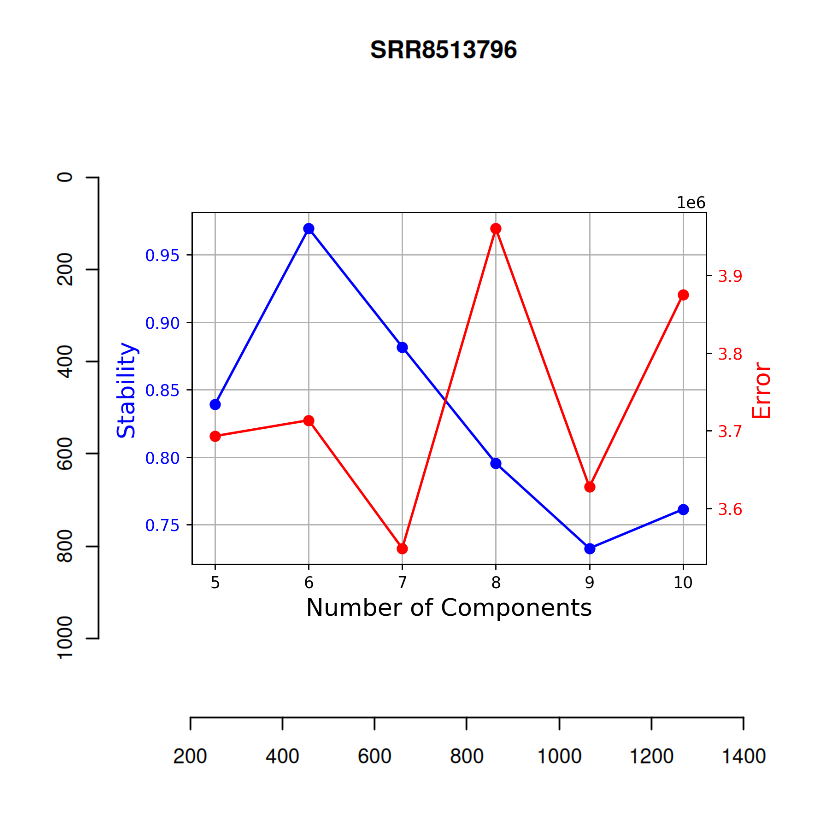

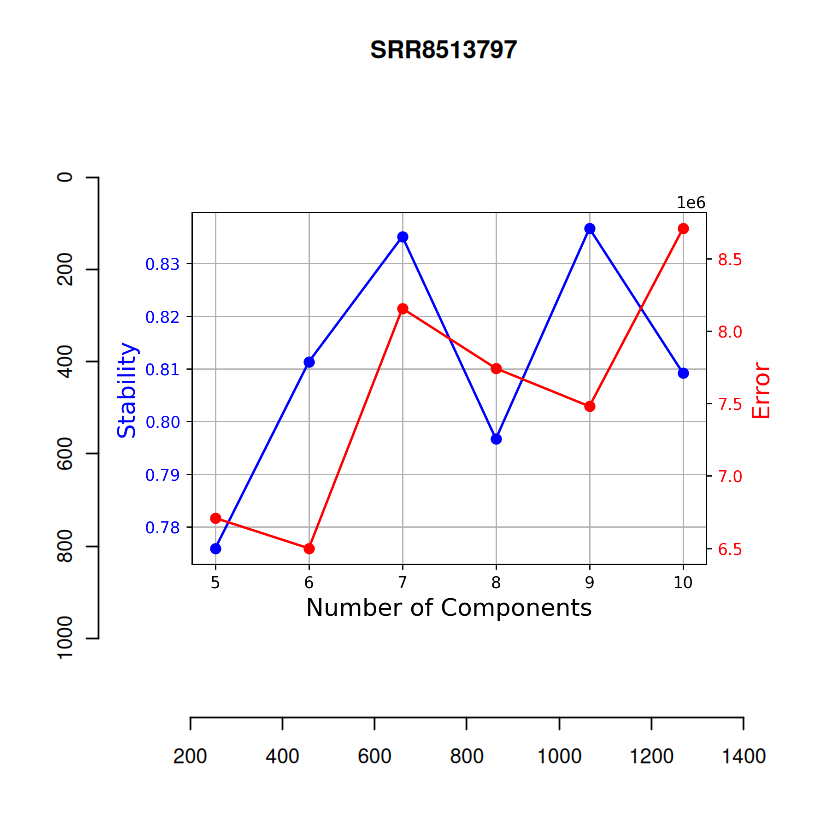

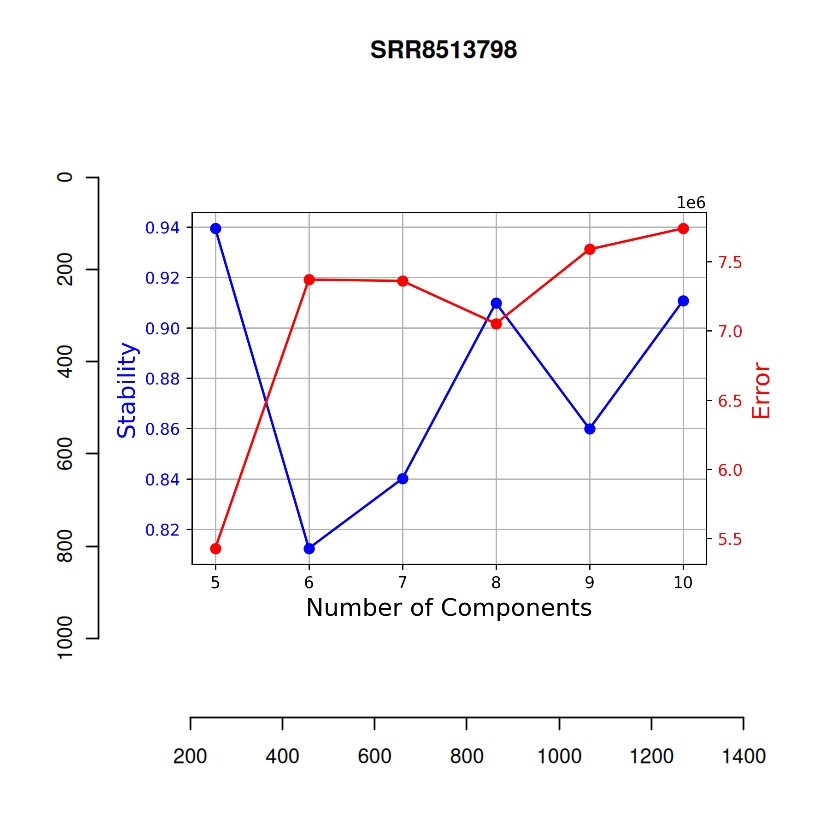

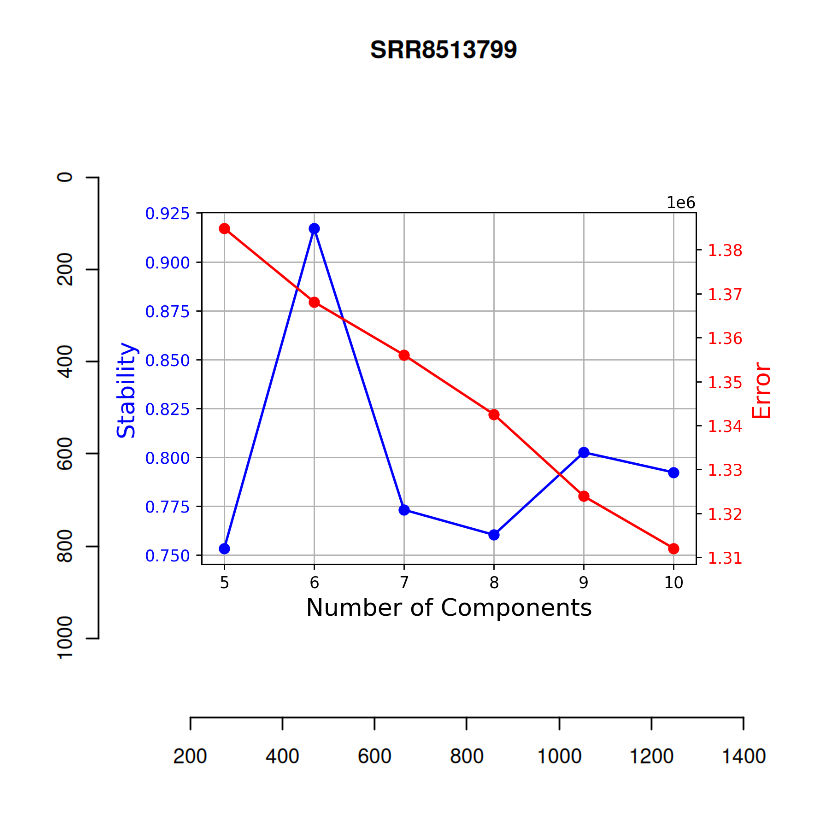

In [13]:
for (runname in runname_list) {
  image_path <- paste0(parent_dir, runname, "/output/", runname, "/", runname, ".k_selection.png")
  if (file.exists(image_path)) {
    im <- load.image(image_path)
    plot(im)
    title(runname)
    Sys.sleep(2)
  } else {
    warning(paste("image dosen't exist:", image_path))
  }
}

In [7]:
class(runname_list)

cat(runname_list ,sep = '\n' )

ERROR: Error: object 'runname_list' not found


In [45]:
cmd = paste("cnmf consensus --output-dir", data_dir,
            "--name", runname,
            '--components', 5,
            '--local-density-threshold', 0.1,
            '--show-clustering', sep=" ")
print(cmd)

system(cmd)

[1] "cnmf consensus --output-dir /mnt/data00/minghui/project_NMF/05_Test_cNMF_Program_0127/GSM3954946/output/ --name GSM3954946 --components 5 --local-density-threshold 0.1 --show-clustering"


In [46]:
usage <- read.table("/mnt/data00/minghui/project_NMF/02_cNMF/output/NGC_cNMF/",row.names=1, header = TRUE, sep = "\t", fill = TRUE)

ERROR: Error: object 'spectra_score_file' not found


In [11]:
numbers <- c(5, 6, 8, 6, 5, 5, 7, 5, 7, 8, 6, 5, 8, 10, 6, 10, 5, 6, 7, 7, 5, 9,
             9, 6, 6, 7, 5, 6, 10, 8, 8, 7, 5, 6, 6, 6, 7, 9, 6, 7, 6, 10, 7, 5,
             5, 6, 6, 6, 6, 10, 7, 6, 8, 7, 7, 5, 5, 6, 9, 6, 9, 5, 6)

In [19]:
all_cmds <- character()

for (runname in runname_list) {
  filtered_dir <- paste0("/mnt/data00/minghui/project_NMF/05_Test_cNMF_Program_0127/", runname, "/output/")
  
  for (number in numbers) {
    cmd <- paste("cnmf consensus --output-dir", filtered_dir,
                 "--name", runname,
                 '--components', number,
                 '--local-density-threshold', 0.1,
                 '--show-clustering', sep=" ")
    
    all_cmds <- c(all_cmds, cmd)
  }
}

# 将所有命令写入一个文本文件
writeLines(all_cmds, "show-clustering_commands.txt")

In [8]:
#  <- read.table(paste0('/mnt/data00/minghui/project_NMF/05_Test_cNMF_Program_0127/',runname_list[1],'/output/',runname_list[1],'/',runname_list[1],'.usages.k_',numbers[1],'.dt_0_1.consensus.txt'),row.names=1, header = TRUE, sep = "\t", fill = TRUE)

usage <- read.table(paste0('/mnt/data00/minghui/project_NMF/05_Test_cNMF_Program_0127/',runname_list[1],'/output/',runname_list[1],'/',runname_list[1],'.usages.k_',numbers[1],'.dt_0_1.consensus.txt'),row.names=1, header = TRUE, sep = "\t", fill = TRUE)

usage_norm <- as.data.frame(t(apply(usage, 1, function(x) x / sum(x))))

X1          X2          X3          X4          
GSM3954946-GGGCATCAGGCAGGTT-1 0.36311850  0.264457292 0.12843124  0.000000000 
GSM3954946-TAGACCACAGCCTTGG-1 0.15172444  0.614060081 0.03529075  0.008056639 
GSM3954946-CAGTAACCACAAGACG-1 1.11524272  0.000000000 0.27318644  0.122072612 
GSM3954946-GTGCATATCATTATCC-1 0.00000000  0.221415297 0.77053970  0.000000000 
GSM3954946-GGACGTCTCACCCGAG-1 0.26236460  0.482942860 0.20084067  0.007938294 
GSM3954946-AGTGAGGTCTGGTGTA-1 0.57461520  0.078891001 0.09981961  0.071958390 
GSM3954946-GGCGTGTTCCAAACAC-1 1.09702860  0.000000000 0.11502379  0.111732678 
GSM3954946-ACGCCGATCAACGGCC-1 0.29264131  0.073584290 0.33669826  0.000000000 
GSM3954946-GGACATTCAAGAAAGG-1 0.62359183  0.248477514 0.04135164  0.056441585 
GSM3954946-TCGTACCAGTAACCCT-1 0.57861345  0.009831945 0.06469989  0.000000000 
GSM3954946-GCAGCCAAGTTCGATC-1 0.91818348  0.000000000 0.36110690  0.116331628 
GSM3954946-CTGTGCTGTCTCTCGT-1 0.00000000  0.000000000 1.03829894  0.000000000 
GSM3954946-CTGAAGTCAATCCGAT-1 0.03717574  0.933552960 0.04744828  0.000000000 
GSM3954946-CACAGGCCAGTCAGCC-1 0.02744278  1.017214631 0.00000000  0.008308247 
GSM3954946-CGTGTAAGTCGGATCC-1 0.13764008  0.741174502 0.03686264  0.000000000 
GSM3954946-CTGCTGTAGAGGTTGC-1 0.59691625  0.184700826 0.02906457  0.000000000 
GSM3954946-ACGATACAGCGATAGC-1 0.31960343  0.228990338 0.21218178  0.000000000 
GSM3954946-TGTCCCAAGGATATAC-1 1.13069166  0.064894497 0.03213704  0.000000000 
GSM3954946-GACGTGCCAGCTGCTG-1 0.00000000  0.150114918 1.39443002  0.029256026 
GSM3954946-AGCTCCTAGGAGTAGA-1 0.44072116  0.279354501 0.07036811  0.001631498 
GSM3954946-GTACTCCCAATTCCTT-1 1.08361926  0.000000000 0.25200884  0.012958683 
GSM3954946-TGGTTCCGTCGGCATC-1 0.75875969  0.014607671 0.09317519  0.000000000 
GSM3954946-CGGTTAATCCTAAGTG-1 0.11045543  0.800907589 0.00000000  0.003836788 
GSM3954946-GTAACGTCACGTAAGG-1 0.10869186  0.768374843 0.00000000  0.000000000 
GSM3954946-ACAGCTACACATCTTT-1 0.00000000  0.000000000 0.00000000  0.827206809 
GSM3954946-GACTGCGTCCATTCTA-1 0.28042553  0.557916658 0.08480390  0.012816508 
GSM3954946-TGTTCCGGTTGGACCC-1 0.09175431  0.796323910 0.05416922  0.000000000 
GSM3954946-CGTGAGCCATTGGTAC-1 0.11097572  0.798122714 0.00000000  0.000000000 
GSM3954946-TTAACTCAGATGCCTT-1 1.07464831  0.000000000 0.00000000  0.058101667 
GSM3954946-AGCTCTCTCACGGTTA-1 0.62357622  0.086340835 0.13831299  0.027396491 
⋮                             ⋮           ⋮           ⋮           ⋮           
GSM3954946-CAAGTTGTCGGTGTCG-1 0.655859397 0.13628982  0.031762236 0.0000000000
GSM3954946-CTCTACGCAGCGAACA-1 0.000000000 0.04832369  0.000000000 1.1320838067
GSM3954946-GACACGCCATTCTTAC-1 0.309915365 0.37855308  0.144419187 0.0000000000
GSM3954946-CCTAAAGGTACCGTTA-1 0.348519349 0.32812612  0.063341658 0.0158704168
GSM3954946-AGTAGTCTCGCGTTTC-1 0.674697688 0.09904419  0.064460293 0.0000000000
GSM3954946-AACTGGTAGCCATCGC-1 0.457846577 0.34766946  0.076617296 0.0000000000
GSM3954946-CCTTTCTCAGCTGCTG-1 0.813564047 0.09273951  0.037252659 0.0149436850
GSM3954946-CCGGTAGAGAGTCGGT-1 0.109726384 0.28396157  0.444158321 0.0022582755
GSM3954946-TACTCATGTCAGAAGC-1 0.518523874 0.22697275  0.076589768 0.0000000000
GSM3954946-CATATGGGTTTGACAC-1 0.368776811 0.34020407  0.212034113 0.0000000000
GSM3954946-GCGGGTTAGACTTTCG-1 0.233958501 0.48658842  0.084263595 0.0076938881
GSM3954946-GAACCTAAGAGGACGG-1 0.100788106 0.63438944  0.196720925 0.0081891901
GSM3954946-CATGCCTCAGCTTAAC-1 0.008081212 0.52035121  0.270594068 0.0000000000
GSM3954946-CCCTCCTCAGCGATCC-1 0.178392202 0.18014980  0.323238124 0.0000000000
GSM3954946-CATGCCTTCGTCGTTC-1 0.228060291 0.33634660  0.352558997 0.0000000000
GSM3954946-CTTAACTAGTGTGGCA-1 0.606324425 0.06501108  0.000000000 0.0000000000
GSM3954946-CGGACTGAGAGTACAT-1 0.577037398 0.27092520  0.040845229 0.0000000000
GSM3954946-CAAGTTGTCGCGTAGC-1 0.788468894 0.12438336  0.006904182 0.0033897123
GSM3954946-CGTCAGGTCGAATCCA-1 1.333476835 0.00000000  0.000000000 0.0163990716
G

In [11]:
usage_norm_list <- list()

for (i in seq_along(runname_list)) {
  runname <- runname_list[i]
  number <- numbers[i]
  
  file_path <- paste0('/mnt/data00/minghui/project_NMF/05_Test_cNMF_Program_0127/',
                      runname, '/output/', runname, '/', runname,
                      '.usages.k_', number, '.dt_0_1.consensus.txt')
  
  usage <- read.table(file_path, row.names = 1, header = TRUE, sep = "\t", fill = TRUE)
  
  usage_norm <- as.data.frame(t(apply(usage, 1, function(x) x / sum(x))))
  
  usage_norm_list[[runname]] <- usage_norm
}

In [12]:
print(names(usage_norm_list))  

 [1] "GSM3954946"            "GSM3954947"            "GSM3954948"           
 [4] "GSM3954949"            "GSM3954950"            "GSM3954951"           
 [7] "GSM3954952"            "GSM3954953"            "GSM3954954"           
[10] "GSM3954955"            "GSM3954956"            "GSM3954957"           
[13] "P5846_normal"          "P5866_normal_rep2"     "P6207_normal"         
[16] "P6342_normal"          "P6592_normal"          "P6649_normal"         
[19] "Patient01_SIGAF2_NSCJ" "Patient01_SIGAG2_NG"   "Patient02_SIGAD9_NSCJ"
[22] "Patient02_SIGAE9_NG"   "Patient03_SIGAB5_BSCJ" "Patient03_SIGAC5_BE"  
[25] "Patient03_SIGAD5_NG"   "Patient07_SIGAB4_BSCJ" "Patient07_SIGAC4_BE"  
[28] "Patient07_SIGAD4_NG"   "Patient07_SIGAE4_ND"   "Patient08_SIGAE7_NSCJ"
[31] "Patient08_SIGAF7_NG"   "Patient08_SIGAG7_ND"   "Patient09_SIGAE9_BSCJ"
[34] "Patient09_SIGAF9_BE"   "Patient09_SIGAG9_NG"   "Patient09_SIGAH9_ND"  
[37] "Patient12_SIGAC3_GM"   "Patient12_SIGAE3_ND"   "Patient13_SIGAE8_NG"  

In [ ]:
spectra_score_file <- paste(data_dir[1:length(data_dir)], runname, paste(runname, "gene_spectra_score", "k_6.dt_0_1", 'txt', sep="."), sep="/")



get_top_colnames <- function(row) {
  # Orders the values in descending order and gets the names of the top 20
  print(row[1:5])
  top_indices <- order(row, decreasing = TRUE)
  return(colnames(spectra_score)[top_indices])
}

top_colnames <- apply(spectra_score, 1, get_top_colnames)



In [19]:

get_top_colnames <- function(row) {
  # Orders the values in descending order and gets the names of the top 20
  print(row[1:5])
  top_indices <- order(row, decreasing = TRUE)
  return(colnames(spectra_score)[top_indices])
}

top_colnames_list <- list()

for (i in seq_along(runname_list)) {
  runname <- runname_list[i]
  number <- numbers[i]
    
    spectra_score_file <- paste0("/mnt/data00/minghui/project_NMF/05_Test_cNMF_Program_0127/",
                               runname, "/output/", runname, "/",
                               runname, ".gene_spectra_score.k_", number, ".dt_0_1.txt")
  
  spectra_score <- read.table(spectra_score_file, row.names = 1, header = TRUE, sep = "\t", fill = TRUE)
  
#    top_colnames <- apply(spectra_score, 1, get_top_colnames)
   top_colnames <-spectra_score

    top_colnames_list[[runname]] <- top_colnames
}

In [21]:
saveRDS(top_colnames_list , './top_colnames_list.rds')

In [148]:
top_colnames_list <- readRDS('./top_colnames_list.rds')

In [155]:
lapply(top_colnames_list,dim)

$GSM3954946
[1]     5 23867

$GSM3954947
[1]     6 23867

$GSM3954948
[1]     8 23867

$GSM3954949
[1]     6 23867

$GSM3954950
[1]     5 23867

$GSM3954951
[1]     5 23867

$GSM3954952
[1]     7 23867

$GSM3954953
[1]     5 23867

$GSM3954954
[1]     7 23867

$GSM3954955
[1]     8 23867

$GSM3954956
[1]     6 23867

$GSM3954957
[1]     5 23867

$P5846_normal
[1]     8 23867

$P5866_normal_rep2
[1]    10 23867

$P6207_normal
[1]     6 23867

$P6342_normal
[1]    10 23867

$P6592_normal
[1]     5 23867

$P6649_normal
[1]     6 23867

$Patient01_SIGAF2_NSCJ
[1]     7 23867

$Patient01_SIGAG2_NG
[1]     7 23867

$Patient02_SIGAD9_NSCJ
[1]     5 23867

$Patient02_SIGAE9_NG
[1]     9 23867

$Patient03_SIGAB5_BSCJ
[1]     9 23867

$Patient03_SIGAC5_BE
[1]     6 23867

$Patient03_SIGAD5_NG
[1]     6 23867

$Patient07_SIGAB4_BSCJ
[1]     7 23867

$Patient07_SIGAC4_BE
[1]     5 23867

$Patient07_SIGAD4_NG
[1]     6 23867

$Patient07_SIGAE4_ND
[1]    10 23867

$Patient08_SIGAE7_NSCJ
[1]     8 23867

$Patient08_SIGAF7_NG
[1]     8 23867

$Patient08_SIGAG7_ND
[1]     7 23867

$Patient09_SIGAE9_BSCJ
[1]     5 23867

$Patient09_SIGAF9_BE
[1]     6 23867

$Patient09_SIGAG9_NG
[1]     6 23867

$Patient09_SIGAH9_ND
[1]     6 23867

$Patient12_SIGAC3_GM
[1]     7 23867

$Patient12_SIGAE3_ND
[1]     9 23867

$Patient13_SIGAE8_NG
[1]     6 23867

$Patient14_SIGAE8_GIM
[1]     7 23867

$Patient14_SIGAF8_NG
[1]     6 23867

$Patient15_SIGAH11_NG
[1]    10 23867

$Patient16_SIGAA1_GIM
[1]     7 23867

$Patient16_SIGAB1_CIM
[1]     5 23867

$Patient16_SIGAC1_NG
[1]     5 23867

$Patient17_SIGAG7_CIM
[1]     6 23867

$Patient17_SIGAH1_GIM
[1]     6 23867

$Patient17_SIGAH7_NG
[1]     6 23867

$Patient18_SIGAA3_GM
[1]     6 23867

$Patient19_SIGAB3_BE
[1]    10 23867

$Patient20_SIGAC3_GM
[1]     7 23867

$Patient21_SIGAA1_GIM
[1]     6 23867

$Patient21_SIGAB1_CIM
[1]     8 23867

$Patient21_SIGAC1_NG
[1]     7 23867

$Patient22_SIGAE9_GIM
[1]     7 23867

$Patient22_SIGAF9_CIM
[1]     5 23867

$Patient22_SIGAG9_NG
[1]     5 23867

$SRR8513794
[1]     6 23867

$SRR8513795
[1]     9 23867

$SRR8513796
[1]     6 23867

$SRR8513797
[1]     9 23867

$SRR8513798
[1]     5 23867

$SRR8513799
[1]     6 23867

In [150]:
df <- top_colnames_list[[1]]

df_cleaned <- df[, colSums(is.na(df)) < nrow(df)]

In [151]:
df_cleaned <- t(df_cleaned) %>% as.data.frame

In [152]:
range(df_cleaned)

[1] -0.003851776  0.013680805

In [153]:
head(df_cleaned)

1             2             3             4             5            
LINC01409  5.822447e-05 -2.863982e-05  2.992042e-05  1.973862e-04  2.609529e-04
FAM41C     9.808618e-05 -2.666417e-05 -1.088279e-04 -3.866753e-05 -5.620646e-05
NOC2L     -5.158299e-04  2.045703e-04  4.603230e-04 -8.709996e-05 -3.672743e-05
KLHL17     1.579816e-04 -8.428917e-05 -8.862776e-06  2.386642e-04  1.461834e-04
PLEKHN1    2.611425e-05  2.564279e-06  1.960332e-04 -1.540670e-04 -1.391542e-04
HES4       9.416046e-05 -1.034031e-04  3.525802e-04 -6.007813e-05 -6.156905e-05

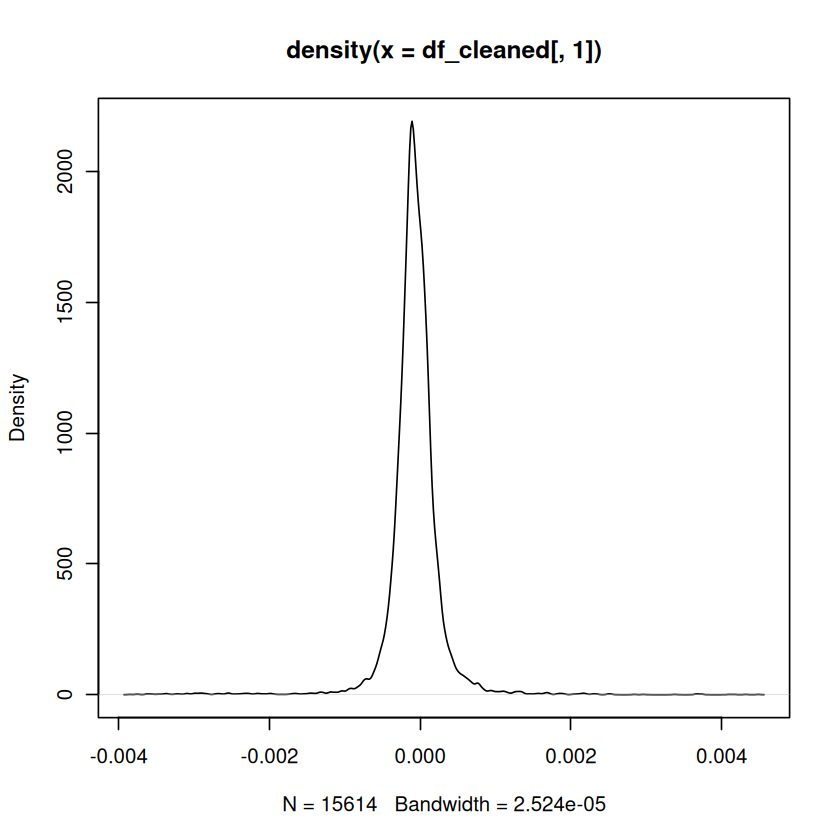

In [14]:
density(df_cleaned[,1]) %>% plot

In [24]:
z_threshold <- 0.002

feature_genes <- apply(df_cleaned, 2, function(x) rownames(df_cleaned)[abs(x) > z_threshold])

In [25]:
lapply(feature_genes, length)

$`1`
[1] 119

$`2`
[1] 92

$`3`
[1] 44

$`4`
[1] 182

$`5`
[1] 124

In [26]:
feature_genes

$`1`
  [1] "RPL22"     "RPL11"     "RPS8"      "RPL5"      "S100A6"    "RPS27"    
  [7] "MUC1"      "TAGLN2"    "LINC01133" "PIGR"      "RPS7"      "RPS27A"   
 [13] "GKN2"      "GKN1"      "RPL31"     "RPL37A"    "PTMA"      "RPL32"    
 [19] "RPL15"     "RPSA"      "RPL14"     "RPL29"     "RPL35A"    "S100P"    
 [25] "PSAPL1"    "RPL9"      "CXCL8"     "CXCL3"     "PLAC8"     "RPL34"    
 [31] "RPS3A"     "RPL37"     "RPS23"     "CYSTM1"    "RPS14"     "RACK1"    
 [37] "MUCL3"     "RPS18"     "RPS10"     "RPL10A"    "PGC"       "EEF1A1"   
 [43] "RPS12"     "SLC25A6"   "TMSB4X"    "RPS4X"     "RPL36A"    "RPL39"    
 [49] "RPL10"     "RPS20"     "RPL7"      "CA2"       "RPL30"     "EIF3E"    
 [55] "PSCA"      "RPL8"      "RPS6"      "GSN"       "RPL35"     "RPL12"    
 [61] "RPL7A"     "RPLP2"     "MUC5AC"    "RPL27A"    "RPS13"     "PLAAT2"   
 [67] "GSTP1"     "RPS3"      "RPS25"     "VSIG2"     "RPS24"     "ADIRF"    
 [73] "KRT8"      "RPS26"     "RPL41"     "MYL6"      "LYZ"       "RPL6"     
 [79] "RPLP0"     "RPL21"     "RNASE1"    "RPS29"     "IFI27"     "PHGR1"    
 [85] "RPL4"      "RPLP1"     "RPS17"     "RPS2"      "SMIM22"    "RPS15A"   
 [91] "RPL13"     "RPL26"     "RPL23A"    "RPL23"     "RPL19"     "RPL17"    
 [97] "SLPI"      "RPS21"     "RPS15"     "RPL36"     "RPS28"     "RPL18A"   
[103] "FXYD3"     "C19orf33"  "LGALS4"    "RPS16"     "FCGBP"     "CEACAM5"  
[109] "RPS19"     "RPL18"     "FTL"       "RPL13A"    "RPS9"      "RPL28"    
[115] "RPS5"      "RPS4Y1"    "RPL3"      "TFF2"      "TFF1"     

$`2`
 [1] "RPL22"   "RPL11"   "RPS8"    "RPL5"    "S100A6"  "RPS27"   "PIGR"   
 [8] "RPS7"    "GKN2"    "GKN1"    "RPL31"   "EEF1B2"  "RPL37A"  "RPL32"  
[15] "RPL15"   "RPSA"    "RPL14"   "RPL29"   "RPL24"   "RPL35A"  "S100P"  
[22] "RPL9"    "CXCL8"   "CXCL3"   "RPL37"   "RPS23"   "RPS14"   "RACK1"  
[29] "RPS18"   "RPS10"   "RPL10A"  "PGC"     "EEF1A1"  "RPS12"   "SLC25A6"
[36] "RPS4X"   "RPL36A"  "RPL10"   "CLU"     "RPS20"   "RPL30"   "EIF3E"  
[43] "PSCA"    "RPL8"    "RPS6"    "RPL35"   "RPL12"   "RPL7A"   "RPLP2"  
[50] "MUC5AC"  "RPL27A"  "RPS13"   "RPS3"    "RPS25"   "RPS24"   "ADIRF"  
[57] "RPS26"   "RPL41"   "LYZ"     "RPL6"    "RPLP0"   "RPL21"   "RPS29"  
[64] "IFI27"   "PHGR1"   "RPL4"    "RPLP1"   "RPS17"   "RPS2"    "RPS15A" 
[71] "RPL13"   "RPL26"   "RPL23A"  "RPL23"   "RPL19"   "RPL27"   "RPL17"  
[78] "RPS21"   "RPS15"   "RPL36"   "RPS28"   "RPL18A"  "RPS16"   "RPS19"  
[85] "RPL18"   "FTL"     "RPL13A"  "RPS9"    "RPL28"   "RPS5"    "RPL3"   
[92] "TFF1"   

$`3`
 [1] "STMN1"        "HMGN2"        "CDC20"        "LOC101926907" "CKS1B"       
 [6] "IQGAP3"       "CENPF"        "EXO1"         "RRM2"         "CENPA"       
[11] "SPC25"        "PTMA"         "SGO1"         "H2AZ1"        "MAD2L1"      
[16] "HMGB2"        "PPP1R2B"      "PTTG1"        "H4C3"         "TUBB"        
[21] "CENPW"        "MELK"         "PHF19"        "TSGA10IP"     "TTC36"       
[26] "ZWINT"        "CDK1"         "CEP55"        "FOXM1"        "GAPDH"       
[31] "TUBA1B"       "HMGB1"        "NUSAP1"       "PCLAF"        "PLK1"        
[36] "CDH8"         "TOP2A"        "TK1"          "BIRC5"        "TYMS"        
[41] "TPX2"         "MYBL2"        "UBE2C"        "GTSE1"       

$`4`
  [1] "SLC45A1"      "CD52"         "DNAJC6"       "AK5"          "BRDT"        
  [6] "EPHX4"        "MYBPHL"       "TSPAN2"       "PDZK1"        "CELF3"       
 [11] "RIIAD1"       "S100A7"       "RGS4"         "NFASC"        "PROX1"       
 [16] "MARK1"        "GNG4"         "ERO1B"        "QPCT"         "SLC8A1"      
 [21] "FBXO41"       "EGR4"         "TBC1D8"       "KIF5C"        "DPP4"        
 [26] "SCN3A"        "NEUROD1"      "CRYGD"        "MARCHF4"      "IGFBP5"      
 [31] "CDK5R2"       "PTPRN"        "SCG2"         "DNER"         "KIF1A"       
 [36] "GNAT1"        "CACNA2D2"     "CD200"        "CASR"         "RBP1"        
 [41] "TM4SF4"       "SUCNR1"       "VWA5B2"       "CPLX1"        "NICOL1"      
 [46]

In [4]:
find_feature_genes <- function(df, z_threshold = 0.001) {
  df_cleaned <- df[, colSums(is.na(df)) < nrow(df)]
  
  df_cleaned <- t(df_cleaned) %>% as.data.frame()
  
  feature_genes <- apply(df_cleaned, 2, function(x) rownames(df_cleaned)[abs(x) > z_threshold])
  
  return(feature_genes)
}

feature_genes_list <- list()  
for (i in seq_along(top_colnames_list)) {
  df <- top_colnames_list[[i]]
  feature_genes_list[[i]] <- find_feature_genes(df, z_threshold = 0.002)
}



In [ ]:
# name_feature_genes <- function(feature_genes_list) {
#   lapply(feature_genes_list, function(genes_sublist) {
#     lapply(genes_sublist, function(genes) {
#       if (!is.na(genes[1])) {
#         names(genes) <- paste0("m_", genes[1])
#       }
#       return(genes)
#     })
#   })
# }


# feature_genes_list_named <- name_feature_genes(feature_genes_list)

# feature_genes_list_named


In [21]:
# names(feature_genes_list[[1]]) <- paste('module_',1:5)

for(i in 1:length(feature_genes_list)){
    
    
    names(feature_genes_list[[i]]) <- paste('module_',1:length(feature_genes_list[[i]]))

    
    
}

names(feature_genes_list) <- names(top_colnames_list)

saveRDS(feature_genes_list,'./feature_genes_list.rds')

In [22]:
lapply(feature_genes_list, length)

$GSM3954946
[1] 5

$GSM3954947
[1] 6

$GSM3954948
[1] 8

$GSM3954949
[1] 6

$GSM3954950
[1] 5

$GSM3954951
[1] 5

$GSM3954952
[1] 7

$GSM3954953
[1] 5

$GSM3954954
[1] 7

$GSM3954955
[1] 8

$GSM3954956
[1] 6

$GSM3954957
[1] 5

$P5846_normal
[1] 8

$P5866_normal_rep2
[1] 10

$P6207_normal
[1] 6

$P6342_normal
[1] 10

$P6592_normal
[1] 5

$P6649_normal
[1] 6

$Patient01_SIGAF2_NSCJ
[1] 7

$Patient01_SIGAG2_NG
[1] 7

$Patient02_SIGAD9_NSCJ
[1] 5

$Patient02_SIGAE9_NG
[1] 9

$Patient03_SIGAB5_BSCJ
[1] 9

$Patient03_SIGAC5_BE
[1] 6

$Patient03_SIGAD5_NG
[1] 6

$Patient07_SIGAB4_BSCJ
[1] 7

$Patient07_SIGAC4_BE
[1] 5

$Patient07_SIGAD4_NG
[1] 6

$Patient07_SIGAE4_ND
[1] 10

$Patient08_SIGAE7_NSCJ
[1] 8

$Patient08_SIGAF7_NG
[1] 8

$Patient08_SIGAG7_ND
[1] 7

$Patient09_SIGAE9_BSCJ
[1] 5

$Patient09_SIGAF9_BE
[1] 6

$Patient09_SIGAG9_NG
[1] 6

$Patient09_SIGAH9_ND
[1] 6

$Patient12_SIGAC3_GM
[1] 7

$Patient12_SIGAE3_ND
[1] 9

$Patient13_SIGAE8_NG
[1] 6

$Patient14_SIGAE8_GIM
[1] 7

$Patient14_SIGAF8_NG
[1] 6

$Patient15_SIGAH11_NG
[1] 10

$Patient16_SIGAA1_GIM
[1] 7

$Patient16_SIGAB1_CIM
[1] 5

$Patient16_SIGAC1_NG
[1] 5

$Patient17_SIGAG7_CIM
[1] 6

$Patient17_SIGAH1_GIM
[1] 6

$Patient17_SIGAH7_NG
[1] 6

$Patient18_SIGAA3_GM
[1] 6

$Patient19_SIGAB3_BE
[1] 10

$Patient20_SIGAC3_GM
[1] 7

$Patient21_SIGAA1_GIM
[1] 6

$Patient21_SIGAB1_CIM
[1] 8

$Patient21_SIGAC1_NG
[1] 7

$Patient22_SIGAE9_GIM
[1] 7

$Patient22_SIGAF9_CIM
[1] 5

$Patient22_SIGAG9_NG
[1] 5

$SRR8513794
[1] 6

$SRR8513795
[1] 9

$SRR8513796
[1] 6

$SRR8513797
[1] 9

$SRR8513798
[1] 5

$SRR8513799
[1] 6

In [23]:
unlist(feature_genes_list)  %>% unlist()%>% unique() %>% length

[1] 15415

In [13]:
all = unlist(feature_genes_list, recursive = FALSE, use.names = FALSE)

names(all) = 1:length(all)

ta = table(unlist(all)) # Count the number of times a gene appears

genes.use = names(ta)[ta > 1]

In [7]:
for (i in 1:5){


all = unlist(feature_genes_list, recursive = FALSE, use.names = TRUE)
  all = lapply(all, intersect, genes.use)

  sim = sapply(all, function(x){
    sapply(all, function(y){
      length(intersect(x,y))/length(union(x,y))
    })
  }) # Adjacency matrix between programs

  keep = rownames(sim)[apply(sim, 1, function(x){
    sum(x > 0.05) >= 5
  })]
  all = all[keep]
  modules.list = lapply(names(feature_genes_list), function(x){
    li = feature_genes_list[[x]]
    li[names(li)[paste(x,names(li),sep='.') %in% keep]]
  })

#   names(feature_genes_list) =  names()
  ta = table(unlist(all))
  genes.use = names(ta)[ta > 1] 
    
     print(length(all))
}

[1] 369
[1] 369
[1] 369
[1] 369
[1] 369


In [197]:
save.image('./RData_Test_NMF.RData')

In [14]:
sub = matrix(0, nrow = length(genes.use), ncol = length(genes.use))
  rownames(sub) = genes.use
  colnames(sub) = genes.use
  for (s in names(feature_genes_list)){
    for (mod in feature_genes_list[[s]]){
      mod = intersect(mod, genes.use)
      for (x in mod){
        for (y in mod){
          sub[x,y] = sub[x,y] + 1
        }
      }
    }
  }
  diag(sub) = 0
adj_keep = sub

In [181]:
saveRDS(sub ,'./sub.rds')

In [37]:
v_min = 5
s_min = 6

adj = adj_keep
adj[] = (adj >= v_min)
for (i in 1:5){
  keep = names(which(rowSums(adj) >= s_min))
  adj = adj[keep,keep]   
  print(dim(adj))
}

[1] 2242 2242
[1] 2239 2239
[1] 2239 2239
[1] 2239 2239
[1] 2239 2239


In [38]:
g = graph_from_adjacency_matrix(adj, diag = FALSE, mode = 'undirected', weighted = TRUE)
modules = communities(cluster_infomap(g, nb.trials = 200))
names(modules) = paste0('m_', sapply(modules, '[', 1))

In [39]:
lapply(modules ,length)

$m_A1CF
[1] 861

$m_A2M
[1] 137

$m_A4GNT
[1] 37

$m_ABCG2
[1] 144

$m_ABI3
[1] 219

$m_ACAA1
[1] 194

$m_ACADM
[1] 120

$m_ACBD3.AS1
[1] 124

$m_AGR2
[1] 59

$m_ALKAL1
[1] 155

$m_ANLN
[1] 162

$m_BEST4
[1] 17

$m_CLDN4
[1] 7

$m_GUCA2A
[1] 3

In [196]:
modules

$m_A1CF
  [1] "A1CF"         "A4GALT"       "ABCA3"        "ABCC8"        "ABHD14A"     
  [6] "ACOT7"        "ACSL1"        "ACSL6"        "ACTL6B"       "ACTN1"       
 [11] "ADA2"         "ADAMTSL2"     "ADCY1"        "ADCY2"        "ADGRV1"      
 [16] "ADH4"         "AGPAT4"       "AK5"          "AKR1B1"       "AKT3"        
 [21] "ALPK3"        "AMBP"         "AMER3"        "AMIGO2"       "ANK2"        
 [26] "ANKRD65"      "ANXA6"        "ANXA7"        "AOX1"         "AP3B2"       
 [31] "APBB1"        "APH1B"        "APLP1"        "APOA1"        "APOL4"       
 [36] "AQP3"         "ARC"          "ARFGEF3"      "ARID3A"       "ARL4D"       
 [41] "ARNT2"        "ARNT2.DT"     "ARX"          "ASCL1"        "ASGR1"       
 [46] "ASGR2"        "ASIC5"        "ASPHD1"       "ATF3"         "ATP6V0E2"    
 [51] "B3GAT1"       "BAALC"        "BACE1"        "BAIAP3"       "BAMBI"       
 [56] "BBLN"         "BCAM"         "BCL2"         "BCL2L10"      "BEND5"       
 [61] "BEX1"         "BEX2"         "BEX3"         "BEX4"         "BEX5"        
 [66] "BGN"          "BHMT"         "BLMH"         "BMERB1"       "BNIP3"       
 [71] "BNIP3L"       "BOC"          "BRSK2"        "BSN"          "BTBD17"      
 [76] "BTG1"         "BTG2"         "C12orf75"     "C14orf132"    "C16orf54"    
 [81] "C1orf127"     "C21orf58"     "C2CD4B"       "C2CD4C"       "C2orf81"     
 [86] "C3orf80"      "C6orf141"     "CACNA1A"      "CACNA1C"      "CACNA1D"     
 [91] "CACNA1H"      "CACNA2D1"     "CACNA2D2"     "CACNB2"       "CACNG4"      
 [96] "CADM1"        "CADM4"        "CADPS"        "CALY"         "CAMK1D"      
[101] "CAMK2B"       "CAMK2N1"      "CAMK2N2"      "CAND2"        "CASR"        
[106] "CAV2"         "CAVIN3"       "CBX6"         "CCDC184"      "CCDC188"     
[111] "CCDC28B"      "CCDC88A"      "CCKBR"        "CCNP"         "CD200"       
[116] "CD44"         "CD81"         "CDC42EP3"     "CDH22"        "CDH6"        
[121] "CDHR3"        "CDK5R2"       "CDKN1C"       "CDKN2A"       "CDO1"        
[126] "CELF3"        "CELF4"        "CELSR3"       "CEP126"       "CEP15"       
[131] "CEP170"       "CERKL"        "CERS4"        "CES1"         "CFAP65"      
[136] "CFAP92"       "CFC1"         "CGA"          "CHGA"         "CHGB"        
[141] "CHRNA5"       "CHRNB2"       "CHST10"       "CHST9"        "CIMIP2B"     
[146] "CIRBP"        "CITED4"       "CLCN4"        "CLDN10"       "CLDN3"       
[151] "CLDN4"        "CLEC4G"       "CLGN"         "CLPS"         "CLPSL2"      
[156] "CLSTN2"       "CLSTN3"       "CLTRN"        "CLU"          "CMTM8"       
[161] "CNIH2"        "CNKSR3"       "CNTNAP2"      "COL18A1"      "COQ10A"      
[166] "CPA1"         "CPE"          "CPLX1"        "CPLX2"        "CRIP2"       
[171] "CRMP1"        "CRTAC1"       "CRYBA2"       "CSRNP3"       "CTF1"        
[176] "CTRB2"        "CTSF"         "CTSL"         "CTXN1"        "CTXND1"      
[181] "CUTA"         "CXXC4"        "CYP27A1"      "DACH1"        "DACH2"       
[186] "DBN1"         "DCX"          "DDAH2"        "DDC"          "DDX5"        
[191] "DEPP1"        "DHRS2"        "DIRAS2"       "DIRAS3"       "DLG4"        
[196] "DLGAP4"       "DMKN"         "DMPK"         "DNAJC12"      "DNAJC6"      
[201] "DNASE1"       "DNER"         "DPEP1"        "DPP4"         "DPP6"        
[206] "DPP7"         "DPYSL2"       "DPYSL3"       "DRAIC"        "DSCAML1"     
[211] "DSEL"         "DSP"          "DTNA"         "DTX3"         "DUSP10"      
[216] "DUSP15"       "DUSP26"       "DYRK3"        "DZIP3"        "ECEL1"       
[221] "ECRG4"        "EFCAB2"       "EFR3B"        "EGFL7"        "EGR1"        
[226] "EGR2"         "EGR3"         "EGR4"         "EID1"         "EID2B"       
[231] "ELAC1"        "ELAPOR1"      "ELAVL4"       "ELL2"         "ELOVL4"      
[236] "ELP4"         "EMC10"        "EML5"         "ENO2"         "ENPP1"       
[241] "ENPP2"        "EPCAM.DT"     "EPOR"         "ERI3"         "ERO1B"       
[246] "ERP27"        "E

In [ ]:
my_lengths <- sapply(modules, length)

modules <- subset(modules, my_lengths > 2)

 a <-lapply(modules, list)
modules <-lapply(a, unlist)

saveRDS(modules ,'./01_modules.rds')

In [40]:
samplename <- readRDS('/mnt/data00/minghui/project_NMF/04_Test_NMF_Program_0120/02_samplename_list.rds')

In [41]:
samplename

$Healthy_stomach
 [1] "P5846_normal"           "P5866_normal_rep1"      "P5866_normal_rep2"     
 [4] "P5931_normal_rep1"      "P5931_normal_rep2"      "P6207_normal"          
 [7] "P6342_normal"           "P6592_normal"           "P6649_normal"          
[10] "P6709_normal"           "Patient01_SIGAF2_NSCJ"  "Patient01_SIGAG2_NG"   
[13] "Patient02_SIGAD9_NSCJ"  "Patient02_SIGAE9_NG"    "Patient03_SIGAD5_NG"   
[16] "Patient05_SIGAG11_NSCJ" "Patient06_Karol-C_NSCJ" "Patient06_Karol-E_NG"  
[19] "Patient07_SIGAD4_NG"    "Patient08_SIGAE7_NSCJ"  "Patient08_SIGAF7_NG"   
[22] "Patient09_SIGAG9_NG"    "Patient10_SIGAB5_NSCJ"  "Patient10_SIGAC5_NG"   
[25] "Patient13_SIGAD8_NSCJ"  "Patient13_SIGAE8_NG"    "Patient14_SIGAF8_NG"   
[28] "Patient15_SIGAG11_NSCJ" "Patient15_SIGAH11_NG"   "Patient16_SIGAC1_NG"   
[31] "Patient17_SIGAH7_NG"    "Patient21_SIGAC1_NG"   

$Healthy_intestine
 [1] "Patient07_SIGAE4_ND" "Patient08_SIGAG7_ND" "Patient09_SIGAH9_ND"
 [4] "Patient12_SIGAE3_ND" "SRR8513794"          "SRR8513795"         
 [7] "SRR8513796"          "SRR8513797"          "SRR8513798"         
[10] "SRR8513799"         

$BE_sample_names
 [1] "Patient03_SIGAB5_BSCJ" "Patient03_SIGAC5_BE"   "Patient07_SIGAB4_BSCJ"
 [4] "Patient07_SIGAC4_BE"   "Patient09_SIGAE9_BSCJ" "Patient09_SIGAF9_BE"  
 [7] "Patient12_SIGAC3_GM"   "Patient18_SIGAA3_GM"   "Patient19_SIGAB3_BE"  
[10] "Patient20_SIGAC3_GM"

In [87]:
names(samplename)

[1] "Healthy_stomach"   "Healthy_intestine" "BE_sample_names"

In [46]:
names(top_colnames_list)

[1] "GSM3954946"            "GSM3954947"            "GSM3954948"           
 [4] "GSM3954949"            "GSM3954950"            "GSM3954951"           
 [7] "GSM3954952"            "GSM3954953"            "GSM3954954"           
[10] "GSM3954955"            "GSM3954956"            "GSM3954957"           
[13] "P5846_normal"          "P5866_normal_rep2"     "P6207_normal"         
[16] "P6342_normal"          "P6592_normal"          "P6649_normal"         
[19] "Patient01_SIGAF2_NSCJ" "Patient01_SIGAG2_NG"   "Patient02_SIGAD9_NSCJ"
[22] "Patient02_SIGAE9_NG"   "Patient03_SIGAB5_BSCJ" "Patient03_SIGAC5_BE"  
[25] "Patient03_SIGAD5_NG"   "Patient07_SIGAB4_BSCJ" "Patient07_SIGAC4_BE"  
[28] "Patient07_SIGAD4_NG"   "Patient07_SIGAE4_ND"   "Patient08_SIGAE7_NSCJ"
[31] "Patient08_SIGAF7_NG"   "Patient08_SIGAG7_ND"   "Patient09_SIGAE9_BSCJ"
[34] "Patient09_SIGAF9_BE"   "Patient09_SIGAG9_NG"   "Patient09_SIGAH9_ND"  
[37] "Patient12_SIGAC3_GM"   "Patient12_SIGAE3_ND"   "Patient13_SIGAE8_NG"  
[40] "Patient14_SIGAE8_GIM"  "Patient14_SIGAF8_NG"   "Patient15_SIGAH11_NG" 
[43] "Patient16_SIGAA1_GIM"  "Patient16_SIGAB1_CIM"  "Patient16_SIGAC1_NG"  
[46] "Patient17_SIGAG7_CIM"  "Patient17_SIGAH1_GIM"  "Patient17_SIGAH7_NG"  
[49] "Patient18_SIGAA3_GM"   "Patient19_SIGAB3_BE"   "Patient20_SIGAC3_GM"  
[52] "Patient21_SIGAA1_GIM"  "Patient21_SIGAB1_CIM"  "Patient21_SIGAC1_NG"  
[55] "Patient22_SIGAE9_GIM"  "Patient22_SIGAF9_CIM"  "Patient22_SIGAG9_NG"  
[58] "SRR8513794"            "SRR8513795"            "SRR8513796"           
[61] "SRR8513797"            "SRR8513798"            "SRR8513799"

In [48]:
names(BE_res_optima_L)

[1] "Patient03_SIGAB5_BSCJ" "Patient03_SIGAC5_BE"   "Patient07_SIGAB4_BSCJ"
 [4] "Patient07_SIGAC4_BE"   "Patient09_SIGAE9_BSCJ" "Patient09_SIGAF9_BE"  
 [7] "Patient12_SIGAC3_GM"   "Patient18_SIGAA3_GM"   "Patient19_SIGAB3_BE"  
[10] "Patient20_SIGAC3_GM"

In [47]:
BE_res_optima_L <- top_colnames_list[samplename$BE_sample_names]


In [62]:
BE_feature_genes_list <- list()  
for (i in seq_along(BE_res_optima_L)) {
  df <- BE_res_optima_L[[i]]
  BE_feature_genes_list[[i]] <- find_feature_genes(df, z_threshold = 0.001)
}


In [63]:
str(BE_feature_genes_list)

List of 10
 $ :List of 9
  ..$ 1: chr [1:151] "CAMK2N1" "CDC42" "RPL11" "TMEM54" ...
  ..$ 2: chr [1:475] "AURKAIP1" "CLSTN1" "AKR7A3" "CAMK2N1" ...
  ..$ 3: chr [1:74] "RPL22" "UQCRH" "RPL5" "S100A6" ...
  ..$ 4: chr [1:366] "ISG15" "C1QTNF12" "RPL22" "ERRFI1" ...
  ..$ 5: chr [1:97] "TAF12.DT" "RPL5" "ELAPOR1" "C1orf162" ...
  ..$ 6: chr [1:289] "ENO1" "CORT" "STMN1" "SH3BGRL3" ...
  ..$ 7: chr [1:125] "TTLL10" "MTFR1L" "SH3BGRL3" "SFN" ...
  ..$ 8: chr [1:307] "RNF207.AS1" "KIF17" "C1QA" "C1QC" ...
  ..$ 9: chr [1:1162] "TAS1R3" "AURKAIP1" "MRPL20" "ATAD3A" ...
 $ :List of 6
  ..$ 1: chr [1:74] "RPL22" "RPL11" "YBX1" "RPS8" ...
  ..$ 2: chr [1:200] "C1QTNF12" "RPL22" "CAMK2N1" "RPL11" ...
  ..$ 3: chr [1:303] "CAPZB" "GALE" "CLIC4" "SYTL1" ...
  ..$ 4: chr [1:253] "ENO1" "CENPS.CORT" "CENPS" "STMN1" ...
  ..$ 5: chr [1:916] "MXRA8" "ANKRD65" "GNB1" "TP73" ...
  ..$ 6: chr [1:1130] "TNFRSF18" "ANKRD65" "GNB1.DT" "SLC45A1" ...
 $ :List of 7
  ..$ 1: chr [1:55] "CDA" "RPL11" "SH3BGRL3"

In [64]:
all = unlist(BE_feature_genes_list, recursive = FALSE, use.names = FALSE)

names(all) = 1:length(all)

ta = table(unlist(all)) # Count the number of times a gene appears

genes.use = names(ta)[ta > 1]

In [65]:
for (i in 1:5){


all = unlist(BE_feature_genes_list, recursive = FALSE, use.names = TRUE)
  all = lapply(all, intersect, genes.use)

  sim = sapply(all, function(x){
    sapply(all, function(y){
      length(intersect(x,y))/length(union(x,y))
    })
  }) # Adjacency matrix between programs

  keep = rownames(sim)[apply(sim, 1, function(x){
    sum(x > 0.05) >= 5
  })]
  all = all[keep]
  modules.list = lapply(names(BE_feature_genes_list), function(x){
    li = BE_feature_genes_list[[x]]
    li[names(li)[paste(x,names(li),sep='.') %in% keep]]
  })

#   names(feature_genes_list) =  names()
  ta = table(unlist(all))
  genes.use = names(ta)[ta > 1] 
    
     print(length(all))
}

[1] 58
[1] 64
[1] 64
[1] 64
[1] 64


In [66]:
sub = matrix(0, nrow = length(genes.use), ncol = length(genes.use))
  rownames(sub) = genes.use
  colnames(sub) = genes.use
  for (s in names(feature_genes_list)){
    for (mod in feature_genes_list[[s]]){
      mod = intersect(mod, genes.use)
      for (x in mod){
        for (y in mod){
          sub[x,y] = sub[x,y] + 1
        }
      }
    }
  }
  diag(sub) = 0
adj_keep = sub

In [82]:
v_min =3
s_min = 2

adj = adj_keep
adj[] = (adj >= v_min)
for (i in 1:5){
  keep = names(which(rowSums(adj) >= s_min))
  adj = adj[keep,keep]   
  print(dim(adj))
}

[1] 1244 1244
[1] 1242 1242
[1] 1242 1242
[1] 1242 1242
[1] 1242 1242


In [86]:
g = graph_from_adjacency_matrix(adj, diag = FALSE, mode = 'undirected', weighted = TRUE)
BE_modules = communities(cluster_infomap(g, nb.trials = 200))
names(BE_modules) = paste0('m_', sapply(modules, '[', 1))

In [84]:
lapply(BE_modules ,length)

$m_A4GNT
[1] 413

$m_ABHD2
[1] 466

$m_ABHD8
[1] 4

$m_AGR3
[1] 13

$m_AKAP3
[1] 134

$m_ALG13
[1] 2

$m_ANLN
[1] 147

$m_AREG
[1] 35

$m_ARF4
[1] 3

$m_ASPH
[1] 17

$m_CDT1
[1] 2

$m_EEIG1
[1] 4

$m_EML2
[1] 2

In [88]:
Healthy_intestine_res_optima_L <- top_colnames_list[samplename$Healthy_intestine]

# Initialize the list to store feature genes for Healthy_intestine
Healthy_intestine_feature_genes_list <- list()  
for (i in seq_along(Healthy_intestine_res_optima_L)) {
  df <- Healthy_intestine_res_optima_L[[i]]
  Healthy_intestine_feature_genes_list[[i]] <- find_feature_genes(df, z_threshold = 0.001)
}

# Combine all feature genes into a single list
all_Healthy_intestine = unlist(Healthy_intestine_feature_genes_list, recursive = FALSE, use.names = FALSE)

# Name the combined list
names(all_Healthy_intestine) = 1:length(all_Healthy_intestine)

# Count the number of times each gene appears
ta_Healthy_intestine = table(unlist(all_Healthy_intestine)) 

# Select genes that appear more than once
genes.use_Healthy_intestine = names(ta_Healthy_intestine)[ta_Healthy_intestine > 1]

# Iterative process to refine the gene list
for (i in 1:5){
  all_Healthy_intestine = unlist(Healthy_intestine_feature_genes_list, recursive = FALSE, use.names = TRUE)
  all_Healthy_intestine = lapply(all_Healthy_intestine, intersect, genes.use_Healthy_intestine)

  sim_Healthy_intestine = sapply(all_Healthy_intestine, function(x){
    sapply(all_Healthy_intestine, function(y){
      length(intersect(x,y))/length(union(x,y))
    })
  }) # Adjacency matrix between programs

  keep_Healthy_intestine = rownames(sim_Healthy_intestine)[apply(sim_Healthy_intestine, 1, function(x){
    sum(x > 0.05) >= 5
  })]
  all_Healthy_intestine = all_Healthy_intestine[keep_Healthy_intestine]
  modules.list_Healthy_intestine = lapply(names(Healthy_intestine_feature_genes_list), function(x){
    li = Healthy_intestine_feature_genes_list[[x]]
    li[names(li)[paste(x,names(li),sep='.') %in% keep_Healthy_intestine]]
  })

  ta_Healthy_intestine = table(unlist(all_Healthy_intestine))
  genes.use_Healthy_intestine = names(ta_Healthy_intestine)[ta_Healthy_intestine > 1] 
    
  print(length(all_Healthy_intestine))
}

# Create a submatrix for gene interactions
sub_Healthy_intestine = matrix(0, nrow = length(genes.use_Healthy_intestine), ncol = length(genes.use_Healthy_intestine))
rownames(sub_Healthy_intestine) = genes.use_Healthy_intestine
colnames(sub_Healthy_intestine) = genes.use_Healthy_intestine
for (s in names(Healthy_intestine_feature_genes_list)){
  for (mod in Healthy_intestine_feature_genes_list[[s]]){
    mod = intersect(mod, genes.use_Healthy_intestine)
    for (x in mod){
      for (y in mod){
        sub_Healthy_intestine[x,y] = sub_Healthy_intestine[x,y] + 1
      }
    }
  }
}
diag(sub_Healthy_intestine) = 0
adj_keep_Healthy_intestine = sub_Healthy_intestine

# Define thresholds for filtering the adjacency matrix
v_min = 3
s_min = 2

# Filter the adjacency matrix based on the thresholds
adj_Healthy_intestine = adj_keep_Healthy_intestine
adj_Healthy_intestine[] = (adj_Healthy_intestine >= v_min)
for (i in 1:5){
  keep_Healthy_intestine = names(which(rowSums(adj_Healthy_intestine) >= s_min))
  adj_Healthy_intestine = adj_Healthy_intestine[keep_Healthy_intestine,keep_Healthy_intestine]   
  print(dim(adj_Healthy_intestine))
}

# Create a graph from the adjacency matrix
g_Healthy_intestine = graph_from_adjacency_matrix(adj_Healthy_intestine, diag = FALSE, mode = 'undirected', weighted = TRUE)

# Detect communities using the Infomap algorithm
Healthy_intestine_modules = communities(cluster_infomap(g_Healthy_intestine, nb.trials = 200))

# Name the modules
names(Healthy_intestine_modules) = paste0('m_', sapply(Healthy_intestine_modules, '[', 1))

[1] 70
[1] 70
[1] 70
[1] 70
[1] 70
[1] 0 0
[1] 0 0
[1] 0 0
[1] 0 0
[1] 0 0


ERROR: Error in names(Healthy_intestine_modules) = paste0("m_", sapply(Healthy_intestine_modules, : 'names' attribute [1] must be the same length as the vector [0]


In [89]:
HI_res_optima_L <- top_colnames_list[samplename$Healthy_intestine]

HI_feature_genes_list <- list()  
for (i in seq_along(HI_res_optima_L)) {
  df <- HI_res_optima_L[[i]]
  HI_feature_genes_list[[i]] <- find_feature_genes(df, z_threshold = 0.001)
}

all = unlist(HI_feature_genes_list, recursive = FALSE, use.names = FALSE)

names(all) = 1:length(all)

ta = table(unlist(all)) # Count the numHIr of times a gene appears

genes.use = names(ta)[ta > 1]

for (i in 1:5){


all = unlist(HI_feature_genes_list, recursive = FALSE, use.names = TRUE)
  all = lapply(all, intersect, genes.use)

  sim = sapply(all, function(x){
    sapply(all, function(y){
      length(intersect(x,y))/length(union(x,y))
    })
  }) # Adjacency matrix HItween programs

  keep = rownames(sim)[apply(sim, 1, function(x){
    sum(x > 0.05) >= 5
  })]
  all = all[keep]
  modules.list = lapply(names(HI_feature_genes_list), function(x){
    li = HI_feature_genes_list[[x]]
    li[names(li)[paste(x,names(li),sep='.') %in% keep]]
  })

#   names(feature_genes_list) =  names()
  ta = table(unlist(all))
  genes.use = names(ta)[ta > 1] 
    
     print(length(all))
}

sub = matrix(0, nrow = length(genes.use), ncol = length(genes.use))
  rownames(sub) = genes.use
  colnames(sub) = genes.use
  for (s in names(feature_genes_list)){
    for (mod in feature_genes_list[[s]]){
      mod = intersect(mod, genes.use)
      for (x in mod){
        for (y in mod){
          sub[x,y] = sub[x,y] + 1
        }
      }
    }
  }
  diag(sub) = 0
adj_keep = sub

v_min =3
s_min = 2

adj = adj_keep
adj[] = (adj >= v_min)
for (i in 1:5){
  keep = names(which(rowSums(adj) >= s_min))
  adj = adj[keep,keep]   
  print(dim(adj))
}

g = graph_from_adjacency_matrix(adj, diag = FALSE, mode = 'undirected', weighted = TRUE)
HI_modules = communities(cluster_infomap(g, nb.trials = 200))
names(HI_modules) = paste0('m_', sapply(modules, '[', 1))


[1] 70
[1] 70
[1] 70
[1] 70
[1] 70
[1] 2173 2173
[1] 2172 2172
[1] 2172 2172
[1] 2172 2172
[1] 2172 2172


In [90]:
HI_modules

$m_A4GNT
  [1] "A1CF"         "ABCC8"        "ABHD14A"      "ABI2"         "ABLIM2"      
  [6] "ACSL1"        "ACTN1"        "ADA2"         "ADAM8"        "ADAP2"       
 [11] "ADAT1"        "ADCY1"        "ADCY2"        "ADGRD1"       "ADGRG4"      
 [16] "ADGRV1"       "ADRB1"        "AGT"          "AIG1"         "AK1"         
 [21] "AK5"          "AKAP12"       "AKR1B1"       "AKR1C4"       "AKT3"        
 [26] "ALPK3"        "AMBP"         "AMER3"        "AMIGO2"       "AMPD3"       
 [31] "ANK2"         "ANKRD44"      "ANKRD65"      "ANXA2"        "ANXA6"       
 [36] "AP3B2"        "APBB1"        "APH1B"        "APLP1"        "APOBEC4"     
 [41] "APOL4"        "AQP3"         "ARFGEF3"      "ARG2"         "ARHGEF6"     
 [46] "ARID3A"       "ARL13B"       "ARL3"         "ARL4D"        "ARL6"        
 [51] "ARMCX1"       "ARMCX2"       "ARNT2"        "ARSG"         "ARSK"        
 [56] "ARX"          "ASAH1"        "ASAP3"        "ASB1"         "ASB9"        
 [61] "ASCL2"        "ASGR1"        "ASIC5"        "ASPDH"        "ASPHD1"      
 [66] "ATF2"         "ATOH8"        "ATP6V0E2"     "ATP6V1G1"     "ATP6V1G2"    
 [71] "ATP9A"        "AXIN2"        "B3GALT2"      "B3GAT1"       "B3GAT3"      
 [76] "B9D1"         "BAALC"        "BABAM2"       "BAIAP3"       "BAMBI"       
 [81] "BAZ2A"        "BCL2L10"      "BCL7A"        "BDNF.AS"      "BEND5"       
 [86] "BEX1"         "BEX2"         "BEX3"         "BEX4"         "BEX5"        
 [91] "BHLHE41"      "BHMT"         "BHMT2"        "BICD1"        "BLMH"        
 [96] "BLOC1S6"      "BMERB1"       "BMP8B"        "BMPR1A"       "BNIP3"       
[101] "BSN"          "BTBD17"       "BTG1"         "BTG3"         "C11orf58"    
[106] "C12orf75"     "C14orf132"    "C16orf54"     "C1orf127"     "C21orf58"    
[111] "C22orf42"     "C2CD4A"       "C2CD4B"       "C3orf80"      "CA8"         
[116] "CACNA1A"      "CACNA1C"      "CACNA1D"      "CACNA2D1"     "CACNB2"      
[121] "CACNB3"       "CADPS"        "CALD1"        "CALY"         "CAMK1D"      
[126] "CAMK2B"       "CAMK2N1"      "CAMLG"        "CAP2"         "CARHSP1"     
[131] "CASD1"        "CASP6"        "CASR"         "CAV2"         "CBFA2T2"     
[136] "CBFA2T3"      "CBLN1"        "CBX6"         "CCDC183"      "CCDC188"     
[141] "CCDC24"       "CCDC88A"      "CCDC91"       "CCNI"         "CD200"       
[146] "CD276"        "CD320"        "CD44"         "CD59"         "CD81"        
[151] "CDC42EP3"     "CDK2AP1"      "CDK5R2"       "CDKN1C"       "CEACAM19"    
[156] "CELF3"        "CELF4"        "CEP126"       "CEP15"        "CEP85L"      
[161] "CERKL"        "CERS4"        "CFAP300"      "CFAP418"      "CFAP57"      
[166] "CFAP92"       "CHGA"         "CHGB"         "CHRNA5"       "CHST9"       
[171] "CIR1"         "CIRBP"        "CLDN4"        "CLGN"         "CLMP"        
[176] "CLSTN3"       "CLTRN"        "CLU"          "CMTM8"        "CNIH2"       
[181] "CNNM1"        "CNOT2"        "CNOT7"        "CNTNAP3B"     "COBLL1"      
[186] "COL18A1"      "COLCA1"       "COQ8A"        "CPE"          "CPLX2"       
[191] "CPNE8"        "CPQ"          "CRIP2"        "CRMP1"        "CRYBA2"      
[196] "CTSF"         "CTXN1"        "CUTA"         "CXCL6"        "CXXC4"       
[201] "CXXC5"        "CYLD"         "DACH1"        "DCUN1D3"      "DDC"         
[206] "DDN.AS1"      "DDX10"        "DDX24"        "DDX5"         "DDX51"       
[211] "DEPP1"        "DGKG"         "DGKH"         "DIMT1"        "DIRAS3"      
[216] "DIS3L"        "DLG4"         "DLL1"         "DMKN"         "DMPK"        
[221] "DMWD"         "DNAJA1"       "DNAJB1"       "DNAJB6"       "DNAJB9"      
[226] "DNAJC12"      "DNAJC18"      "DNAJC6"       "DNER"         "DPEP1"       
[231] "DPP7"         "DPYSL3"       "DPYSL4"       "DRAIC"        "DSP"         
[236] "DUSP10"       "DUSP26"       "DYNC2H1"      "DZIP3"        "E2F5"        
[241] "ECEL1"        "ECRG4"        "EDN3"         "EFCAB2"       "EFCC1"       
[246] "EGFL7"        "

In [91]:
HS_res_optima_L <- top_colnames_list[samplename$Healthy_stomach]

HS_feature_genes_list <- list()  
for (i in seq_along(HS_res_optima_L)) {
  df <- HS_res_optima_L[[i]]
  HS_feature_genes_list[[i]] <- find_feature_genes(df, z_threshold = 0.001)
}

all = unlist(HS_feature_genes_list, recursive = FALSE, use.names = FALSE)

names(all) = 1:length(all)

ta = table(unlist(all)) 

genes.use = names(ta)[ta > 1]

for (i in 1:5){


all = unlist(HS_feature_genes_list, recursive = FALSE, use.names = TRUE)
  all = lapply(all, intersect, genes.use)

  sim = sapply(all, function(x){
    sapply(all, function(y){
      length(intersect(x,y))/length(union(x,y))
    })
  }) 

  keep = rownames(sim)[apply(sim, 1, function(x){
    sum(x > 0.05) >= 5
  })]
  all = all[keep]
  modules.list = lapply(names(HS_feature_genes_list), function(x){
    li = HS_feature_genes_list[[x]]
    li[names(li)[paste(x,names(li),sep='.') %in% keep]]
  })

#   names(feature_genes_list) =  names()
  ta = table(unlist(all))
  genes.use = names(ta)[ta > 1] 
    
     print(length(all))
}

sub = matrix(0, nrow = length(genes.use), ncol = length(genes.use))
  rownames(sub) = genes.use
  colnames(sub) = genes.use
  for (s in names(feature_genes_list)){
    for (mod in feature_genes_list[[s]]){
      mod = intersect(mod, genes.use)
      for (x in mod){
        for (y in mod){
          sub[x,y] = sub[x,y] + 1
        }
      }
    }
  }
  diag(sub) = 0
adj_keep = sub

v_min =3
s_min = 2

adj = adj_keep
adj[] = (adj >= v_min)
for (i in 1:5){
  keep = names(which(rowSums(adj) >= s_min))
  adj = adj[keep,keep]   
  print(dim(adj))
}

g = graph_from_adjacency_matrix(adj, diag = FALSE, mode = 'undirected', weighted = TRUE)
HS_modules = communities(cluster_infomap(g, nb.trials = 200))
names(HS_modules) = paste0('m_', sapply(modules, '[', 1))

ERROR: Error in base::colSums(x, na.rm = na.rm, dims = dims, ...): 'x' must be an array of at least two dimensions


In [94]:
names(HS_res_optima_L)

[1] "P5846_normal"          NA                      "P5866_normal_rep2"    
 [4] NA                      NA                      "P6207_normal"         
 [7] "P6342_normal"          "P6592_normal"          "P6649_normal"         
[10] NA                      "Patient01_SIGAF2_NSCJ" "Patient01_SIGAG2_NG"  
[13] "Patient02_SIGAD9_NSCJ" "Patient02_SIGAE9_NG"   "Patient03_SIGAD5_NG"  
[16] NA                      NA                      NA                     
[19] "Patient07_SIGAD4_NG"   "Patient08_SIGAE7_NSCJ" "Patient08_SIGAF7_NG"  
[22] "Patient09_SIGAG9_NG"   NA                      NA                     
[25] NA                      "Patient13_SIGAE8_NG"   "Patient14_SIGAF8_NG"  
[28] NA                      "Patient15_SIGAH11_NG"  "Patient16_SIGAC1_NG"  
[31] "Patient17_SIGAH7_NG"   "Patient21_SIGAC1_NG"

In [93]:
HS_res_optima_L 

[1] "P5846_normal"           "P5866_normal_rep1"      "P5866_normal_rep2"     
 [4] "P5931_normal_rep1"      "P5931_normal_rep2"      "P6207_normal"          
 [7] "P6342_normal"           "P6592_normal"           "P6649_normal"          
[10] "P6709_normal"           "Patient01_SIGAF2_NSCJ"  "Patient01_SIGAG2_NG"   
[13] "Patient02_SIGAD9_NSCJ"  "Patient02_SIGAE9_NG"    "Patient03_SIGAD5_NG"   
[16] "Patient05_SIGAG11_NSCJ" "Patient06_Karol-C_NSCJ" "Patient06_Karol-E_NG"  
[19] "Patient07_SIGAD4_NG"    "Patient08_SIGAE7_NSCJ"  "Patient08_SIGAF7_NG"   
[22] "Patient09_SIGAG9_NG"    "Patient10_SIGAB5_NSCJ"  "Patient10_SIGAC5_NG"   
[25] "Patient13_SIGAD8_NSCJ"  "Patient13_SIGAE8_NG"    "Patient14_SIGAF8_NG"   
[28] "Patient15_SIGAG11_NSCJ" "Patient15_SIGAH11_NG"   "Patient16_SIGAC1_NG"   
[31] "Patient17_SIGAH7_NG"    "Patient21_SIGAC1_NG"